# Workshop 4 : Model Training and Evaluation

<h1>Sections:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-and-Anomaly-detection" data-toc-modified-id="Clustering-and-Anomaly-detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering and Anomaly detection</a></span><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Anomaly-detection" data-toc-modified-id="Anomaly-detection-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Anomaly detection</a></span><ul class="toc-item"><li><span><a href="#Z-score" data-toc-modified-id="Z-score-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Z-score</a></span></li><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Isolation Forest</a></span></li></ul></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#AutoML" data-toc-modified-id="AutoML-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>AutoML</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cross-Validation</a></span></li></ul></li></ul></div>

<div class="alert alert-block alert-warning">
Before going through model training you need to conduct data preparation, and feature engineering to increase the chances to get good performance.
</div>

In [89]:
import verticapy as vp
from verticapy.learn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Connect with the database
vp.connect("tutorial_connection")

STYLE = 'ggplot'
COLOR = '#66b3ff'
# you can chooss the style
plt.style.use(STYLE)

In [90]:
# read data
sm_meters = vp.vDataFrame("public.sm_meters")
sm_consumption = vp.vDataFrame("public.sm_consumption")
sm_weather = vp.vDataFrame("public.sm_weather")

meterID                dateUTC     value  
1            0    2014-01-01 11:00:00     0.029  
2            0    2014-01-01 13:45:00     0.277  
3            0    2014-01-02 10:45:00     0.321  
4            0    2014-01-02 11:15:00     0.305  
5            0    2014-01-02 13:45:00     0.358  
6            0    2014-01-02 15:30:00     0.115  
7            0    2014-01-03 08:30:00     0.071  
8            0    2014-01-04 23:45:00     0.323  
9            0    2014-01-06 01:15:00     0.085  
10           0    2014-01-06 21:45:00     0.713  
11           0    2014-01-07 00:15:00     0.242  
12           0    2014-01-07 23:00:00      0.09  
13           0    2014-01-09 05:30:00     0.115  
14           0    2014-01-09 15:00:00     0.928  
15           0    2014-01-09 18:15:00      1.09  
16           0    2014-01-10 10:00:00      0.07  
17           0    2014-01-10 14:30:00    10.832  
18           0    2014-01-10 15:30:00     3.288  
19           0    2014-01-10 18:00:00      0.42  
20           0    2014-01-11 10:45:00     1.045  
21           0    2014-01-12 07:45:00     0.091  
22           0    2014-01-13 19:45:00     0.249  
23           0    2014-01-13 20:15:00      0.34  
24           0    2014-01-14 13:00:00     0.099  
25           0    2014-01-14 14:00:00       0.2  
26           0    2014-01-14 14:45:00     0.865  
27           0    2014-01-14 22:00:00     0.716  
28           0    2014-01-15 03:45:00      0.05  
29           0    2014-01-15 11:15:00     0.052  
30           0    2014-01-15 11:30:00     0.038  
31           0    2014-01-15 23:15:00     0.239  
32           0    2014-01-16 19:30:00     1.422  
33           0    2014-01-17 15:00:00     0.291  
34           0    2014-01-18 00:30:00     0.828  
35           0    2014-01-19 03:00:00     0.017  
36           0    2014-01-19 05:30:00     0.024  
37           0    2014-01-19 06:15:00     0.048  
38           0    2014-01-19 15:30:00      13.3  
39           0    2014-01-20 19:30:00      0.59  
40           0    2014-01-21 12:30:00     0.327  
41           0    2014-01-21 13:30:00     0.108  
42           0    2014-01-22 01:30:00     0.083  
43           0    2014-01-22 04:30:00     0.044  
44           0    2014-01-23 21:00:00     0.226  
45           0    2014-01-24 02:00:00     0.125  
46           0    2014-01-24 12:15:00     0.168  
47           0    2014-01-27 22:45:00     0.495  
48           0    2014-01-28 06:15:00     0.056  
49           0    2014-01-28 11:30:00     0.113  
50           0    2014-01-28 19:00:00     1.566  
51           0    2014-01-28 19:45:00     1.108  
52           0    2014-01-29 05:00:00     0.064  
53           0    2014-01-29 07:45:00     0.145  
54           0    2014-01-29 13:00:00     1.719  
55           0    2014-01-30 06:15:00     0.059  
56           0    2014-01-30 17:45:00     0.575  
57           0    2014-01-30 18:45:00     1.129  
58           0    2014-02-01 03:30:00     0.057  
59           0    2014-02-01 03:45:00     0.059  
60           0    2014-02-02 08:45:00     0.186  
61           0    2014-02-04 03:45:00     0.045  
62           0    2014-02-04 12:00:00     0.187  
63           0    2014-02-04 16:00:00     0.313  
64           0    2014-02-04 18:45:00     0.912  
65           0    2014-02-05 06:45:00     0.018  
66           0    2014-02-05 17:15:00     0.112  
67           0    2014-02-06 15:15:00    10.146  
68           0    2014-02-07 11:00:00     0.868  
69           0    2014-02-07 17:30:00     3.812  
70           0    2014-02-07 22:15:00     1.262  
71           0    2014-02-08 03:45:00     0.043  
72           0    2014-02-08 06:45:00     0.106  
73           0    2014-02-09 04:15:00     0.449  
74           0    2014-02-09 08:30:00     0.007  
75           0    2014-02-11 02:30:00     0.087  
76           0    2014-02-11 05:30:00     0.039  
77           0    2014-02-11 19:00:00     0.094  
78           0    2014-02-12 02:30:00     0.102  
79           0    2014-02-13 02:45:00     0.097  
80     
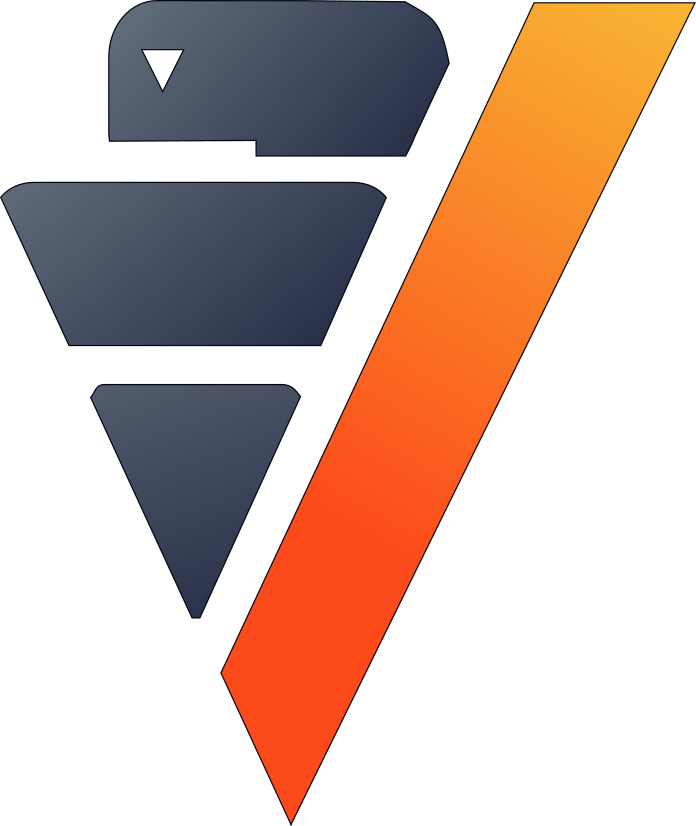

In [91]:
sm_consumption

dateUTC    temperature    humidity  
1      2014-01-01 00:00:00           38.0        95.0  
2      2014-01-01 00:30:00           37.4        93.0  
3      2014-01-01 01:00:00           37.4       100.0  
4      2014-01-01 01:30:00           37.4       100.0  
5      2014-01-01 02:00:00           39.2        93.0  
6      2014-01-01 02:30:00           39.2        93.0  
7      2014-01-01 03:00:00           39.2        93.0  
8      2014-01-01 03:30:00           39.2        93.0  
9      2014-01-01 04:00:00           39.2        93.0  
10     2014-01-01 04:30:00           39.2        93.0  
11     2014-01-01 05:00:00           39.2        93.0  
12     2014-01-01 05:30:00           39.2        87.0  
13     2014-01-01 06:00:00           38.0        89.0  
14     2014-01-01 06:30:00           37.4        93.0  
15     2014-01-01 07:00:00           37.4        93.0  
16     2014-01-01 07:30:00           37.4        93.0  
17     2014-01-01 08:00:00           37.4        93.0  
18     2014-01-01 08:30:00           37.4        87.0  
19     2014-01-01 09:00:00           37.4        87.0  
20     2014-01-01 09:30:00           37.4        87.0  
21     2014-01-01 10:00:00           37.4        93.0  
22     2014-01-01 10:30:00           37.4        93.0  
23     2014-01-01 11:00:00           37.4        87.0  
24     2014-01-01 11:30:00           37.4        93.0  
25     2014-01-01 12:00:00           38.0        85.0  
26     2014-01-01 12:30:00           39.2        87.0  
27     2014-01-01 13:00:00           39.2        87.0  
28     2014-01-01 13:30:00           39.2        87.0  
29     2014-01-01 14:00:00           39.2        87.0  
30     2014-01-01 14:30:00           39.2        87.0  
31     2014-01-01 15:00:00           39.2        87.0  
32     2014-01-01 15:30:00           39.2        87.0  
33     2014-01-01 16:00:00           37.4        93.0  
34     2014-01-01 16:30:00           39.2        87.0  
35     2014-01-01 17:00:00           39.2        87.0  
36     2014-01-01 17:30:00           37.4        87.0  
37     2014-01-01 18:00:00           38.0        81.0  
38     2014-01-01 18:30:00           37.4        87.0  
39     2014-01-01 19:00:00           35.6        87.0  
40     2014-01-01 19:30:00           37.4        93.0  
41     2014-01-01 20:00:00           39.2        87.0  
42     2014-01-01 20:30:00           39.2        87.0  
43     2014-01-01 21:00:00           39.2        87.0  
44     2014-01-01 21:30:00           41.0        81.0  
45     2014-01-01 22:00:00           39.2        87.0  
46     2014-01-01 22:30:00           39.2        87.0  
47     2014-01-01 23:00:00           39.2        87.0  
48     2014-01-01 23:30:00           39.2        81.0  
49     2014-01-02 00:00:00           38.0        76.0  
50     2014-01-02 00:30:00           37.4        81.0  
51     2014-01-02 01:00:00           37.4        81.0  
52     2014-01-02 01:30:00           37.4        81.0  
53     2014-01-02 02:00:00           37.4        81.0  
54     2014-01-02 02:30:00           37.4        81.0  
55     2014-01-02 03:00:00           37.4        81.0  
56     2014-01-02 03:30:00           37.4        81.0  
57     2014-01-02 04:00:00           37.4        81.0  
58     2014-01-02 04:30:00           35.6        87.0  
59     2014-01-02 05:00:00           35.6        93.0  
60     2014-01-02 05:30:00           37.4        81.0  
61     2014-01-02 06:00:00           37.0        75.0  
62     2014-01-02 06:30:00           37.4        81.0  
63     2014-01-02 07:00:00           37.4        87.0  
64     2014-01-02 07:30:00           37.4        81.0  
65     2014-01-02 08:00:00           35.6        81.0  
66     2014-01-02 08:30:00           35.6        81.0  
67     2014-01-02 09:00:00           37.4        75.0  
68     2014-01-02 09:30:00           37.4        81.0  
69     2014-01-02 10:00:00           39.2        75.0  
70     2014-01-02 10:30:00           41.0        70.0  
71     2014-01-02 11:00:00           39.2  
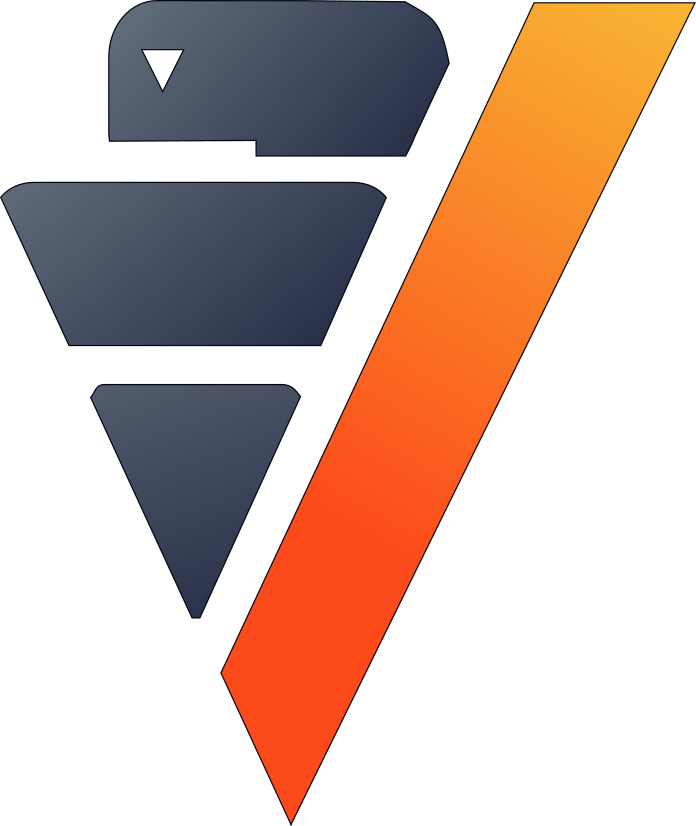

In [92]:
sm_weather

We know that weather has great impact on energy consumption, then we will join both dataset to enrich our data.

dateUTC    meterID    value    humidity   \\
1      2014-01-01 00:00:00        913    0.097        95.0   \\
2      2014-01-01 00:00:00        895    0.184        95.0   \\
3      2014-01-01 00:00:00        795    0.093        95.0   \\
4      2014-01-01 00:00:00        780    0.116        95.0   \\
5      2014-01-01 00:00:00        747    0.559        95.0   \\
6      2014-01-01 00:00:00        660    0.836        95.0   \\
7      2014-01-01 00:00:00        640    1.796        95.0   \\
8      2014-01-01 00:00:00        605    0.038        95.0   \\
9      2014-01-01 00:00:00        484    0.211        95.0   \\
10     2014-01-01 00:00:00        474    0.313        95.0   \\
11     2014-01-01 00:00:00        457    0.022        95.0   \\
12     2014-01-01 00:00:00        371    0.815        95.0   \\
13     2014-01-01 00:00:00        355    0.448        95.0   \\
14     2014-01-01 00:00:00        348    0.071        95.0   \\
15     2014-01-01 00:00:00        307    1.423        95.0   \\
16     2014-01-01 00:00:00        188    0.152        95.0   \\
17     2014-01-01 00:00:00        181    0.138        95.0   \\
18     2014-01-01 00:00:00        179    0.033        95.0   \\
19     2014-01-01 00:00:00        129    0.054        95.0   \\
20     2014-01-01 00:00:00        116    0.232        95.0   \\
21     2014-01-01 00:15:00        986    0.301        95.0   \\
22     2014-01-01 00:15:00        848    0.186        95.0   \\
23     2014-01-01 00:15:00        829    0.145        95.0   \\
24     2014-01-01 00:15:00        718    0.091        95.0   \\
25     2014-01-01 00:15:00        637    0.319        95.0   \\
26     2014-01-01 00:15:00        625    0.141        95.0   \\
27     2014-01-01 00:15:00        619    0.103        95.0   \\
28     2014-01-01 00:15:00        583    4.081        95.0   \\
29     2014-01-01 00:15:00        444    0.131        95.0   \\
30     2014-01-01 00:15:00        221    0.399        95.0   \\
31     2014-01-01 00:15:00         67    0.157        95.0   \\
32     2014-01-01 00:15:00         52    0.157        95.0   \\
33     2014-01-01 00:30:00        933    0.061        93.0   \\
34     2014-01-01 00:30:00        930    0.202        93.0   \\
35     2014-01-01 00:30:00        904    0.159        93.0   \\
36     2014-01-01 00:30:00        829    0.082        93.0   \\
37     2014-01-01 00:30:00        796    0.237        93.0   \\
38     2014-01-01 00:30:00        663     0.08        93.0   \\
39     2014-01-01 00:30:00        628    1.246        93.0   \\
40     2014-01-01 00:30:00        626    0.106        93.0   \\
41     2014-01-01 00:30:00        618    0.067        93.0   \\
42     2014-01-01 00:30:00        506    0.108        93.0   \\
43     2014-01-01 00:30:00        497    0.144        93.0   \\
44     2014-01-01 00:30:00        460    0.094        93.0   \\
45     2014-01-01 00:30:00        376    0.129        93.0   \\
46     2014-01-01 00:30:00        332    0.044        93.0   \\
47     2014-01-01 00:30:00        308    0.045        93.0   \\
48     2014-01-01 00:30:00        286    0.209        93.0   \\
49     2014-01-01 00:30:00        277    0.287        93.0   \\
50     2014-01-01 00:30:00        264    0.162        93.0   \\
51     2014-01-01 00:30:00        138    2.276        93.0   \\
52     2014-01-01 00:30:00         90    0.183        93.0   \\
53     2014-01-01 00:45:00        977    0.176        93.0   \\
54     2014-01-01 00:45:00        937    0.201        93.0   \\
55     2014-01-01 00:45:00        927    0.551        93.0   \\
56     2014-01-01 00:45:00        867    0.844        93.0   \\
57     2014-01-01 00:45:00        762     0.13        93.0   \\
58     2014-01-01 00:45:00        528    0.067        93.0   \\
59     2014-01-01 00:45:00        447    0.599        93.0   \\
60     2014-01-01 00:45:00        375    0.519        93.0   \\
61     2014-01-01 00:45:00        297    0.609        93.0   \\
62     2014-01-01 00:45:00        250    0.428     
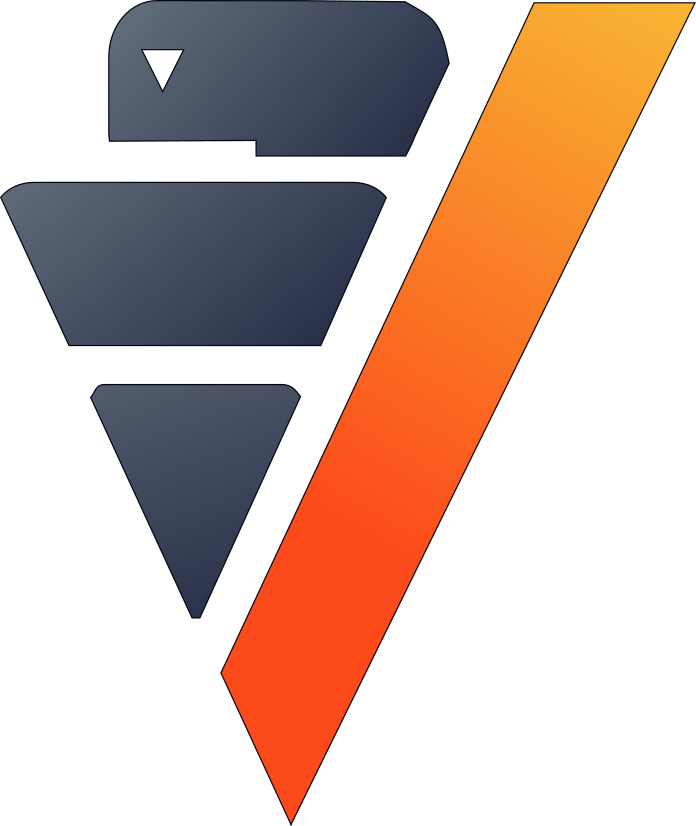

In [93]:
# join consumption and weather data
sm_consumption_weather = sm_consumption.join(
                            sm_weather,
                            how = "left",
                            on = [("dateUTC", "dateUTC", "linterpolate")],
                            expr1 = ["dateUTC", "meterID", "value"],
                            expr2 = ["humidity", "temperature"])
sm_consumption_weather

count                 mean                  std                  min   \\
"meterID"             1000                499.5     288.819436095749                  0.0   \\
"residenceType"       1000                1.678    0.908372798547568                  1.0   \\
"latitude"            1000     53.1031307683147    0.540247926305433     51.7964600770212   \\
"longitude"           1000    -6.80208525247443    0.958410310581873    -9.16352332036362   \\
                            approx_25%           approx_50%           approx_75%   \\
"meterID"                       249.75                499.5               749.25   \\
"residenceType"                    1.0                  1.0                  3.0   \\
"latitude"            53.2248700551417     53.3324703557102     53.3775647380457   \\
"longitude"          -7.06030795828508    -6.28903807447417    -6.23918776220651   \\
                                   max  
"meterID"                        999.0  
"residenceType"                    3.0  
"latitude"            54.0270361317983  
"longitude"          -6.07134572494937  
Rows: 1-4 | Columns: 9
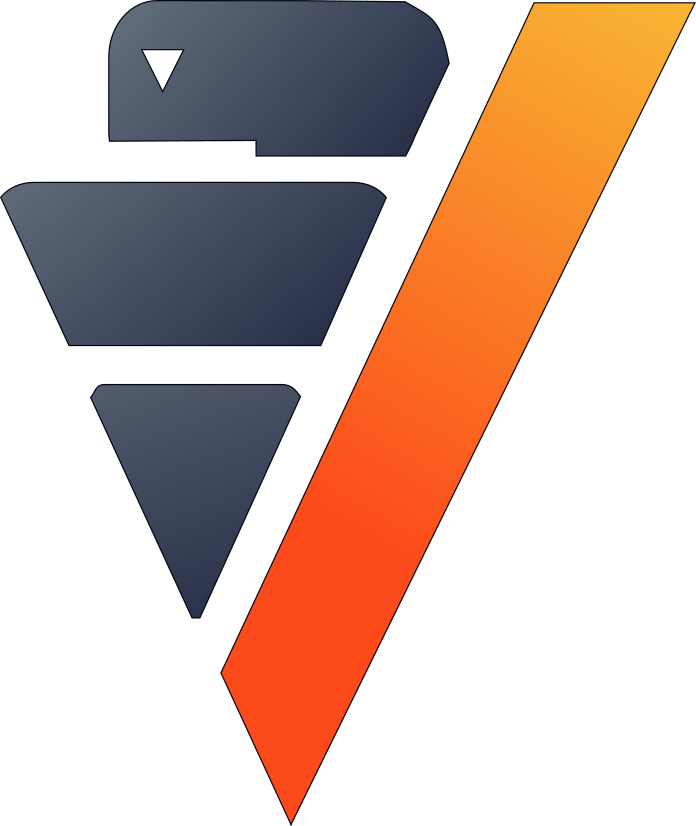

In [94]:
sm_meters.describe()

## Clustering and Anomaly detection
### Clustering
We will use clusters to create regions based  latitude and longitude. We will use Kmean algorithm for this purpose To chose the number of cluster we will use elbow method.

  0%|          | 0/5 [00:00<?, ?it/s]

Within-Cluster SS  
3          0.8673636464604054  
4          0.9652003539176934  
5          0.9842289294055934  
6           0.993627480208735  
7          0.9948147038759346  
Rows: 1-5 | Columns: 2
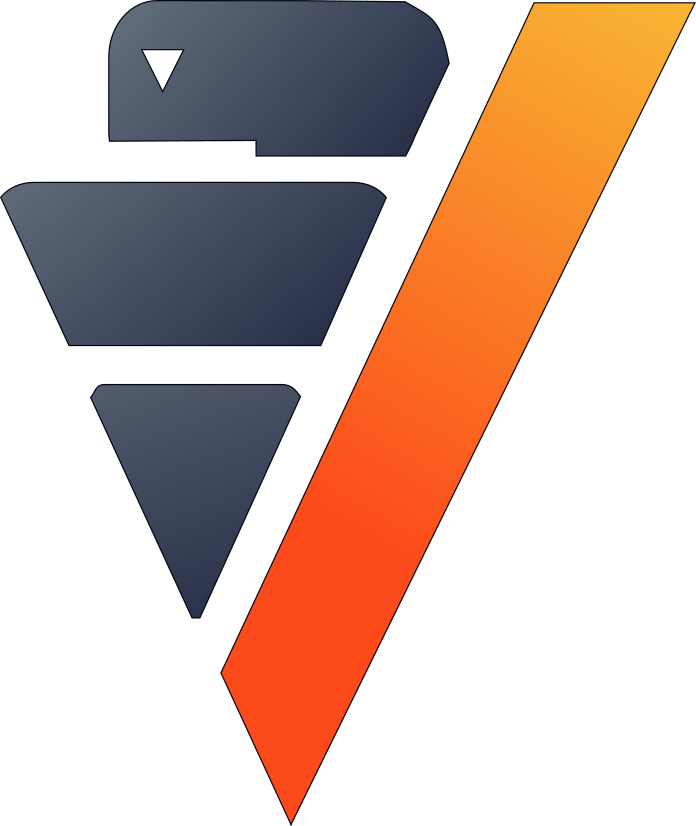

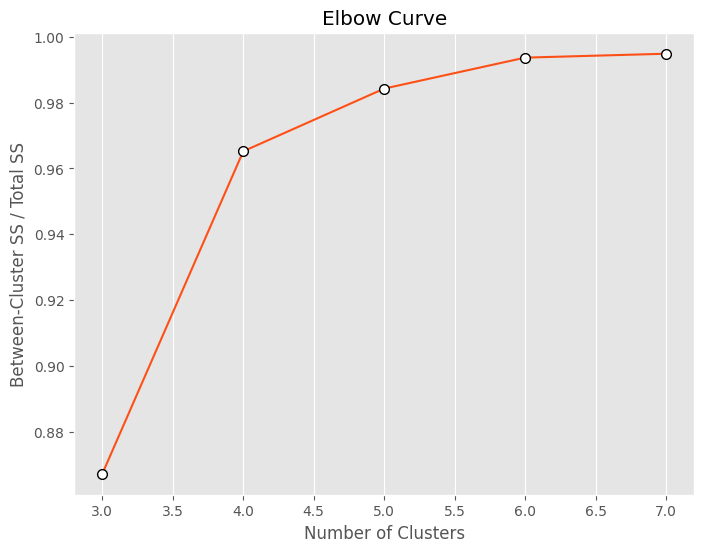

In [147]:
from verticapy.learn.model_selection import elbow

elbow(sm_meters, ["longitude", "latitude"], n_cluster = (3, 8))

In [96]:
from verticapy.learn.cluster import KMeans
model = KMeans("kmeans_sm_regions", 
               n_cluster = 5,
               init = [(-6.26980, 53.38127),
                       (-9.06178, 53.25998),
                       (-8.48641, 51.90216),
                       (-7.12408, 52.24610),
                       (-8.63985, 52.65945),]
              )
model.drop()
model.fit(sm_meters, 
          ["longitude", "latitude"])



centers
longitude|latitude
---------+--------
-9.06178 |53.25998
-8.63985 |52.65945
-8.48641 |51.90216
-7.12408 |52.24610
-6.26980 |53.38127


metrics
Evaluation metrics:
     Total Sum of Squares: 1209.2077
     Within-Cluster Sum of Squares: 
         Cluster 0: 0.099754154
         Cluster 1: 0.2779225
         Cluster 2: 0.53464463
         Cluster 3: 0.2657853
         Cluster 4: 17.892423
     Total Within-Cluster Sum of Squares: 19.07053
     Between-Cluster Sum of Squares: 1190.1372
     Between-Cluster SS / Total SS: 98.42%
 Number of iterations performed: 1
 Converged: True
 Call:
kmeans('public.kmeans_sm_regions', '"public"."_verticapy_tmp_view_dbadmin_38231_3511060765_"', '"longitude", "latitude"', 5
USING PARAMETERS max_iterations=300, epsilon=0.0001, initial_centers_table='"public"."_verticapy_tmp_kmeans_init_dbadmin_38231_4756995338_"', distance_method='euclidean')

In [97]:
sm_meters = model.predict(sm_meters, name = "region")

<AxesSubplot:xlabel='"longitude"', ylabel='"latitude"'>

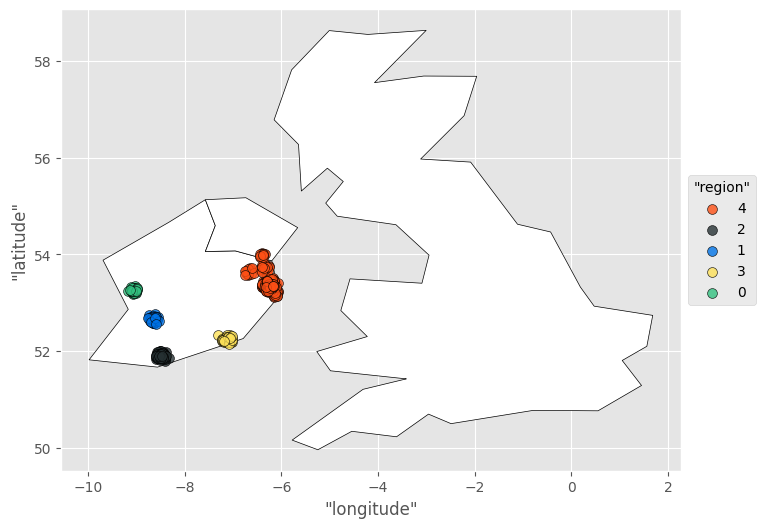

In [98]:
from verticapy.datasets import load_world

world = load_world()
df = world.to_geopandas(geometry = "geometry")
df = df[df["country"].isin(["Ireland", "United Kingdom"])]
ax = df.plot(edgecolor = "black",
             color = "white",
             figsize = (10, 9))
sm_meters.scatter(["longitude", "latitude"], 
                  catcol = "region",
                  max_cardinality = 10,
                  ax = ax)

dateUTC    meterID    value    humidity   \\
1      2014-01-01 06:00:00        186    0.047        89.0   \\
2      2014-01-01 06:00:00        148    0.052        89.0   \\
3      2014-01-01 06:00:00        104    0.084        89.0   \\
4      2014-01-01 06:00:00         77    0.034        89.0   \\
5      2014-01-01 06:00:00         26    0.062        89.0   \\
6      2014-01-01 06:00:00          5    0.072        89.0   \\
7      2014-01-01 06:15:00        950    0.017        89.0   \\
8      2014-01-01 06:15:00        890     0.01        89.0   \\
9      2014-01-01 06:15:00        860    0.635        89.0   \\
10     2014-01-01 06:15:00        811    0.113        89.0   \\
11     2014-01-01 06:15:00        798    0.016        89.0   \\
12     2014-01-01 06:15:00        793    0.076        89.0   \\
13     2014-01-01 06:15:00        758    0.079        89.0   \\
14     2014-01-01 06:15:00        716     0.08        89.0   \\
15     2014-01-01 06:15:00        696     0.06        89.0   \\
16     2014-01-01 06:15:00        663    0.136        89.0   \\
17     2014-01-01 06:15:00        567    0.077        89.0   \\
18     2014-01-01 06:15:00        564    0.086        89.0   \\
19     2014-01-01 06:15:00        525    0.055        89.0   \\
20     2014-01-01 06:15:00        483    2.712        89.0   \\
21     2014-01-01 06:15:00        397    0.116        89.0   \\
22     2014-01-01 06:15:00        381    0.031        89.0   \\
23     2014-01-01 06:15:00        367    0.117        89.0   \\
24     2014-01-01 06:15:00        355    0.107        89.0   \\
25     2014-01-01 06:15:00        168    0.086        89.0   \\
26     2014-01-01 06:15:00        102    0.069        89.0   \\
27     2014-01-01 06:15:00         81    0.203        89.0   \\
28     2014-01-01 06:15:00         46    0.064        89.0   \\
29     2014-01-01 06:30:00        960    0.126        93.0   \\
30     2014-01-01 06:30:00        951    0.064        93.0   \\
31     2014-01-01 06:30:00        888     0.06        93.0   \\
32     2014-01-01 06:30:00        755    0.035        93.0   \\
33     2014-01-01 06:30:00        578    0.054        93.0   \\
34     2014-01-01 06:30:00        545    0.082        93.0   \\
35     2014-01-01 06:30:00        482    0.061        93.0   \\
36     2014-01-01 06:30:00        475    0.058        93.0   \\
37     2014-01-01 06:30:00        461    0.109        93.0   \\
38     2014-01-01 06:30:00        400    0.154        93.0   \\
39     2014-01-01 06:30:00        254    0.037        93.0   \\
40     2014-01-01 06:30:00         90    0.197        93.0   \\
41     2014-01-01 06:30:00         63    0.099        93.0   \\
42     2014-01-01 06:30:00         52    0.082        93.0   \\
43     2014-01-01 06:45:00        972    0.164        93.0   \\
44     2014-01-01 06:45:00        932    0.059        93.0   \\
45     2014-01-01 06:45:00        914     0.04        93.0   \\
46     2014-01-01 06:45:00        852    0.063        93.0   \\
47     2014-01-01 06:45:00        793    0.145        93.0   \\
48     2014-01-01 06:45:00        772    0.079        93.0   \\
49     2014-01-01 06:45:00        757    0.057        93.0   \\
50     2014-01-01 06:45:00        751    1.487        93.0   \\
51     2014-01-01 06:45:00        741    0.438        93.0   \\
52     2014-01-01 06:45:00        708    0.092        93.0   \\
53     2014-01-01 06:45:00        676    0.087        93.0   \\
54     2014-01-01 06:45:00        674    0.051        93.0   \\
55     2014-01-01 06:45:00        653    0.151        93.0   \\
56     2014-01-01 06:45:00        639    1.142        93.0   \\
57     2014-01-01 06:45:00        538    0.071        93.0   \\
58     2014-01-01 06:45:00        499    0.013        93.0   \\
59     2014-01-01 06:45:00        465    0.032        93.0   \\
60     2014-01-01 06:45:00        302    0.071        93.0   \\
61     2014-01-01 06:45:00        295    0.037        93.0   \\
62     2014-01-01 06:45:00        290    0.039     
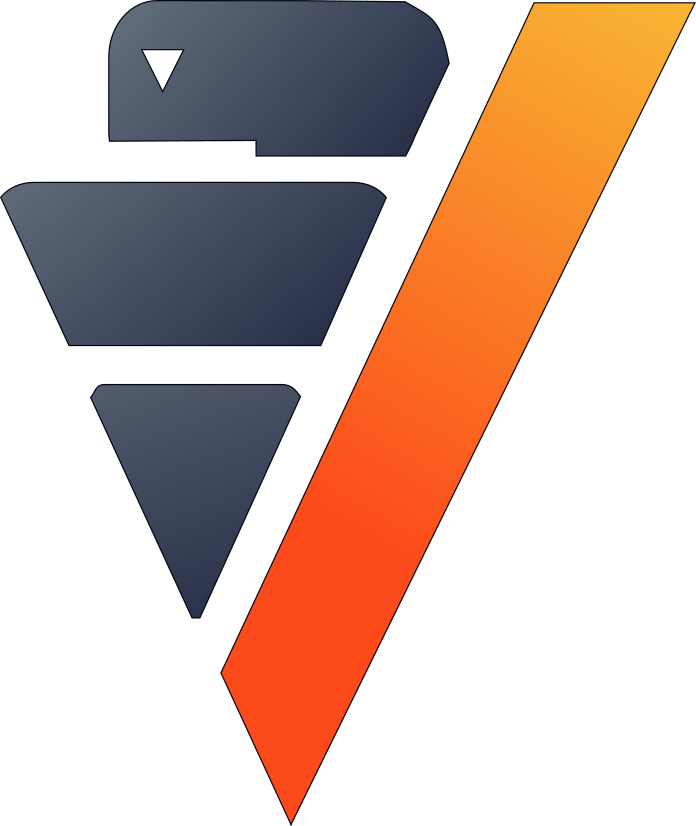

In [99]:
sm_consumption_weather_region = sm_consumption_weather.join(
                                    sm_meters,
                                    how = "natural",
                                    expr1 = ["*"],
                                    expr2 = ["residenceType", 
                                             "region"])
display(sm_consumption_weather_region)

count    percent  
"dateUTC"            1188432.0      100.0  
"meterID"            1188432.0      100.0  
"humidity"           1188432.0      100.0  
"temperature"        1188432.0      100.0  
"residenceType"      1188432.0      100.0  
"region"             1188432.0      100.0  
"value"              1188412.0     99.998  
Rows: 1-7 | Columns: 3
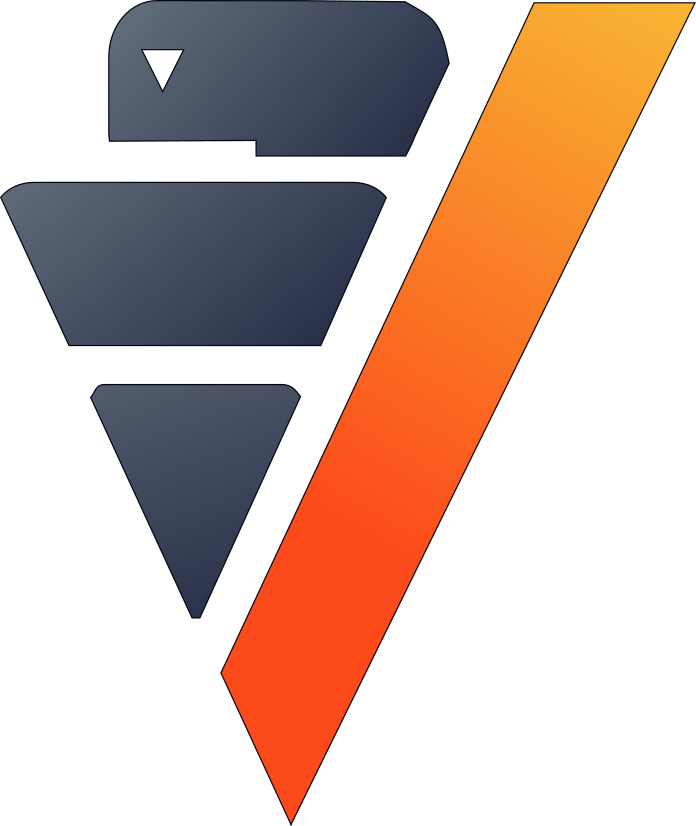

In [100]:
sm_consumption_weather_region.count_percent()

20 elements were filtered.


dateUTC    meterID    value    humidity   \\
1      2014-01-01 00:00:00        913    0.097        95.0   \\
2      2014-01-01 00:00:00        895    0.184        95.0   \\
3      2014-01-01 00:00:00        795    0.093        95.0   \\
4      2014-01-01 00:00:00        780    0.116        95.0   \\
5      2014-01-01 00:00:00        747    0.559        95.0   \\
6      2014-01-01 00:00:00        660    0.836        95.0   \\
7      2014-01-01 00:00:00        640    1.796        95.0   \\
8      2014-01-01 00:00:00        605    0.038        95.0   \\
9      2014-01-01 00:00:00        484    0.211        95.0   \\
10     2014-01-01 00:00:00        474    0.313        95.0   \\
11     2014-01-01 00:00:00        457    0.022        95.0   \\
12     2014-01-01 00:00:00        371    0.815        95.0   \\
13     2014-01-01 00:00:00        355    0.448        95.0   \\
14     2014-01-01 00:00:00        348    0.071        95.0   \\
15     2014-01-01 00:00:00        307    1.423        95.0   \\
16     2014-01-01 00:00:00        188    0.152        95.0   \\
17     2014-01-01 00:00:00        181    0.138        95.0   \\
18     2014-01-01 00:00:00        179    0.033        95.0   \\
19     2014-01-01 00:00:00        129    0.054        95.0   \\
20     2014-01-01 00:00:00        116    0.232        95.0   \\
21     2014-01-01 00:15:00        986    0.301        95.0   \\
22     2014-01-01 00:15:00        848    0.186        95.0   \\
23     2014-01-01 00:15:00        829    0.145        95.0   \\
24     2014-01-01 00:15:00        718    0.091        95.0   \\
25     2014-01-01 00:15:00        637    0.319        95.0   \\
26     2014-01-01 00:15:00        625    0.141        95.0   \\
27     2014-01-01 00:15:00        619    0.103        95.0   \\
28     2014-01-01 00:15:00        583    4.081        95.0   \\
29     2014-01-01 00:15:00        444    0.131        95.0   \\
30     2014-01-01 00:15:00        221    0.399        95.0   \\
31     2014-01-01 00:15:00         67    0.157        95.0   \\
32     2014-01-01 00:15:00         52    0.157        95.0   \\
33     2014-01-01 00:30:00        933    0.061        93.0   \\
34     2014-01-01 00:30:00        930    0.202        93.0   \\
35     2014-01-01 00:30:00        904    0.159        93.0   \\
36     2014-01-01 00:30:00        829    0.082        93.0   \\
37     2014-01-01 00:30:00        796    0.237        93.0   \\
38     2014-01-01 00:30:00        663     0.08        93.0   \\
39     2014-01-01 00:30:00        628    1.246        93.0   \\
40     2014-01-01 00:30:00        626    0.106        93.0   \\
41     2014-01-01 00:30:00        618    0.067        93.0   \\
42     2014-01-01 00:30:00        506    0.108        93.0   \\
43     2014-01-01 00:30:00        497    0.144        93.0   \\
44     2014-01-01 00:30:00        460    0.094        93.0   \\
45     2014-01-01 00:30:00        376    0.129        93.0   \\
46     2014-01-01 00:30:00        332    0.044        93.0   \\
47     2014-01-01 00:30:00        308    0.045        93.0   \\
48     2014-01-01 00:30:00        286    0.209        93.0   \\
49     2014-01-01 00:30:00        277    0.287        93.0   \\
50     2014-01-01 00:30:00        264    0.162        93.0   \\
51     2014-01-01 00:30:00        138    2.276        93.0   \\
52     2014-01-01 00:30:00         90    0.183        93.0   \\
53     2014-01-01 00:45:00        977    0.176        93.0   \\
54     2014-01-01 00:45:00        937    0.201        93.0   \\
55     2014-01-01 00:45:00        927    0.551        93.0   \\
56     2014-01-01 00:45:00        867    0.844        93.0   \\
57     2014-01-01 00:45:00        762     0.13        93.0   \\
58     2014-01-01 00:45:00        528    0.067        93.0   \\
59     2014-01-01 00:45:00        447    0.599        93.0   \\
60     2014-01-01 00:45:00        375    0.519        93.0   \\
61     2014-01-01 00:45:00        297    0.609        93.0   \\
62     2014-01-01 00:45:00        250    0.428     
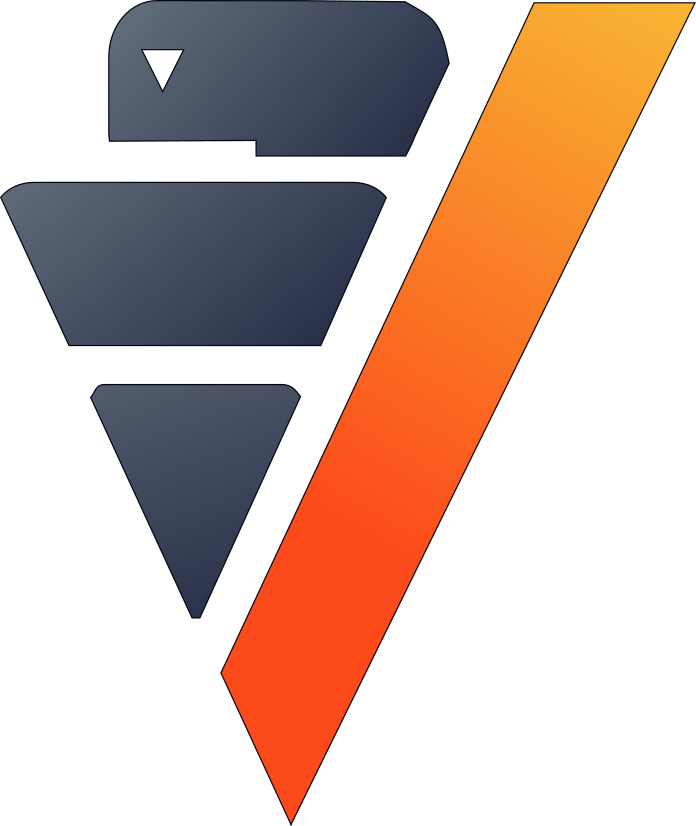

In [101]:
# drop empty values
sm_consumption_weather_region["value"].dropna()

Slice the time stamp to regular one based on 30 min window and interpolate the values.

dateUTC    meterID                 value            humidity   \\
1      2014-01-01 01:00:00          2                  None                None   \\
2      2014-01-01 01:30:00          2    0.0404516129032258    99.7956989247312   \\
3      2014-01-01 02:00:00          2    0.0473548387096774    99.3870967741936   \\
4      2014-01-01 02:30:00          2     0.054258064516129    98.9784946236559   \\
5      2014-01-01 03:00:00          2    0.0611612903225806    98.5698924731183   \\
6      2014-01-01 03:30:00          2    0.0680645161290322    98.1612903225806   \\
7      2014-01-01 04:00:00          2    0.0749677419354839     97.752688172043   \\
8      2014-01-01 04:30:00          2    0.0818709677419355    97.3440860215054   \\
9      2014-01-01 05:00:00          2    0.0887741935483871    96.9354838709677   \\
10     2014-01-01 05:30:00          2    0.0956774193548387    96.5268817204301   \\
11     2014-01-01 06:00:00          2      0.10258064516129    96.1182795698925   \\
12     2014-01-01 06:30:00          2     0.109483870967742    95.7096774193548   \\
13     2014-01-01 07:00:00          2     0.116387096774194    95.3010752688172   \\
14     2014-01-01 07:30:00          2     0.123290322580645    94.8924731182796   \\
15     2014-01-01 08:00:00          2     0.130193548387097    94.4838709677419   \\
16     2014-01-01 08:30:00          2     0.137096774193548    94.0752688172043   \\
17     2014-01-01 09:00:00          2                 0.144    93.6666666666667   \\
18     2014-01-01 09:30:00          2     0.150903225806452     93.258064516129   \\
19     2014-01-01 10:00:00          2     0.157806451612903    92.8494623655914   \\
20     2014-01-01 10:30:00          2     0.164709677419355    92.4408602150538   \\
21     2014-01-01 11:00:00          2     0.171612903225806    92.0322580645161   \\
22     2014-01-01 11:30:00          2     0.178516129032258    91.6236559139785   \\
23     2014-01-01 12:00:00          2      0.18541935483871    91.2150537634409   \\
24     2014-01-01 12:30:00          2     0.192322580645161    90.8064516129032   \\
25     2014-01-01 13:00:00          2     0.199225806451613    90.3978494623656   \\
26     2014-01-01 13:30:00          2     0.206129032258065     89.989247311828   \\
27     2014-01-01 14:00:00          2     0.213032258064516    89.5806451612903   \\
28     2014-01-01 14:30:00          2     0.219935483870968    89.1720430107527   \\
29     2014-01-01 15:00:00          2     0.226838709677419    88.7634408602151   \\
30     2014-01-01 15:30:00          2     0.233741935483871    88.3548387096774   \\
31     2014-01-01 16:00:00          2     0.240645161290323    87.9462365591398   \\
32     2014-01-01 16:30:00          2     0.247548387096774    87.5376344086021   \\
33     2014-01-01 17:00:00          2     0.254451612903226    87.1290322580645   \\
34     2014-01-01 17:30:00          2     0.261354838709677    86.7204301075269   \\
35     2014-01-01 18:00:00          2     0.268258064516129    86.3118279569892   \\
36     2014-01-01 18:30:00          2     0.275161290322581    85.9032258064516   \\
37     2014-01-01 19:00:00          2     0.282064516129032     85.494623655914   \\
38     2014-01-01 19:30:00          2     0.288967741935484    85.0860215053764   \\
39     2014-01-01 20:00:00          2     0.295870967741935    84.6774193548387   \\
40     2014-01-01 20:30:00          2     0.302774193548387    84.2688172043011   \\
41     2014-01-01 21:00:00          2     0.309677419354839    83.8602150537634   \\
42     2014-01-01 21:30:00          2      0.31658064516129    83.4516129032258   \\
43     2014-01-01 22:00:00          2     0.323483870967742    83.0430107526882   \\
44     2014-01-01 22:30:00          2     0.330387096774194    82.6344086021505   \\
45     2014-01-01 23:00:00          2     0.337290322580645    82.2258064516129   \\
46     2014-01-01 23:30:00          2     0.344193548387097    81.8172043010753   \\
47     2014-01-02 00:00:
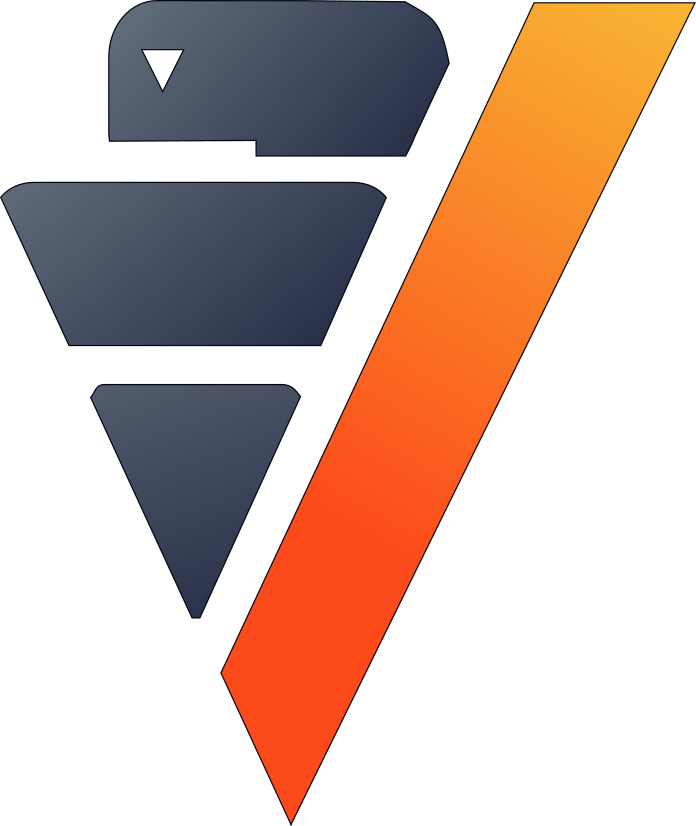

In [102]:
sm_consumption_weather_region_clean = sm_consumption_weather_region.interpolate(
                                                                        ts = "dateUTC",
                                                                        rule = "30 minutes",
                                                                        method = {"value": "linear",
                                                                                  "humidity": "linear",
                                                                                  "temperature": "linear",
                                                                                  "residenceType": "ffill",
                                                                                  "region": "ffill"},
                                                                        by = ["meterID"])
display(sm_consumption_weather_region_clean)

Let's aggregate the data to investigate the monthly consumption for each smart meter.

1000 elements were filtered.


meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2      None             None        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2014-01-01 00:00:00   \\
43           2         4                1        1    2015-01-01 00:00:00   \\
44           2         4                1        2    2014-02-01 00:00:00   \\
45           2         4                1        2    2015-02-01 00:00:00   \\
46           2         4                1        3    2014-03-01 00:00:00   \\
47           2         4                1        3    2015-03-01 00:00:00   \\
48           2         4                1        4    2014-04-01 00:00:00   \\
49           2         4                1        4    2015-04-01 00:00:00   \\
50           2         4                1        5    201
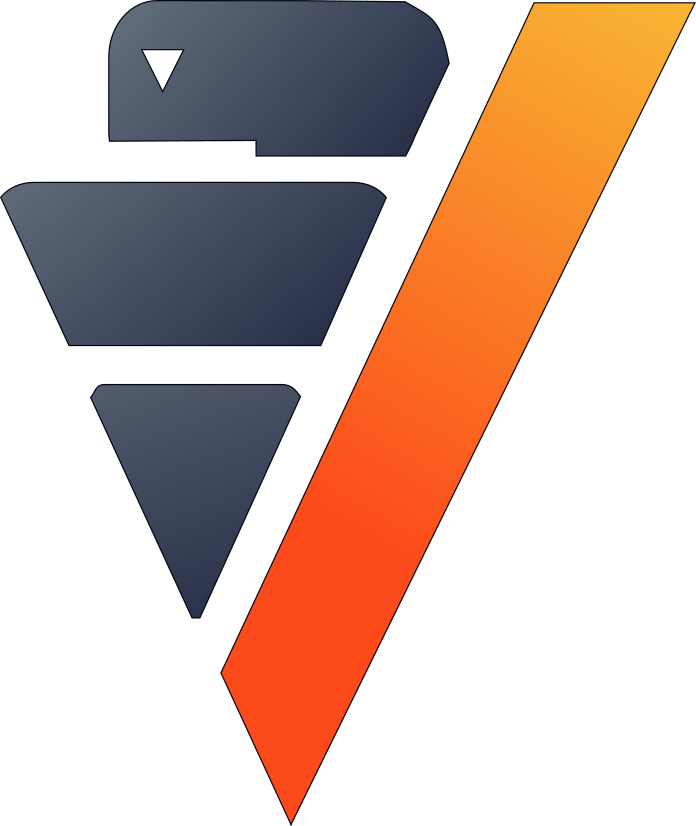

In [15]:
import verticapy.stats as st

sm_consumption_month = sm_consumption_weather_region_clean.groupby(
                                                                    columns=[
                                                                                "meterID", "region", "residenceType", "MONTH(dateUTC) AS month",
                                                                                "DATE_TRUNC('MONTH', dateUTC::date) AS date_month"
                                                                            ],
                                                                    expr=[
                                                                        st.sum(sm_consumption_weather_region["value"])._as("value"),
                                                                        st.avg(sm_consumption_weather_region["temperature"])._as(
                                                                            "avg_temperature"),
                                                                        st.avg(sm_consumption_weather_region["humidity"])._as("avg_humidity")
                                                                    ]
                                                                    ).filter("date_month < '2015-09-01'")


# save the data into db
vp.drop("sm_consumption_month", method="table")
sm_consumption_month.to_db('"public"."sm_consumption_month"',
                           relation_type="table",
                           inplace=True)

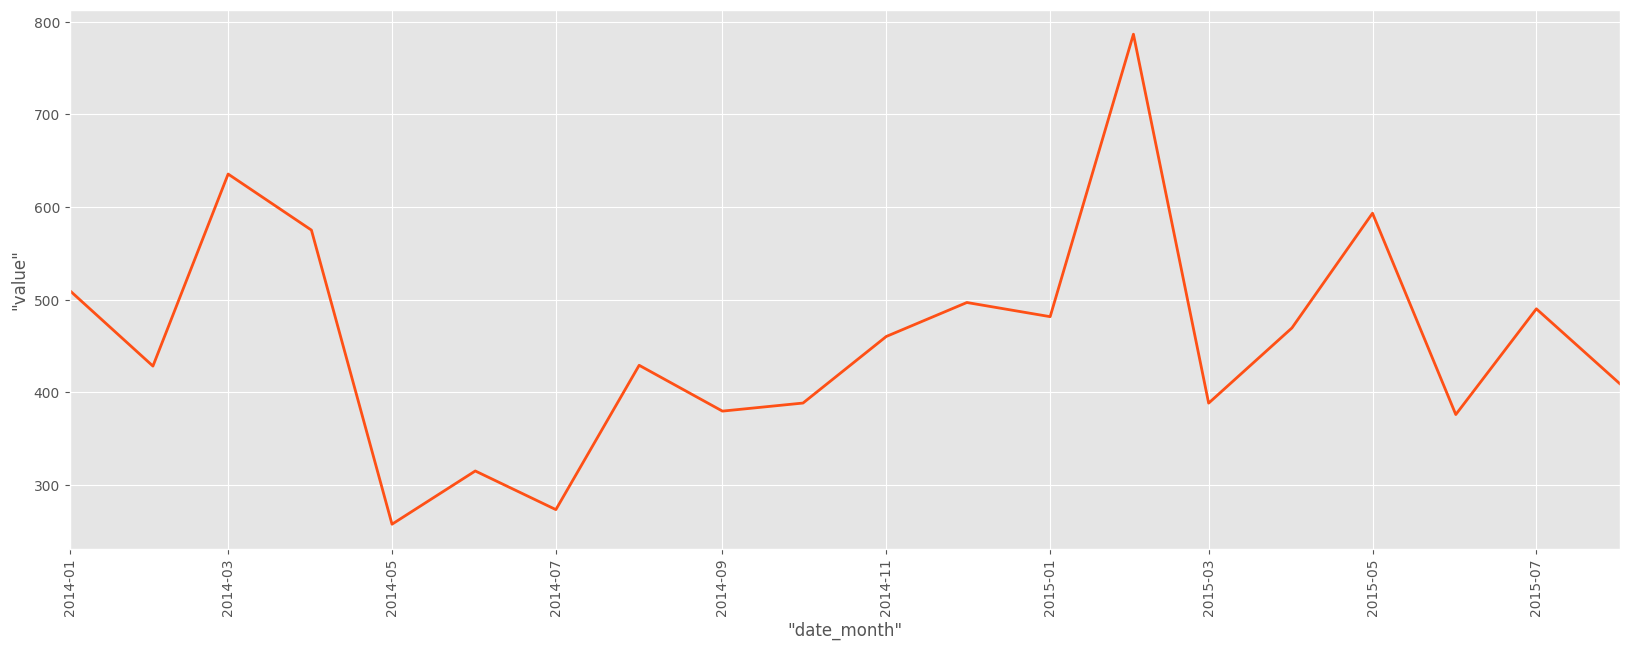

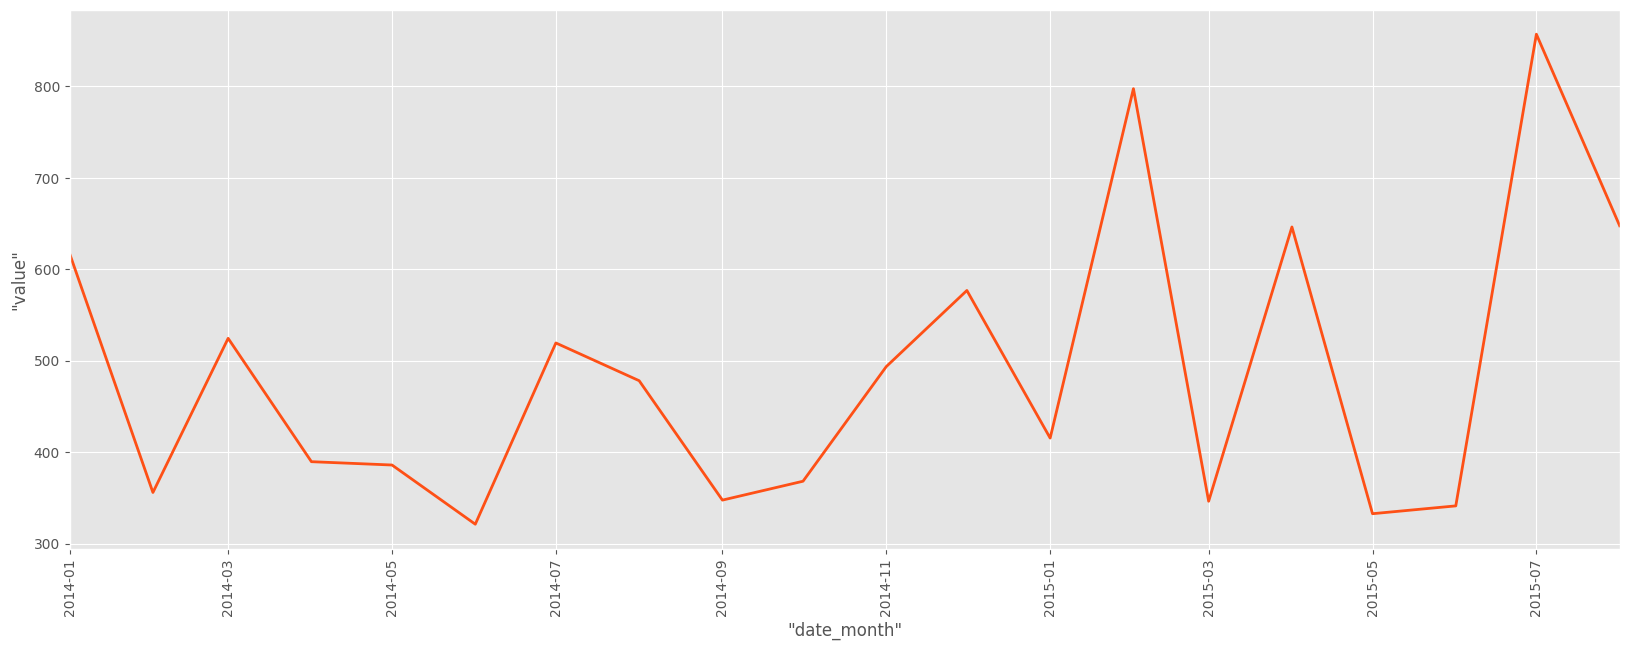

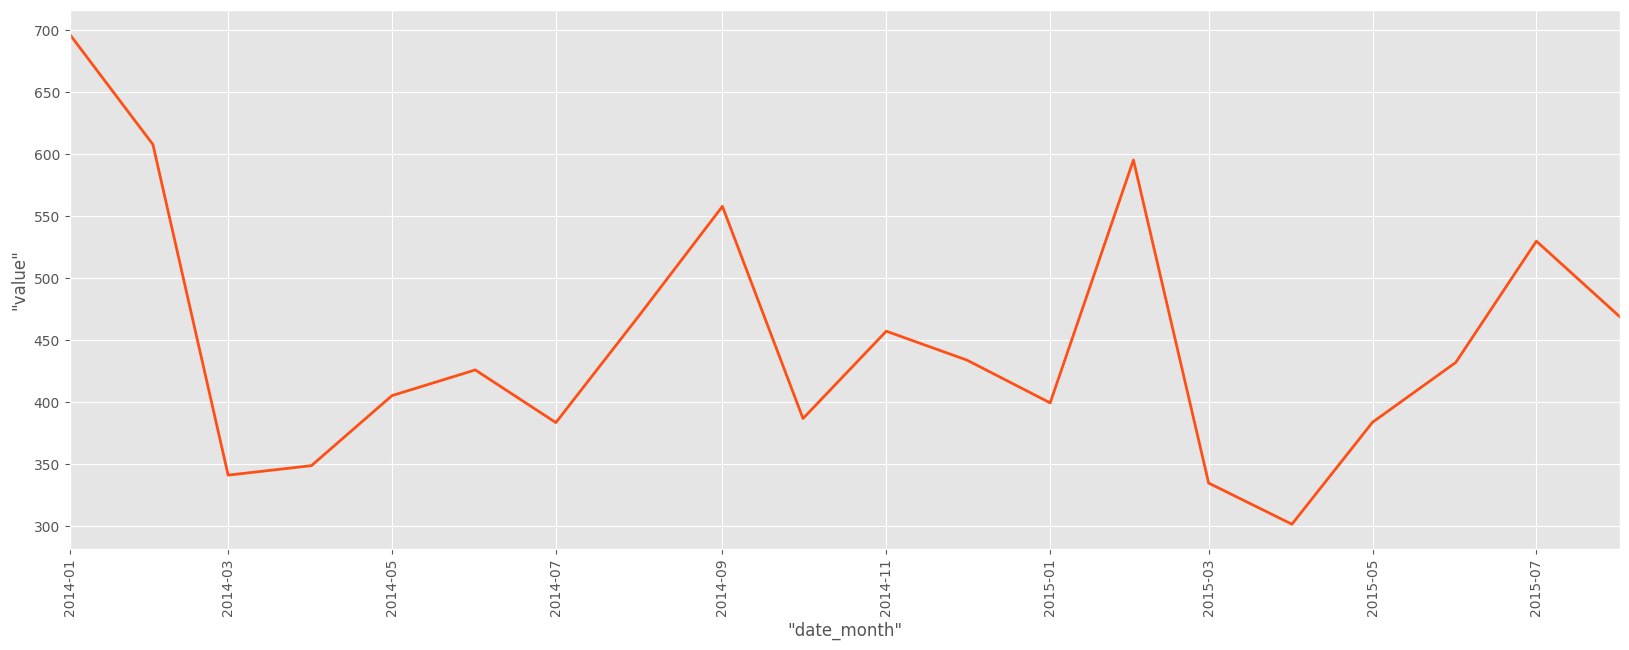

In [103]:
for meter_id in [10, 11, 14]:
    fig, ax = plt.subplots(figsize=(20, 7))
    sm_consumption_month[sm_consumption_month["meterID"] == meter_id]["value"].plot(ts = "date_month",
                                                                            ax=ax)


### Anomaly detection

#### Z-score

Let's find outliers in the distribution by computing z-score per each meter id.

meterID    region    residenceType    month             date_month   \\
1        364         2                1       12    2014-12-01 00:00:00   \\
2        399         4                1       10    2014-10-01 00:00:00   \\
3        809         4                1       11    2014-11-01 00:00:00   \\
4        951         4                1        4    2015-04-01 00:00:00   \\
                value     avg_temperature        avg_humidity   \\
1    1852.04580636529    39.2305333549752    89.9652523028262   \\
2    1589.23770463456    52.7068558110441    88.7730360914782   \\
3    1300.55731708241    45.5709955755231    86.4715802984117   \\
4    2128.45466198574      48.16211775914    73.6313461768108   \\
         value_zscore  
1    4.00855200430863  
2    4.07298404322647  
3     4.0151606376986  
4    4.01829822269677  
Rows: 1-4 | Columns: 9
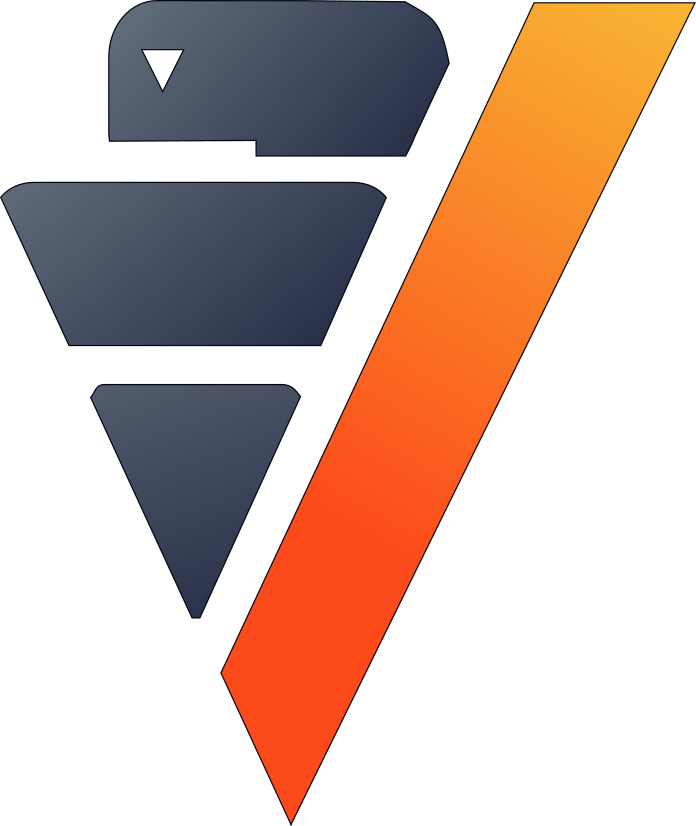

In [104]:
std = st.std(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
avg = st.avg(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
sm_consumption_month["value_zscore"] = (sm_consumption_month["value"] - avg) / std
sm_consumption_month.search("value_zscore > 4")

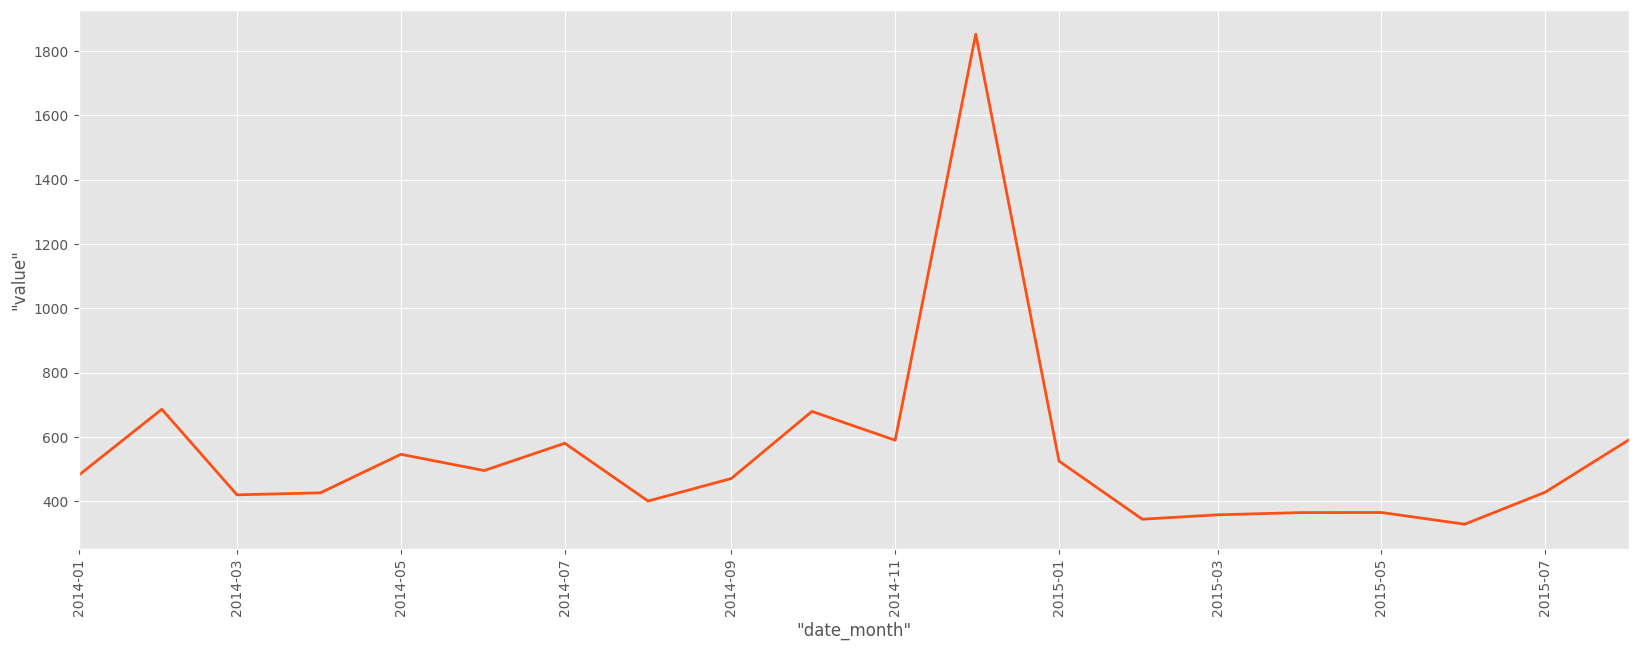

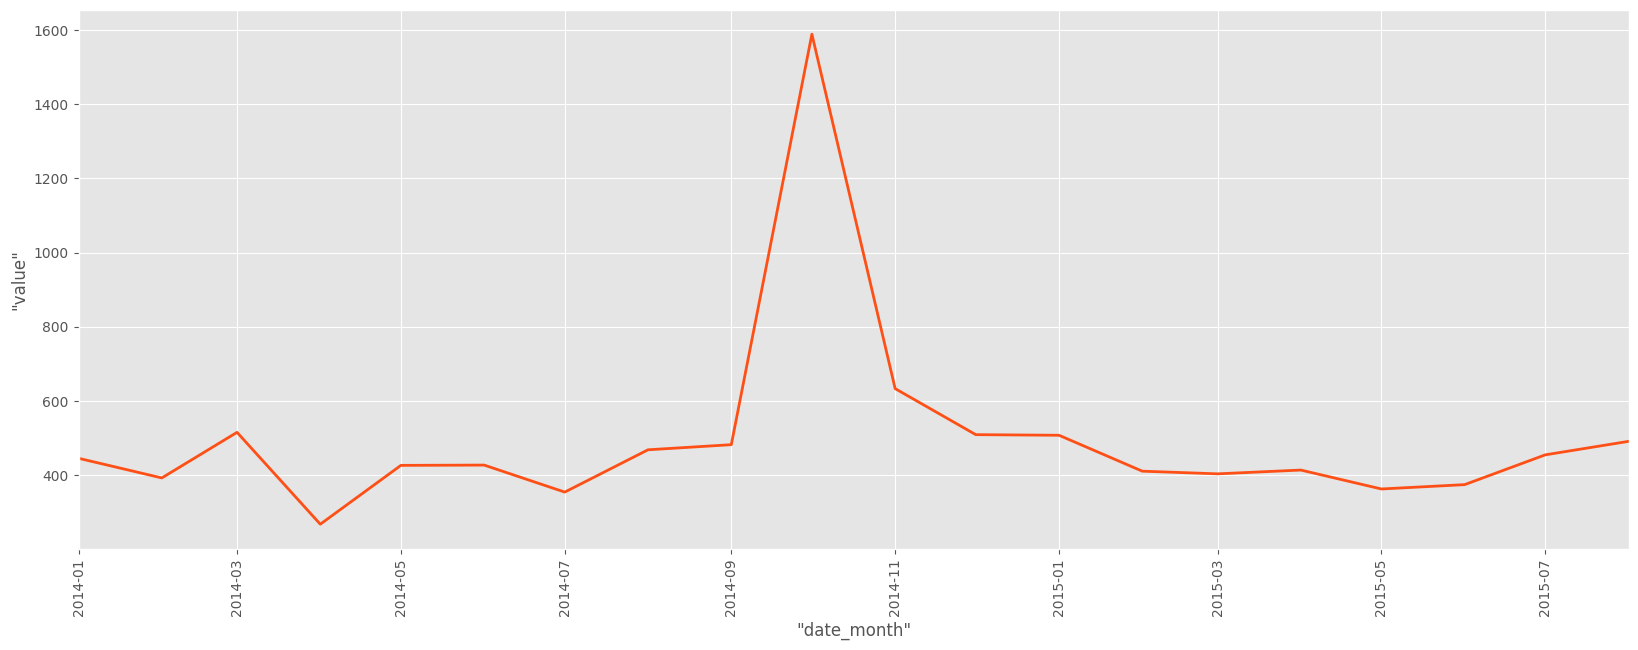

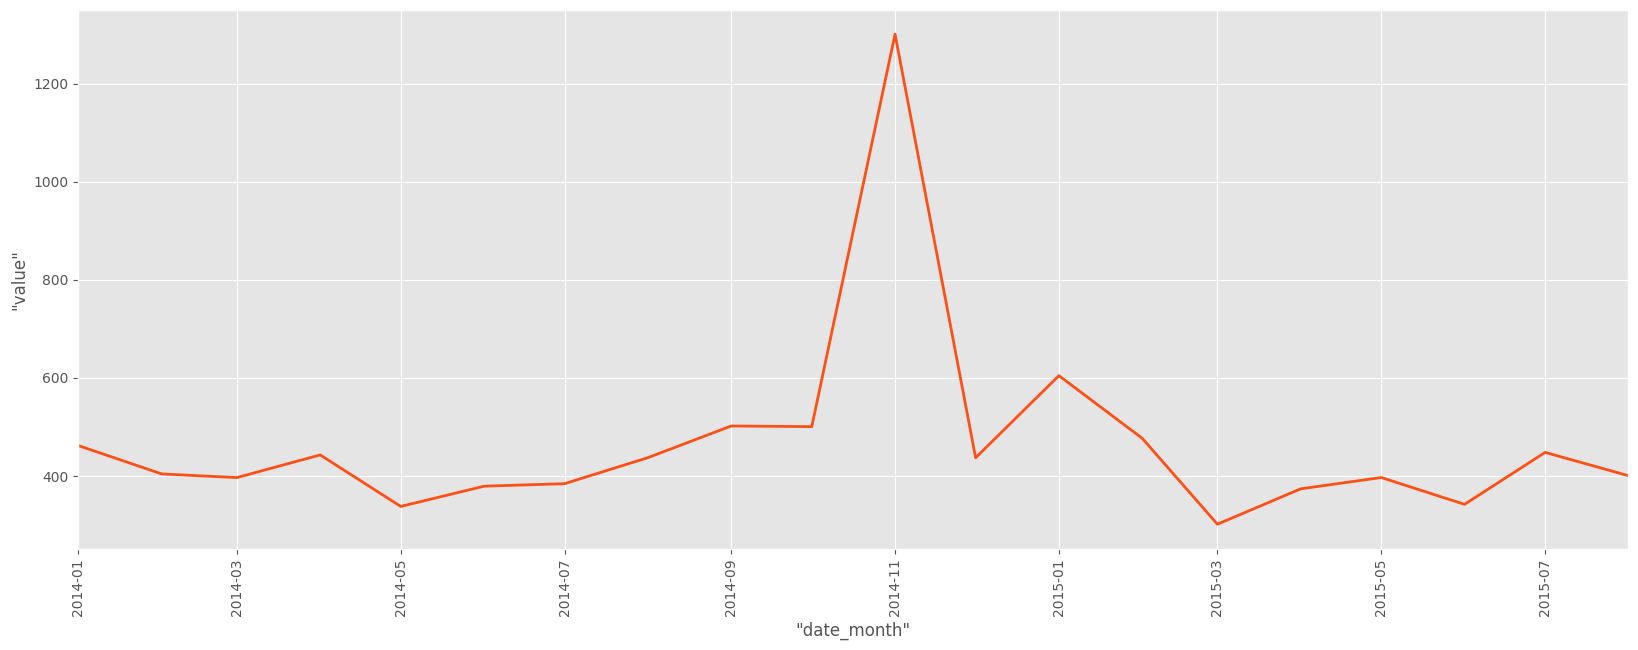

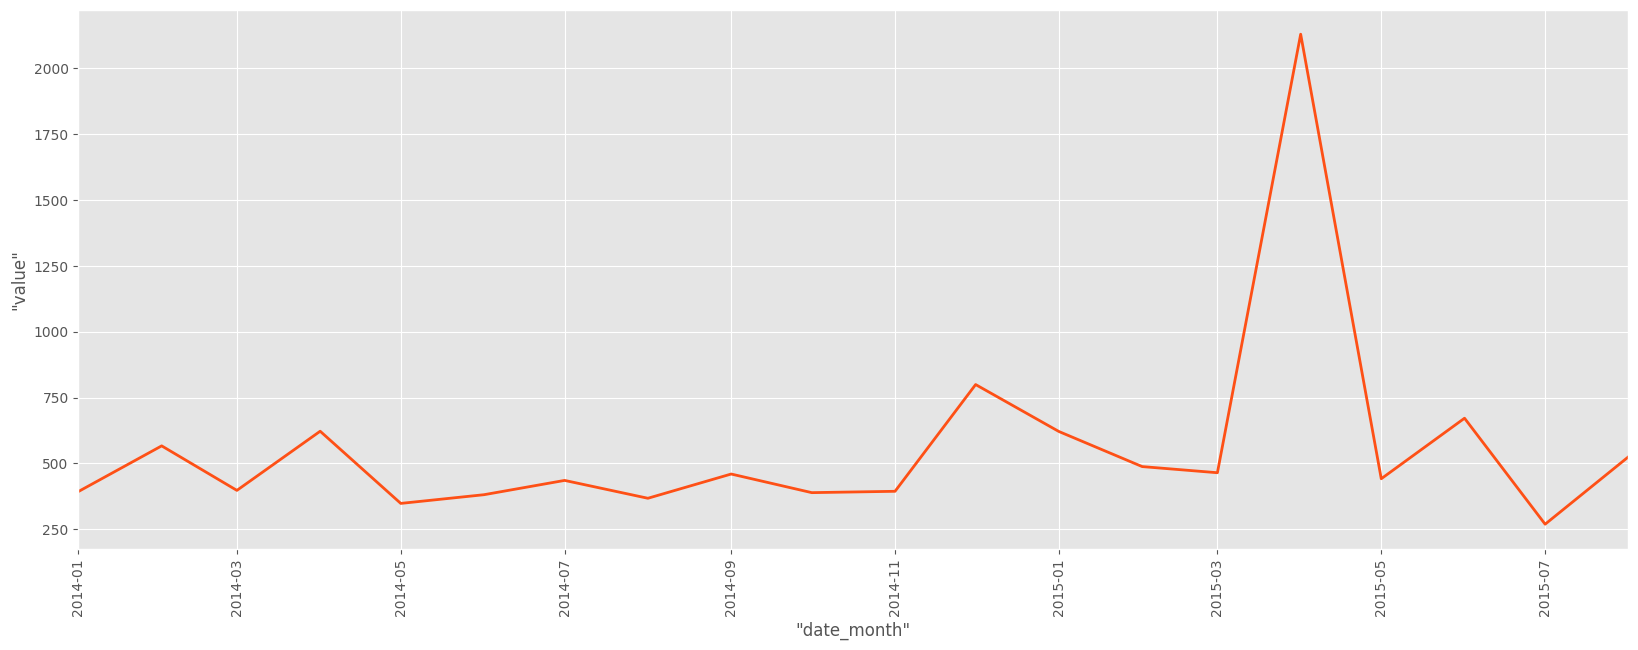

In [105]:
for meter_id in [364, 399, 809, 951]:
    fig, ax = plt.subplots(figsize=(20, 7))
    sm_consumption_month[sm_consumption_month["meterID"] == meter_id]["value"].plot(ts = "date_month",
                                                                            ax=ax)

#### Isolation Forest 

meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2      None             None        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2014-01-01 00:00:00   \\
43           2         4                1        1    2015-01-01 00:00:00   \\
44           2         4                1        2    2014-02-01 00:00:00   \\
45           2         4                1        2    2015-02-01 00:00:00   \\
46           2         4                1        3    2014-03-01 00:00:00   \\
47           2         4                1        3    2015-03-01 00:00:00   \\
48           2         4                1        4    2014-04-01 00:00:00   \\
49           2         4                1        4    2015-04-01 00:00:00   \\
50           2         4                1        5    201
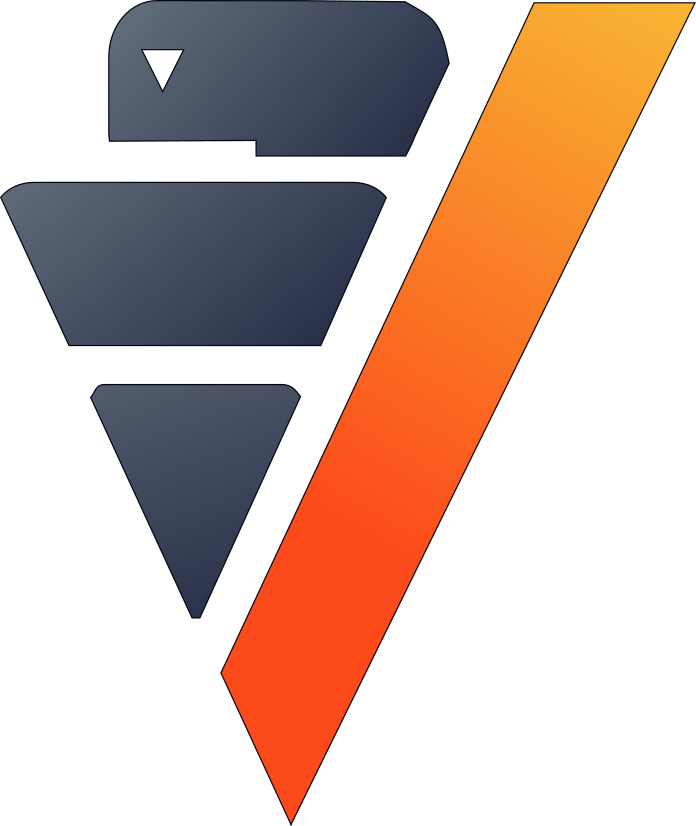

In [106]:
# read data
sm_consumption_month = vp.vDataFrame("sm_consumption_month", schema="public")
sm_consumption_month 

462 elements were filtered.


count    percent  
"meterID"              20000.0      100.0  
"region"               20000.0      100.0  
"residenceType"        20000.0      100.0  
"month"                20000.0      100.0  
"date_month"           20000.0      100.0  
"value"                20000.0      100.0  
"avg_temperature"      20000.0      100.0  
"avg_humidity"         20000.0      100.0  
Rows: 1-8 | Columns: 3
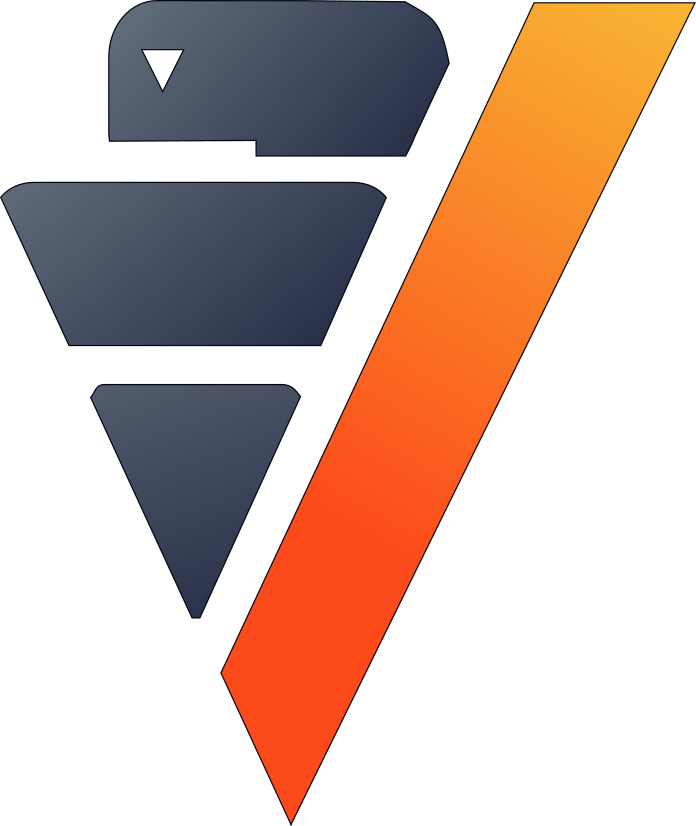

In [107]:
sm_consumption_month.dropna()
sm_consumption_month.count_percent()

In [108]:
from verticapy.learn.ensemble import IsolationForest
model = IsolationForest(name = "public.energy_consumption",
                               n_estimators = 20,
                               max_depth = 3)
model.fit(sm_consumption_month,
         X=sm_consumption_month.get_columns(exclude_columns=['meterID', 'date_month'])
         )



call_string
SELECT iforest('public.energy_consumption', '"public"."_verticapy_tmp_view_dbadmin_38231_9628837777_"', '"region", "residenceType", "month", "value", "avg_temperature", "avg_humidity"' USING PARAMETERS exclude_columns='', ntree=20, sampling_size=0.632, col_sample_by_tree=1, max_depth=3, nbins=32);

details
   predictor   |      type      
---------------+----------------
    region     |      int       
 residencetype |      int       
     month     |      int       
     value     |float or numeric
avg_temperature|float or numeric
 avg_humidity  |float or numeric


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 20  
rejected_row_count|  0  
accepted_row_count|20000

For Isolation forest you can use `decision_function` to return the anomaly score (range from 0 to 1), then it gave you the flexibility to choose the threshold manually.

meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2         4                1        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2015-01-01 00:00:00   \\
43           2         4                1        2    2014-02-01 00:00:00   \\
44           2         4                1        2    2015-02-01 00:00:00   \\
45           2         4                1        3    2014-03-01 00:00:00   \\
46           2         4                1        3    2015-03-01 00:00:00   \\
47           2         4                1        4    2014-04-01 00:00:00   \\
48           2         4                1        4    2015-04-01 00:00:00   \\
49           2         4                1        5    2014-05-01 00:00:00   \\
50           2         4                1        5    201
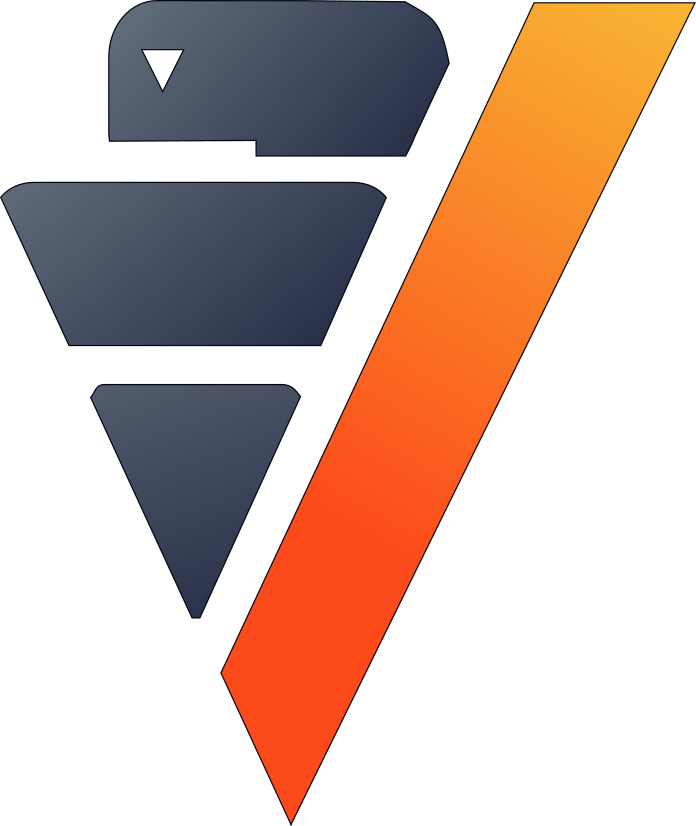

In [109]:
# sm_consumption_month.drop("anomaly_score")
model.decision_function(sm_consumption_month,
                       X=sm_consumption_month.get_columns(exclude_columns=['meterID', 'date_month']),
                       name="anomaly_score")

Set contamination to 0.1% as anomalies.

meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2         4                1        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2015-01-01 00:00:00   \\
43           2         4                1        2    2014-02-01 00:00:00   \\
44           2         4                1        2    2015-02-01 00:00:00   \\
45           2         4                1        3    2014-03-01 00:00:00   \\
46           2         4                1        3    2015-03-01 00:00:00   \\
47           2         4                1        4    2014-04-01 00:00:00   \\
48           2         4                1        4    2015-04-01 00:00:00   \\
49           2         4                1        5    2014-05-01 00:00:00   \\
50           2         4                1        5    201
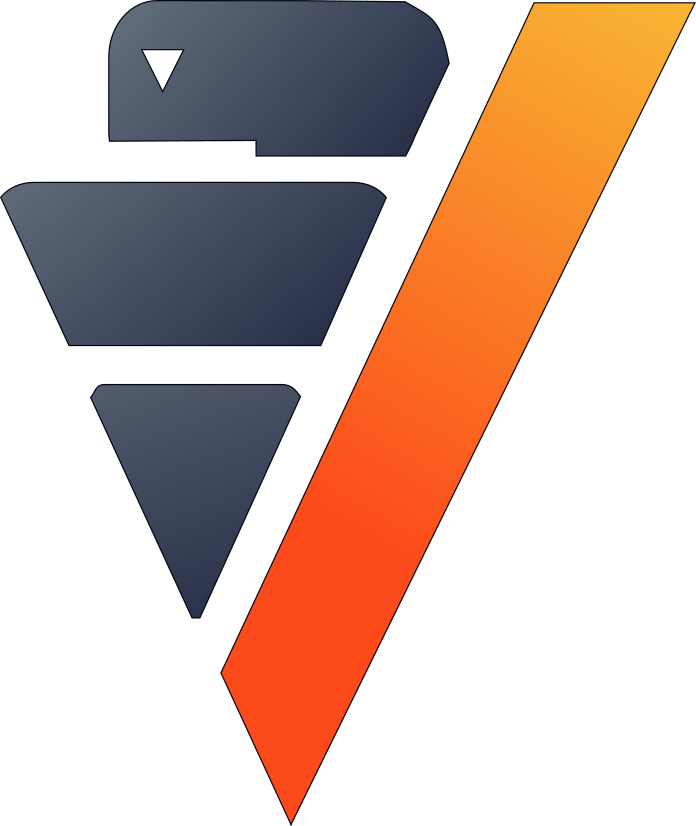

In [110]:
model.predict(sm_consumption_month,
                       X=sm_consumption_month.get_columns(exclude_columns=['meterID', 'date_month','anomaly_score']),
                       name="anomaly",
                       contamination=0.001)

meterID    region    residenceType    month             date_month   \\
1         583         0                3        4    2015-04-01 00:00:00   \\
2         873         4                1        1    2015-01-01 00:00:00   \\
3         951         4                1        4    2015-04-01 00:00:00   \\
4         508         0                1        4    2015-04-01 00:00:00   \\
5         249         0                3        1    2015-01-01 00:00:00   \\
6         522         0                3        1    2015-01-01 00:00:00   \\
7         967         0                3        1    2015-01-01 00:00:00   \\
8         648         0                3        1    2015-01-01 00:00:00   \\
9         272         0                1       12    2014-12-01 00:00:00   \\
10        566         0                1        2    2014-02-01 00:00:00   \\
11        861         0                1       12    2014-12-01 00:00:00   \\
12        706         0                1       12    2014-12-01 00:00:00   \\
13        249         0                3        9    2014-09-01 00:00:00   \\
14        953         0                3        2    2015-02-01 00:00:00   \\
                 value     avg_temperature        avg_humidity   \\
1     1309.72539603916    46.4135573314573    79.9755039514271   \\
2     2036.75970653485    34.8437214942326    91.5673841190167   \\
3     2128.45466198574      48.16211775914    73.6313461768108   \\
4     384.767751833353    48.7789903797056    71.3580588283086   \\
5     764.859056852293    35.5336800436853    92.6500151752338   \\
6     758.163657181946    35.9103253184901    92.4448193218974   \\
7     783.761409772869    35.8966474908576    92.0933621326495   \\
8     886.483970027706    35.3325187491329    91.8913059910852   \\
9     981.125100417974    38.9010590572142    89.8129277835325   \\
10    1326.65297082663    40.4796337807242    85.2778785982877   \\
11    776.570974125889    38.0328113880569    91.2406607257618   \\
12    856.967184637011    38.0741336163396    91.9830208447641   \\
13    1155.62122167834    55.9690265670271    81.7180465644236   \\
14    832.969099118846    35.8343219092197    91.6298779048874   \\
          anomaly_score    anomaly  
1     0.598064281576457          1  
2     0.590313595569322          1  
3     0.578460519287356          1  
4     0.575347643907624          1  
5     0.574787316009234          1  
6     0.574787316009234          1  
7     0.574787316009234          1  
8     0.574787316009234          1  
9     0.573885474380333          1  
10    0.573620706660662          1  
11    0.572504528986361          1  
12    0.572504528986361          1  
13    0.571018345626695          1  
14    0.570321241662143          1  
Rows: 1-14 | Columns: 10
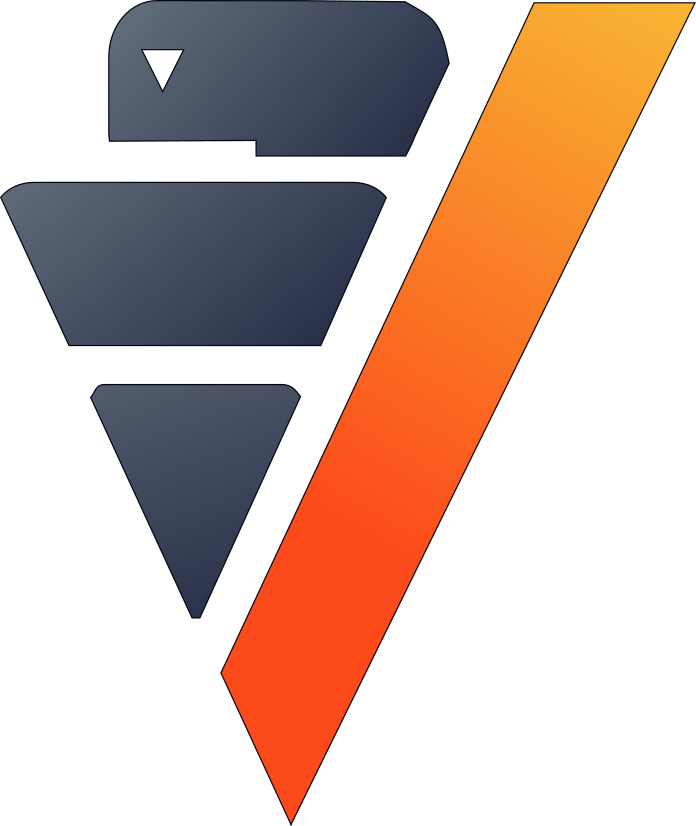

In [111]:
sm_consumption_month[sm_consumption_month['anomaly']==1].sort({"anomaly_score": "desc"})

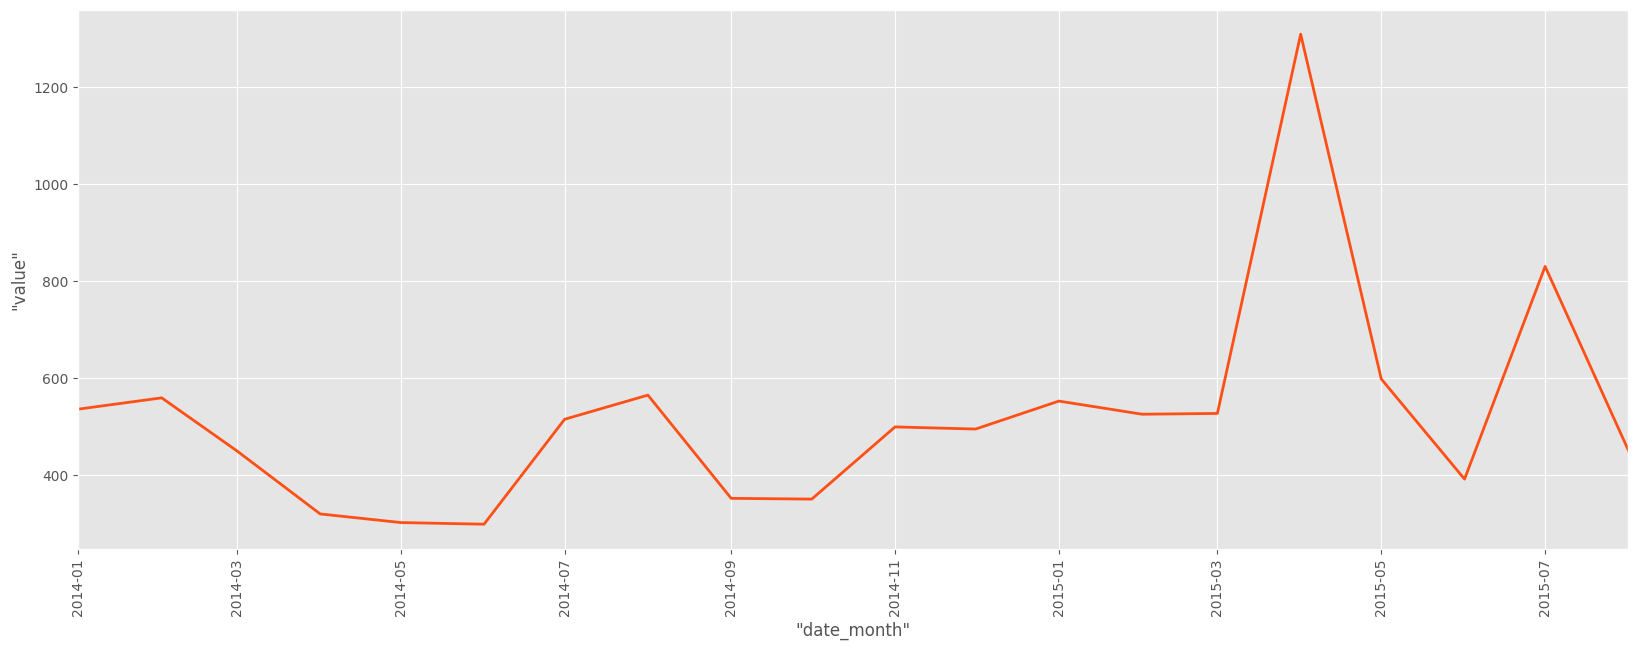

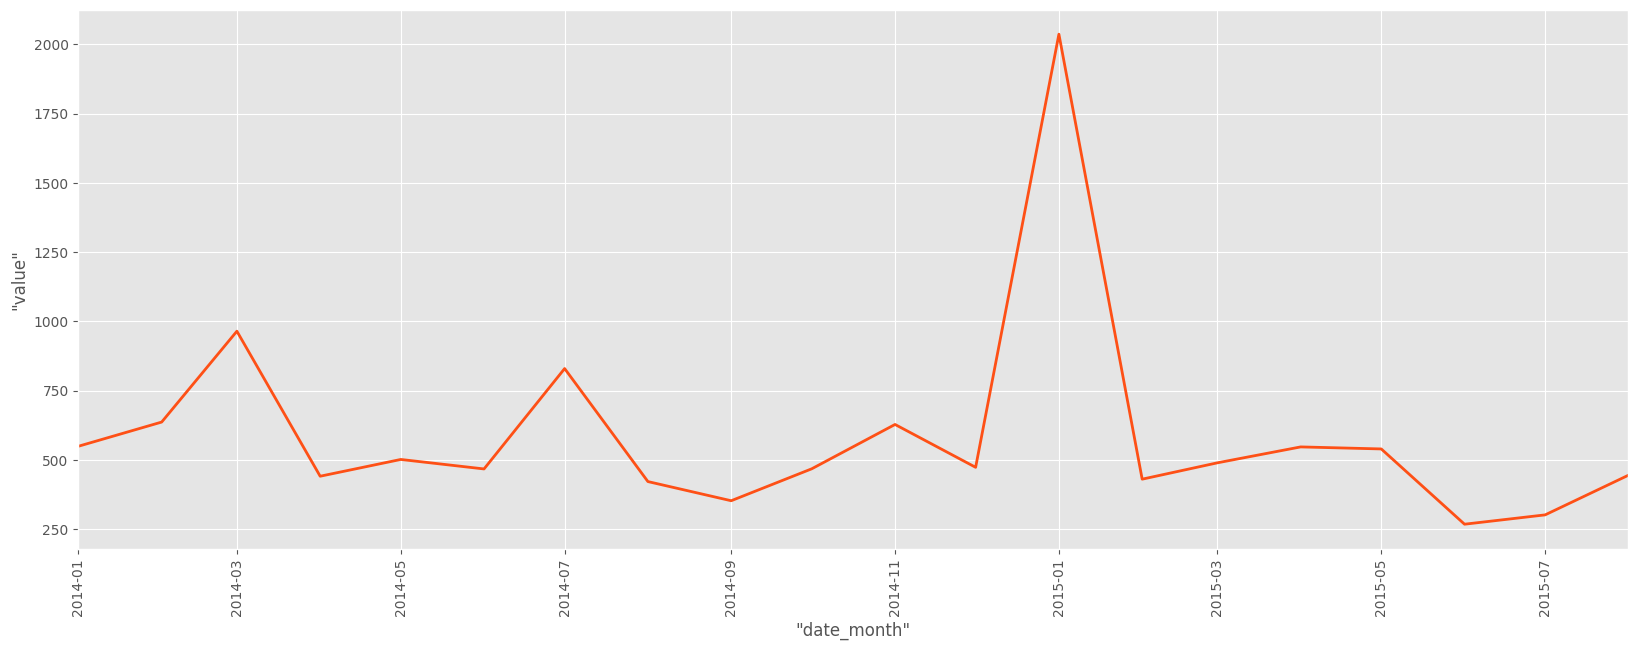

In [112]:
for meter_id in [583,873]:
    fig, ax = plt.subplots(figsize=(20, 7))
    sm_consumption_month[sm_consumption_month["meterID"] == meter_id]["value"].plot(ts = "date_month",
                                                                            ax=ax)

## Classification 

In general, conduction manual data preparation and features engineering lead to better results.
In this section, we will not focus on data preparation because it's out of our scope (please refer to the previous workshops)

customerID    gender    SeniorCitizen    Partner    Dependents   \\
1    0002-ORFBO    Female                0       True          True   \\
2    0003-MKNFE      Male                0      False         False   \\
3    0004-TLHLJ      Male                0      False         False   \\
     tenure    PhoneService    MultipleLines    InternetService   \\
1         9            True               No                DSL   \\
2         9            True              Yes                DSL   \\
3         4            True               No        Fiber optic   \\
     OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport   \\
1                No             Yes                  No            Yes   \\
2                No              No                  No             No   \\
3                No              No                 Yes             No   \\
     StreamingTV    StreamingMovies          Contract    PaperlessBilling   \\
1            Yes                 No          One year                True   \\
2             No                Yes    Month-to-month               False   \\
3             No                 No    Month-to-month                True   \\
        PaymentMethod    MonthlyCharges    TotalCharges    Churn  
1        Mailed check              65.6           593.3    False  
2        Mailed check              59.9           542.4    False  
3    Electronic check              73.9          280.85     True  
Rows: 1-3 | Columns: 21
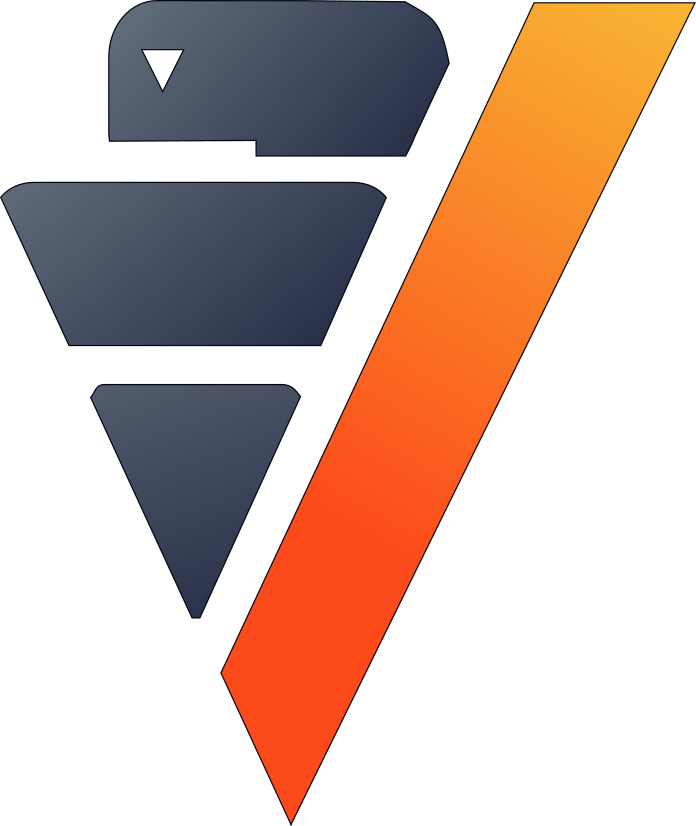

In [113]:
# Read data
churn = vp.vDataFrame("public.churn")
churn.head(3)

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          1             1         9               1   \\
2                  0          0             0         9               1   \\
3                  0          0             0         4               1   \\
4                  1          1             0        13               1   \\
5                  1          1             0         3               1   \\
6                  0          0             1         9               1   \\
7                  1          1             0        71               1   \\
8                  0          1             0        63               1   \\
9                  1          0             0         7               1   \\
10                 0          1             1        65               1   \\
11                 0          0             0        54               0   \\
12                 0          1             1        72               1   \\
13                 0          1             0         5               1   \\
14                 0          0             0        72               1   \\
15                 0          0             0        56               0   \\
16                 0          1             1        71               1   \\
17                 0          1             1        34               0   \\
18                 1          0             0         1               1   \\
19                 1          0             0        45               1   \\
20                 1          0             0         1               0   \\
21                 1          1             0        50               1   \\
22                 0          1             0        13               1   \\
23                 0          1             1        23               1   \\
24                 0          0             0         3               1   \\
25                 0          1             1         4               1   \\
26                 0          1             1         1               0   \\
27                 0          1             1        55               1   \\
28                 0          1             1        54               1   \\
29                 0          0             0        26               1   \\
30                 0          1             1        69               1   \\
31                 0          1             1        37               1   \\
32                 0          1             0        49               1   \\
33                 0          1             0        66               1   \\
34                 0          0             0        67               1   \\
35                 0          1             1        20               0   \\
36                 0          0             1        43               1   \\
37                 0          1             0        55               1   \\
38                 0          1             0        59               1   \\
39                 0          1             1        12               1   \\
40                 0          1             1        27               1   \\
41                 1          0             0         2               1   \\
42                 0          0             0        27               1   \\
43                 0          1             1        25               1   \\
44                 0          1             1        25               1   \\
45                 0          0             1        29               0   \\
46                 0          1             0        72               1   \\
47                 0          0             0        14               1   \\
48                 0          0             0        35               1   \\
49                 0          0             0         1               1   \\
50                 0          0             0        29               1   \\
51                 0          0             0        64               1   \\
52 
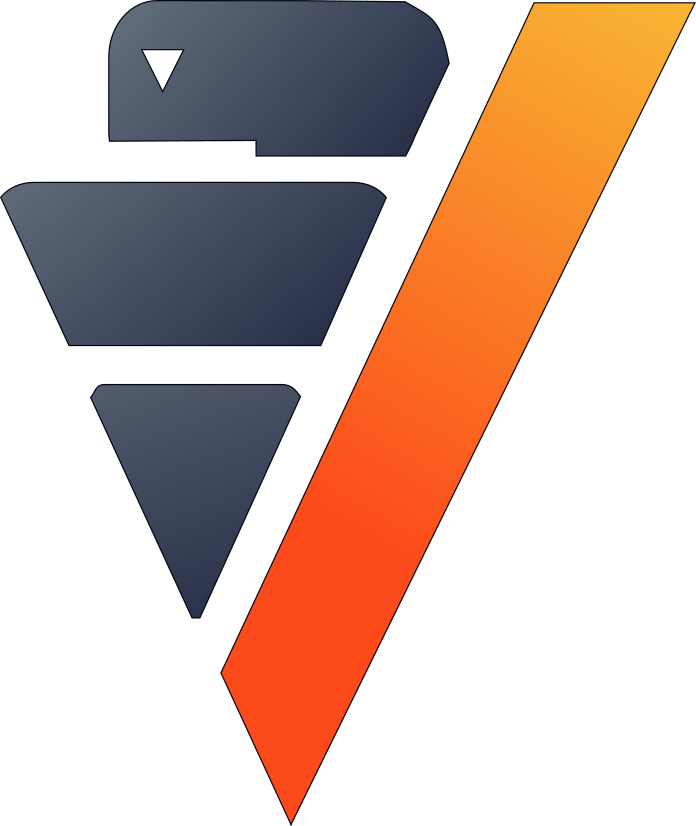

In [114]:
for column in ["DeviceProtection",
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID",
                             "gender",
                             "Contract",
                             "PaymentMethod",
                             "InternetService"])

In [115]:
# Split data to train and test data
train, test = churn.train_test_split(test_size=0.2,
                                     random_state=0)

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/classification.php)

value  
auc                0.8454124312530789  
prc_auc            0.6608407754304277  
accuracy           0.8056537102473498  
log_loss            0.175572440222451  
precision          0.6707317073170732  
recall             0.5684754521963824  
f1_score           0.6153846153846153  
mcc               0.48952219590950974  
informedness      0.46341708643762747  
markedness         0.5170978526712591  
csi                0.4444444444444444  
cutoff                            0.5  
Rows: 1-12 | Columns: 2
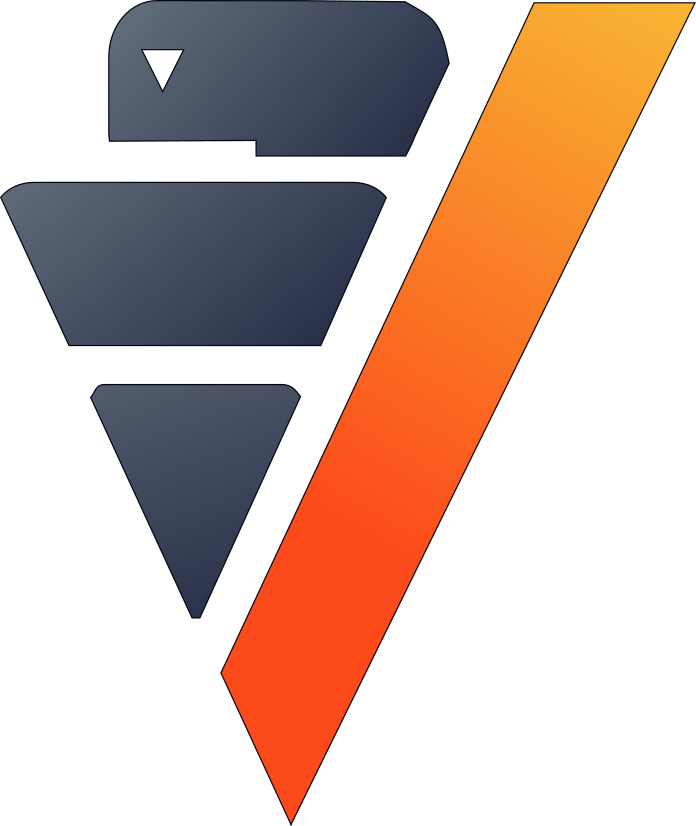

In [116]:
# Initialize the model
lr_model = LogisticRegression("churn_model",
                              penalty='L2',
                              tol=1e-6,
                              max_iter=1000,
                              solver="BFGS")
lr_model.drop()
lr_model.fit(train,
             churn.get_columns(exclude_columns=["churn"]),
             'churn',
             test)

lr_model.classification_report()

importance    sign  
tenure                                         28.91      -1  
totalcharges                                   19.49       1  
contract_month-to-month                         8.32       1  
monthlycharges                                  7.38       1  
internetservice_fiber_optic                     5.58       1  
phoneservice                                    4.92      -1  
contract_one_year                               3.79       1  
techsupport                                     3.17      -1  
onlinesecurity                                   2.9      -1  
paymentmethod_electronic_check                  2.66       1  
internetservice_dsl                             2.62       1  
paperlessbilling                                2.21       1  
onlinebackup                                    1.77      -1  
seniorcitizen                                   1.67       1  
streamingmovies                                 1.05       1  
dependents                                      0.97      -1  
multiplelines                                   0.96       1  
deviceprotection                                0.66      -1  
paymentmethod_bank_transfer_(automatic)         0.44       1  
paymentmethod_credit_card_(automatic)           0.31      -1  
partner                                         0.11       1  
streamingtv                                      0.1       1  
gender_female                                   0.01      -1  
Rows: 1-23 | Columns: 3
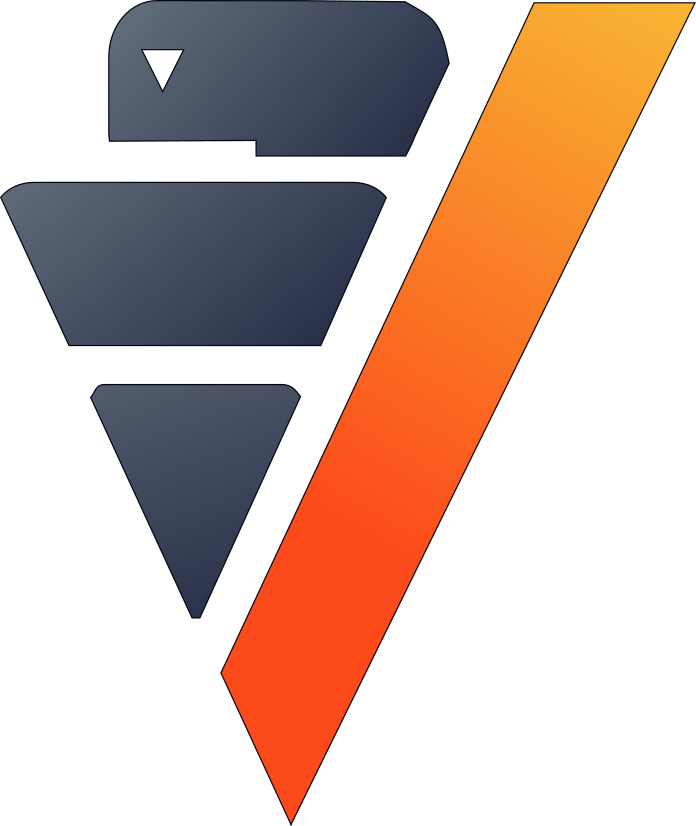

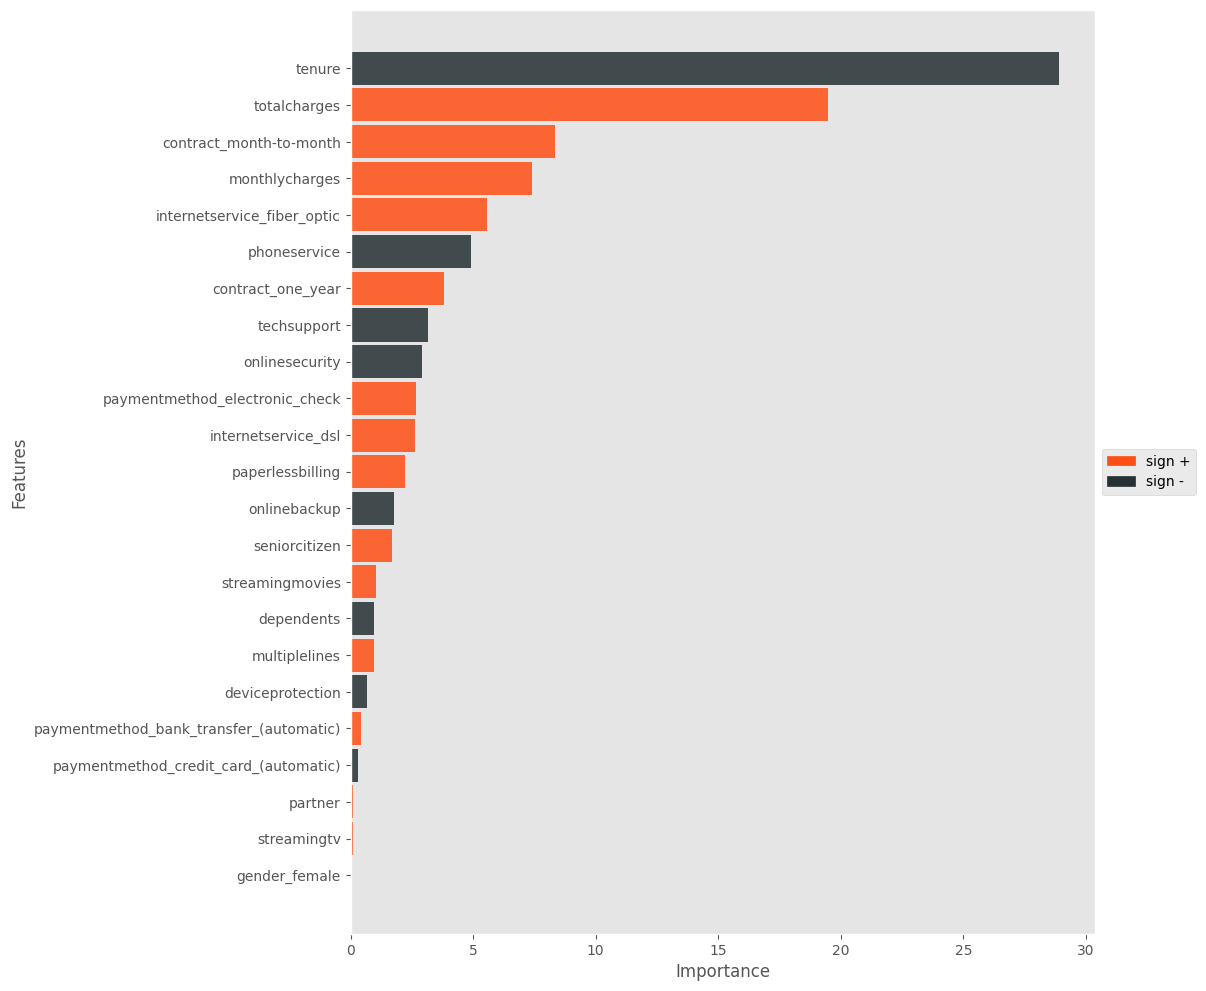

In [117]:
# Feauture importance
lr_model.features_importance()

## Regression

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/regression.php)

462 elements were filtered.
No duplicates detected.


meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2         4                1        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2015-01-01 00:00:00   \\
43           2         4                1        2    2014-02-01 00:00:00   \\
44           2         4                1        2    2015-02-01 00:00:00   \\
45           2         4                1        3    2014-03-01 00:00:00   \\
46           2         4                1        3    2015-03-01 00:00:00   \\
47           2         4                1        4    2014-04-01 00:00:00   \\
48           2         4                1        4    2015-04-01 00:00:00   \\
49           2         4                1        5    2014-05-01 00:00:00   \\
50           2         4                1        5    201
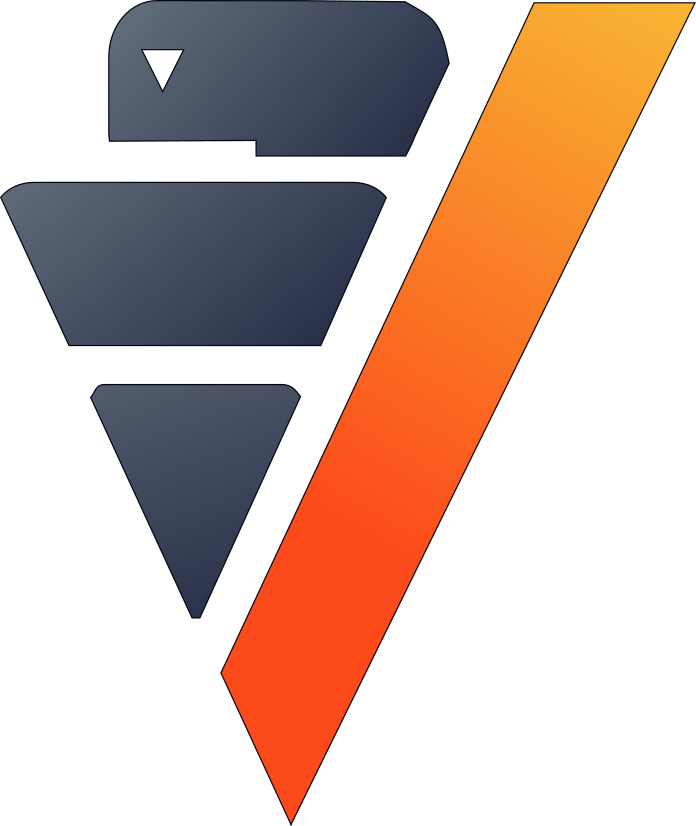

In [118]:
sm_consumption_month = vp.vDataFrame("public.sm_consumption_month").dropna().drop_duplicates()
sm_consumption_month

We aggregat temperature, humidity and value for all the records on the same month.

date_month     avg_temperature        avg_humidity   \\
1     2014-11-01 00:00:00    45.3979899292866    88.0328118983479   \\
2     2014-12-01 00:00:00    38.7073317429302    90.1266322566734   \\
3     2015-01-01 00:00:00    35.8484858512709    91.8798289962435   \\
4     2014-07-01 00:00:00    58.4150092027578    83.1929483540257   \\
5     2014-08-01 00:00:00    59.6366866814821    81.7142981049692   \\
6     2014-09-01 00:00:00    54.7147706368972    84.2122326186679   \\
7     2014-10-01 00:00:00    52.4278642032315    88.0958173736229   \\
8     2015-06-01 00:00:00    58.2429445569665    79.2785491581424   \\
9     2015-07-01 00:00:00    60.2849553901897    80.9952501996275   \\
10    2015-08-01 00:00:00    57.1259572963495    81.4305749400669   \\
11    2015-02-01 00:00:00    36.4929312046181    91.0540738944491   \\
12    2015-03-01 00:00:00    41.3592633505567    82.1926855108787   \\
13    2015-04-01 00:00:00    46.5884620294229    78.5238162391967   \\
14    2015-05-01 00:00:00    50.4154248011946    79.0555998675961   \\
15    2014-04-01 00:00:00    47.7690060930857    84.5080035368103   \\
16    2014-05-01 00:00:00    51.7468437374879    81.0103068639607   \\
17    2014-06-01 00:00:00     56.872634795641    79.3270517094331   \\
18    2014-01-01 00:00:00    40.1335348808859    85.9153373717054   \\
19    2014-02-01 00:00:00     41.102100882025    87.3737237922516   \\
20    2014-03-01 00:00:00    44.3160395910968    82.6916426539763   \\
             avg_value  
1     525.460479278221  
2     617.041625960593  
3     615.157774280951  
4     444.969792344237  
5     460.546418839818  
6      456.19735180739  
7     491.826905924877  
8     413.269915351096  
9     450.166562295613  
10     448.91484894365  
11    521.089168234494  
12     519.12979640761  
13    457.449115860485  
14    440.893439885747  
15    454.121818124936  
16    444.939538017412  
17    409.111397448429  
18    590.305314854288  
19    523.743223315843  
20    512.325822036825  
Rows: 1-20 | Columns: 4
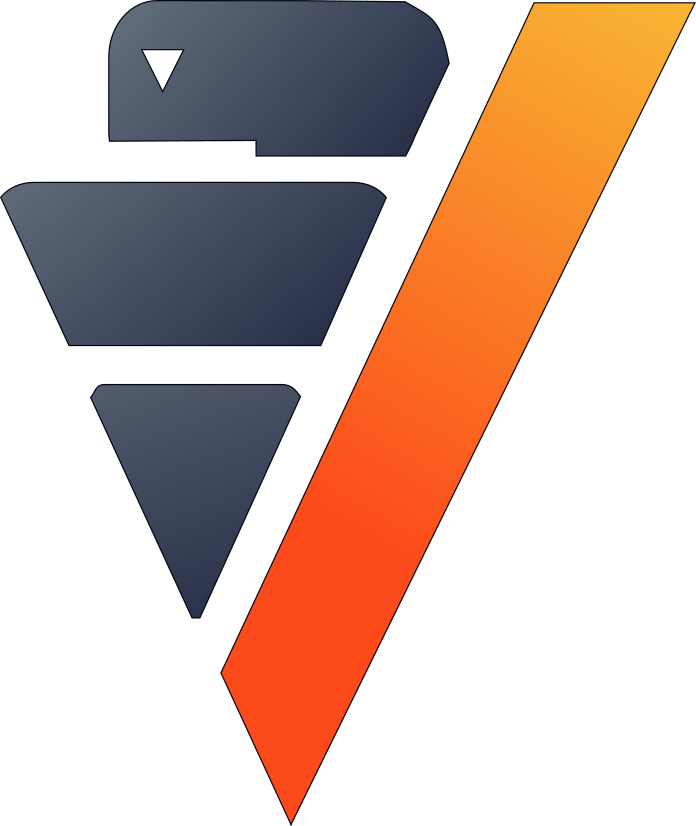

In [119]:
sm_consumption_final = sm_consumption_month.groupby(
                            ["date_month"], 
                            [st.avg(sm_consumption_month["avg_temperature"])._as("avg_temperature"),
                             st.avg(sm_consumption_month["avg_humidity"])._as("avg_humidity"),
                             st.avg(sm_consumption_month["value"])._as("avg_value")])
sm_consumption_final

value  
Dep. Variable                     "avg_value"  
Model                        LinearRegression  
No. Observations                         20.0  
No. Predictors                              2  
R-squared                   0.799113694213533  
Adj. R-squared              0.775480011179831  
F-statistic                 33.81249096905816  
Prob (F-statistic)      3.837253952408389e-07  
Kurtosis                  -0.0457129692472424  
Skewness                    0.893296166786593  
Jarque-Bera (JB)             3.65140760780652  
Rows: 1-11 | Columns: 2
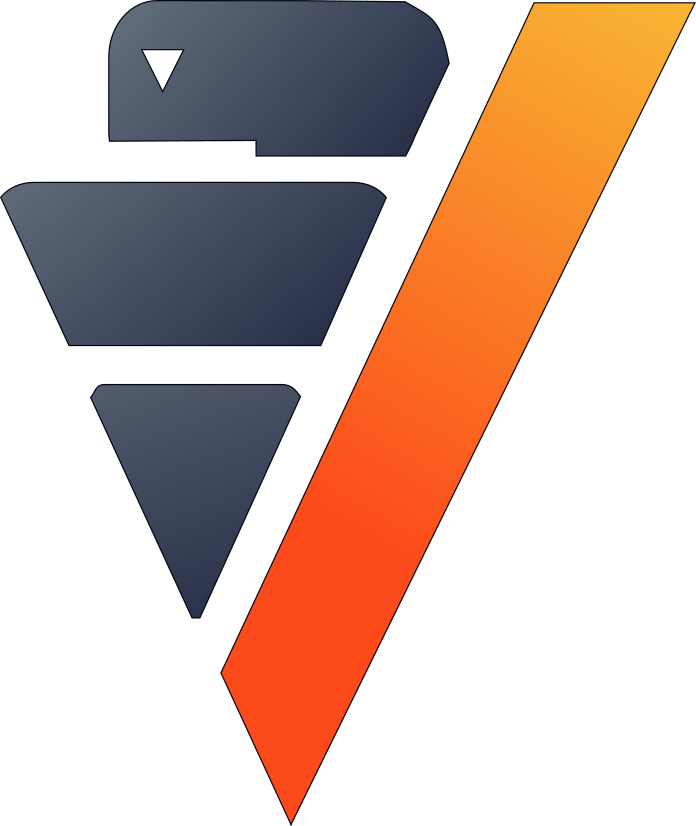

In [120]:
from verticapy.learn.linear_model import LinearRegression

predictors = ["avg_temperature",
              "avg_humidity"]
model = LinearRegression("sm_lr", solver = "BFGS")
model.fit(sm_consumption_final, 
          predictors,
          "avg_value")
model.report("details")

The model seems to be good with an adjusted R2 of 77.5%, and the F-Statistic indicates that at least one of the two predictors is useful. Let's look at the residual plot.

<AxesSubplot:xlabel='"avg_value"', ylabel='"residual"'>

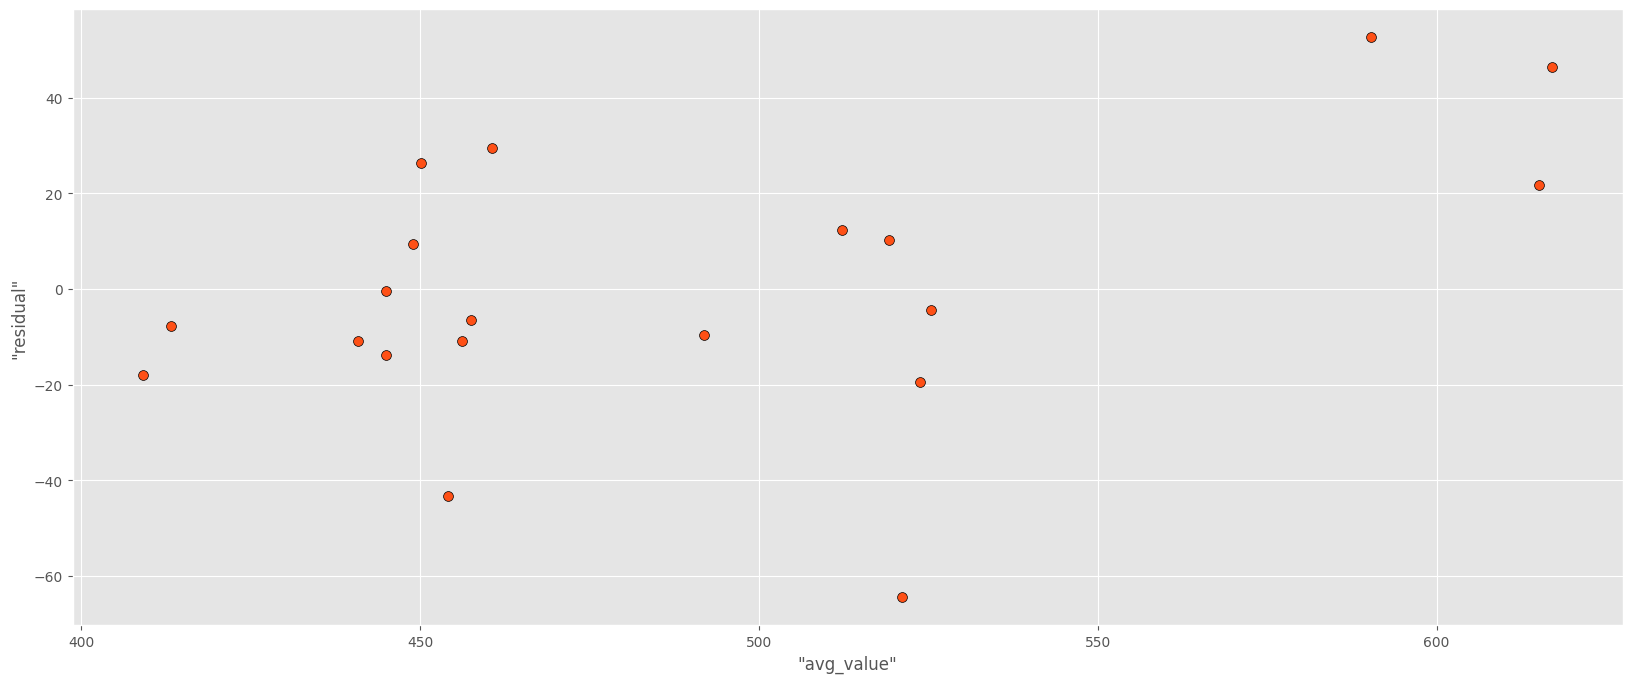

In [121]:
fig, ax = plt.subplots(figsize=(20, 8))
sm_consumption_final = model.predict(sm_consumption_final, 
                                     name = "value_prediction")
sm_consumption_final["residual"] = sm_consumption_final["avg_value"] - sm_consumption_final["value_prediction"]
sm_consumption_final.scatter(["avg_value", "residual"],ax=ax)

Looking at the residual plot, we can see that the error variance varies by quite a bit. A possible suspect might be heteroscidasticity. Let's verify our hypothesis using a Breusch-Pagan test.

value  
Lagrange Multiplier Statistic         6.066154825831241  
lm_p_value                          0.04816717950866987  
F Value                               3.700508752254135  
f_p_value                          0.046328514143879736  
Rows: 1-4 | Columns: 2
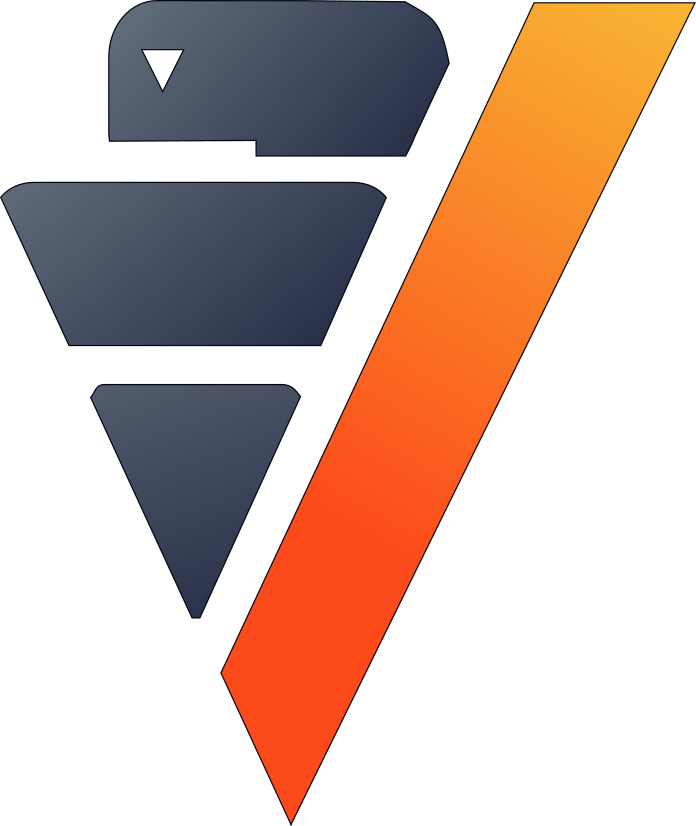

In [122]:
from verticapy.stats import het_breuschpagan

het_breuschpagan(sm_consumption_final, "residual", predictors)

The p-value is 4.81% and sits around the 5% threshold, so we can't really draw any conclusions.

Let's look at the entire regression report.

value  
explained_variance            0.799113694213527  
max_error                      64.4503700445747  
median_absolute_error          13.1054316247273  
mean_absolute_error            20.9034976459432  
mean_squared_error             734.332594600879  
root_mean_squared_error      27.098571818471893  
r2                            0.799113694213533  
r2_adj                        0.775480011179831  
aic                           139.4792410428619  
bic                          140.96643786352388  
Rows: 1-10 | Columns: 2
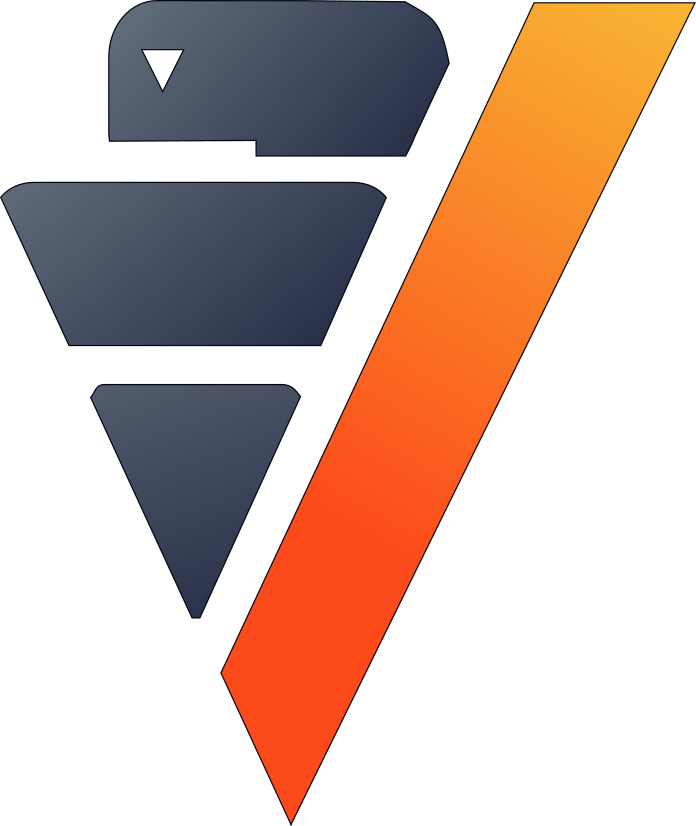

In [123]:
model.report()

Our model is very good; its median absolute error is around 13kWh.

## Time Series
Time series models are a type of regression on a dataset with a timestamp label.

ActivityPeriod               OperatingAirline    OperatingAirlineIATACode   \\
1              200507                   ATA Airlines                          TZ   \\
2              200507                   ATA Airlines                          TZ   \\
3              200507                   ATA Airlines                          TZ   \\
4              200507                   ATA Airlines                          TZ   \\
5              200507                   ATA Airlines                          TZ   \\
6              200507                   ATA Airlines                          TZ   \\
7              200507                     Air Canada                          AC   \\
8              200507                     Air Canada                          AC   \\
9              200507                     Air Canada                          AC   \\
10             200507                     Air Canada                          AC   \\
11             200507                      Air China                          CA   \\
12             200507                      Air China                          CA   \\
13             200507                      Air China                          CA   \\
14             200507                      Air China                          CA   \\
15             200507                     Air France                          AF   \\
16             200507                     Air France                          AF   \\
17             200507                     Air France                          AF   \\
18             200507                     Air France                          AF   \\
19             200507                Air New Zealand                          NZ   \\
20             200507                Air New Zealand                          NZ   \\
21             200507                Air New Zealand                          NZ   \\
22             200507                Air New Zealand                          NZ   \\
23             200507                AirTran Airways                          FL   \\
24             200507                AirTran Airways                          FL   \\
25             200507                AirTran Airways                          FL   \\
26             200507                AirTran Airways                          FL   \\
27             200507                Alaska Airlines                          AS   \\
28             200507                Alaska Airlines                          AS   \\
29             200507                Alaska Airlines                          AS   \\
30             200507                Alaska Airlines                          AS   \\
31             200507                Alaska Airlines                          AS   \\
32             200507                Alaska Airlines                          AS   \\
33             200507                Alaska Airlines                          AS   \\
34             200507                Alaska Airlines                          AS   \\
35             200507                Alaska Airlines                          AS   \\
36             200507                Alaska Airlines                          AS   \\
37             200507                Alaska Airlines                          AS   \\
38             200507                Alaska Airlines                          AS   \\
39             200507                Alaska Airlines                          AS   \\
40             200507                Alaska Airlines                          AS   \\
41             200507                Alaska Airlines                          AS   \\
42             200507                Alaska Airlines                          AS   \\
43             200507             All Nippon Airways                          NH   \\
44             200507             All Nippon Airways                          NH   \\
45             200507             All Nippon Airways                          NH   \\
46             200507             All Nippon Airway
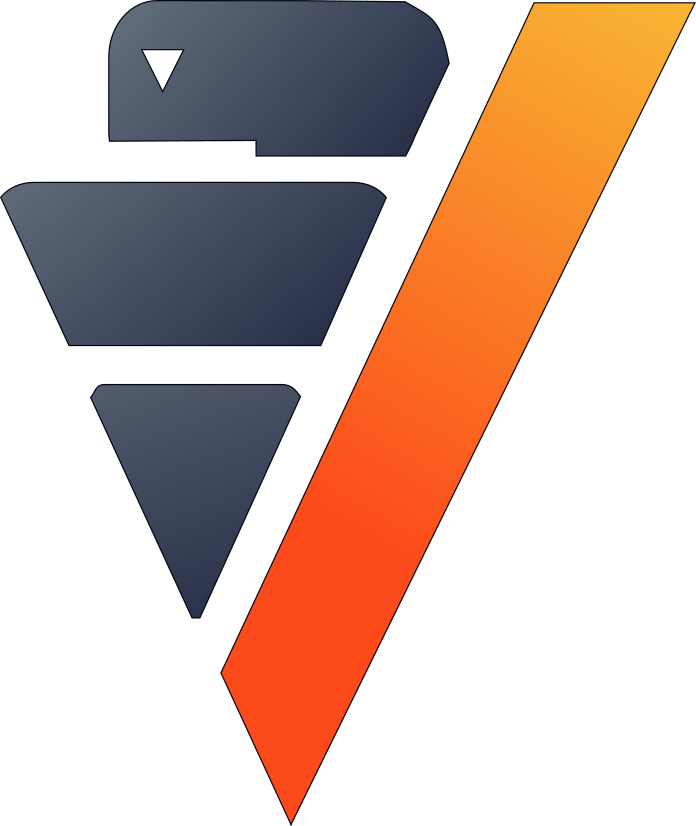

In [150]:
air_traffic = vp.vDataFrame('public.air_traffic')
air_traffic

count    percent  
"ActivityPeriod"                39926.0      100.0  
"OperatingAirline"              39926.0      100.0  
"PublishedAirline"              39926.0      100.0  
"GEOSummary"                    39926.0      100.0  
"GEORegion"                     39926.0      100.0  
"ActivityTypeCode"              39926.0      100.0  
"PriceCategoryCode"             39926.0      100.0  
"Terminal"                      39926.0      100.0  
"BoardingArea"                  39926.0      100.0  
"PassengerCount"                39926.0      100.0  
"OperatingAirlineIATACode"      39800.0     99.684  
"PublishedAirlineIATACode"      39800.0     99.684  
Rows: 1-12 | Columns: 3
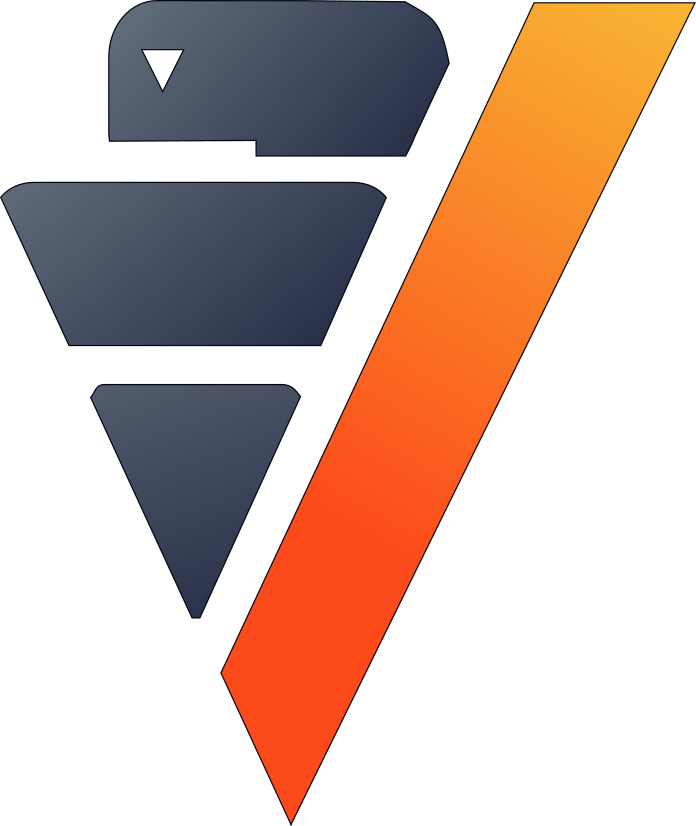

In [151]:
air_traffic.count_percent()

In [152]:
mindt= air_traffic["ActivityPeriod"].min()
print("First Date: " , mindt)
maxdt = air_traffic["ActivityPeriod"].max()
print("Last Date: " , maxdt)

First Date:  200507.0
Last Date:  201901.0


In [153]:
air_traffic_agg = air_traffic.groupby(
                    columns = ["ActivityPeriod"],
                    expr = [(st.sum(air_traffic["PassengerCount"])/1000)._as("TotPassengerCount")])

count    percent  
"ActivityPeriod"         163.0      100.0  
"TotPassengerCount"      163.0      100.0  
Rows: 1-2 | Columns: 3
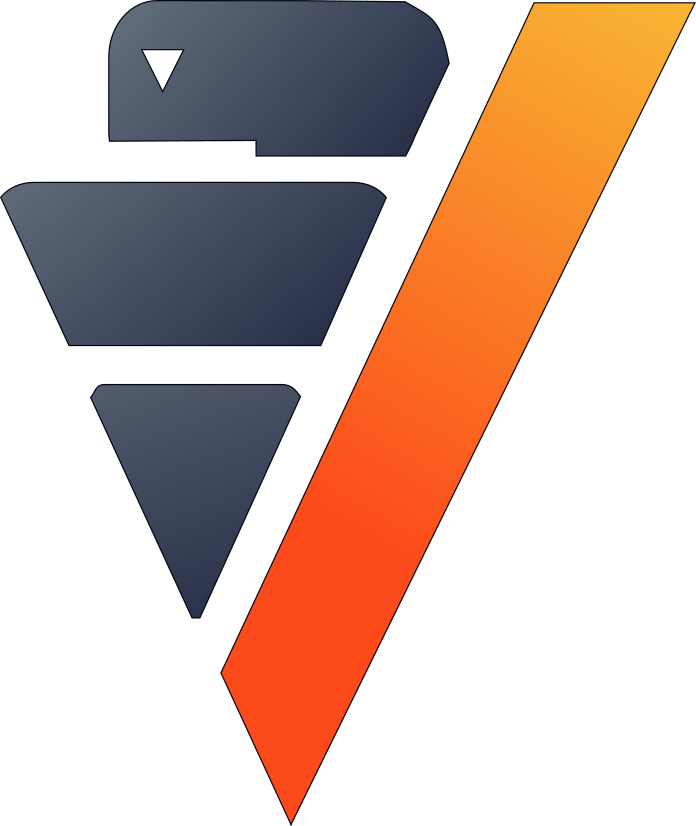

In [129]:
air_traffic_agg.count_percent()

ActivityPeriod    TotPassengerCount    DtActivityPeriod  
1              200507             6451.538          2005-07-01  
2              200508             6391.732          2005-08-01  
3              200509             5481.106          2005-09-01  
4              200510              5541.43          2005-10-01  
5              200511             5234.666          2005-11-01  
6              200512             5343.594          2005-12-01  
7              200601             4897.778          2006-01-01  
8              200602             4446.048          2006-02-01  
9              200603             5417.556          2006-03-01  
10             200604             5546.586          2006-04-01  
11             200605               5658.0          2006-05-01  
12             200606             6142.792          2006-06-01  
13             200607              6455.21          2006-07-01  
14             200608             6287.678          2006-08-01  
15             200609               5440.2          2006-09-01  
16             200610             5669.918          2006-10-01  
17             200611             5307.774          2006-11-01  
18             200612               5396.4          2006-12-01  
19             200701              5014.86          2007-01-01  
20             200702              4609.98          2007-02-01  
21             200703              5640.17          2007-03-01  
22             200704             5738.494          2007-04-01  
23             200705             6113.868          2007-05-01  
24             200706             6527.242          2007-06-01  
25             200707             6764.764          2007-07-01  
26             200708             6872.834          2007-08-01  
27             200709              5915.06          2007-09-01  
28             200710             6258.618          2007-10-01  
29             200711               5845.0          2007-11-01  
30             200712             5807.274          2007-12-01  
31             200801             5340.106          2008-01-01  
32             200802             5191.352          2008-02-01  
33             200803             6254.774          2008-03-01  
34             200804             6058.042          2008-04-01  
35             200805             6611.908          2008-05-01  
36             200806             6907.502          2008-06-01  
37             200807             7207.892          2008-07-01  
38             200808             7224.594          2008-08-01  
39             200809              6009.44          2008-09-01  
40             200810             6248.902          2008-10-01  
41             200811              5488.97          2008-11-01  
42             200812             5925.874          2008-12-01  
43             200901             5289.078          2009-01-01  
44             200902               4719.6          2009-02-01  
45             200903             5851.836          2009-03-01  
46             200904             6049.946          2009-04-01  
47             200905               6354.2          2009-05-01  
48             200906              6839.19          2009-06-01  
49             200907             7299.404          2009-07-01  
50             200908             7301.336          2009-08-01  
51             200909             6383.052          2009-09-01  
52             200910             6498.856          2009-10-01  
53             200911             5942.968          2009-11-01  
54             200912             6148.418          2009-12-01  
55             201001             5570.932          2010-01-01  
56             201002             5030.722          2010-02-01  
57             201003             6211.916          2010-03-01  
58             201004             6278.118          2010-04-01  
59             201005              6760.71          2010-05-01  
60             201006             7225.772          2010-06-01  
61             201007             7531.648
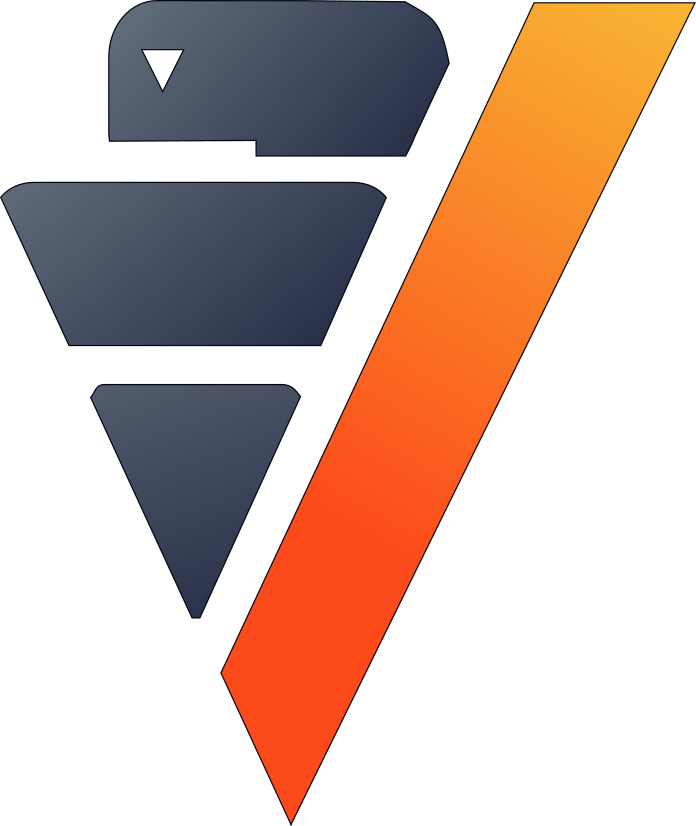

In [130]:
air_traffic_agg.eval(name = "DtActivityPeriod", 
             expr = "(ActivityPeriod::varchar(8)||'01')::date")

<AxesSubplot:xlabel='"DtActivityPeriod"', ylabel='"TotPassengerCount"'>

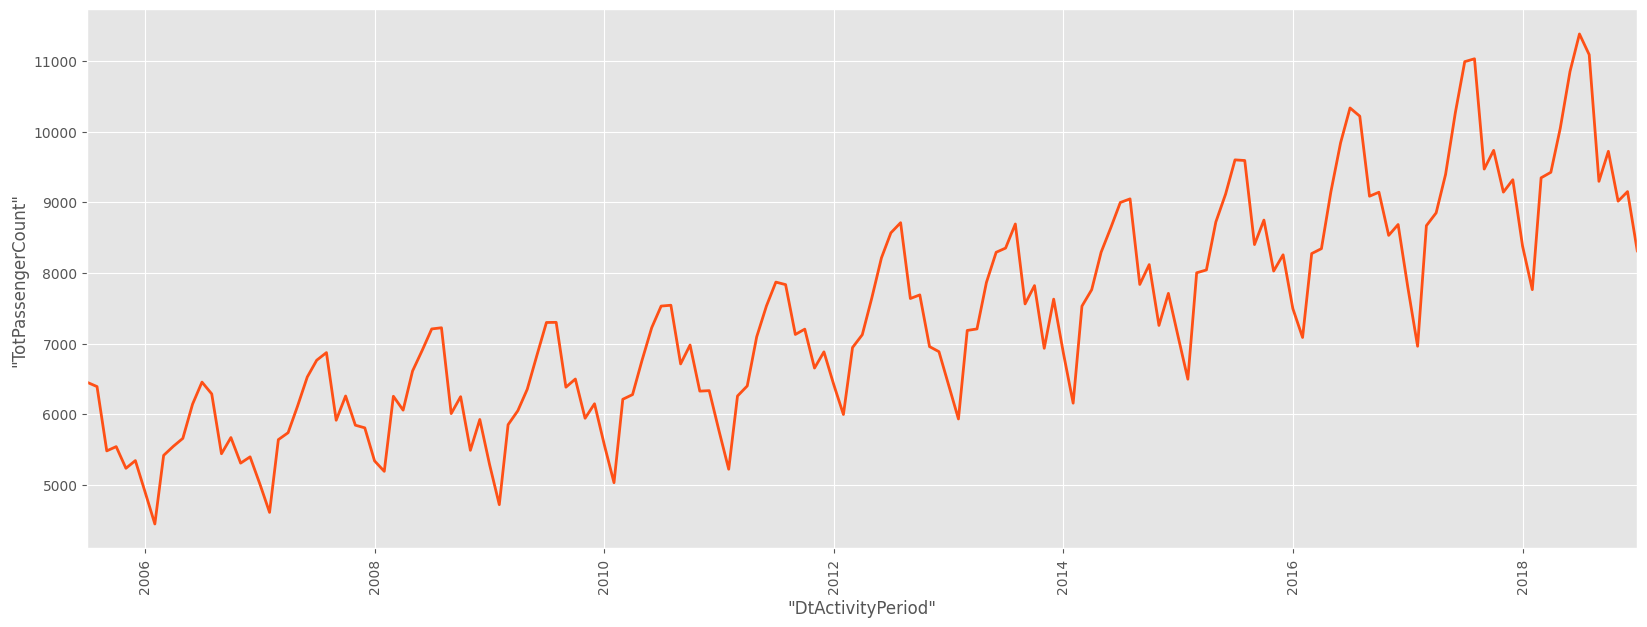

In [131]:
fig, ax = plt.subplots(figsize=(20, 7))
air_traffic_agg["TotPassengerCount"].plot(ts = "DtActivityPeriod", ax=ax)

  0%|          | 0/49 [00:00<?, ?it/s]

value             confidence  
0                           1.0    0.15351622724910327  
1             0.911302689988447     0.2511935871740616  
2            0.0354136219821969    0.25209121255003536  
3            -0.191774920281698     0.2563457883957675  
4           -0.0923575615825185    0.25795081173980344  
5              0.14222457754155     0.2606594550553723  
6           -0.0344140674093717     0.2615990591115186  
7             0.748913873480836     0.3106370825334493  
8             0.165113880100747     0.3137981496152289  
9             0.382325026852177    0.32619180986169943  
10            0.122159414595336     0.3283989731890481  
11            0.479171659562128    0.34664235781507985  
12            0.693492532169172    0.38134843188693157  
13           -0.658441929244004     0.4106118773955374  
14           -0.168081226920923    0.41375161534604726  
15          -0.0863701646252875     0.4156132114852969  
16           0.0178305565582563    0.41704438801442917  
17            0.281729858601358    0.42343128299553345  
18           0.0326093194095721     0.4249551803853177  
19          -0.0424088223039028    0.42654066388321743  
20            0.262462064782583    0.43233119189248026  
21          -0.0149793291477631     0.4338648050077945  
22            0.200549897503549    0.43791009114162127  
23           0.0751128825340342     0.4398233944027212  
24            0.146368426174094     0.4427419730549587  
25           -0.210408422490783     0.4471080913758205  
26           -0.103405145305588     0.4494045501778677  
27           0.0920787364263256     0.4515843773393914  
28          -0.0192247989477156     0.4532770286302537  
29            0.182415193118917     0.4570571026599044  
30         0.000766887820537529     0.4587721817444762  
31           -0.149683203163898    0.46192040588765126  
32             0.12266734481844    0.46463075625489414  
33           -0.085755720278257    0.46688005712391073  
34          0.00225108177675352     0.4686864982382986  
35            0.309528961367006    0.47658562385499087  
36            0.122900295069391    0.47941220714793426  
37           -0.139172720648557     0.4825362142883714  
38          -0.0312225379622275     0.4845243492650196  
39           0.0052005249684944    0.48647587561508665  
40          -0.0844816696190622    0.48890555201863667  
41            0.144978337223114     0.4922514988703369  
42            0.110242278072663    0.49506140295404816  
43          -0.0192094044489777     0.4971436405611881  
44            0.197740054444702     0.5017501024930008  
45            0.120908361537255     0.5048153040190512  
46            0.276029349691738     0.5118787280450272  
47           0.0199396091111351     0.5141059783260846  
48            0.209795248461784     0.5191760302874876  
Rows: 1-49 | Columns: 3
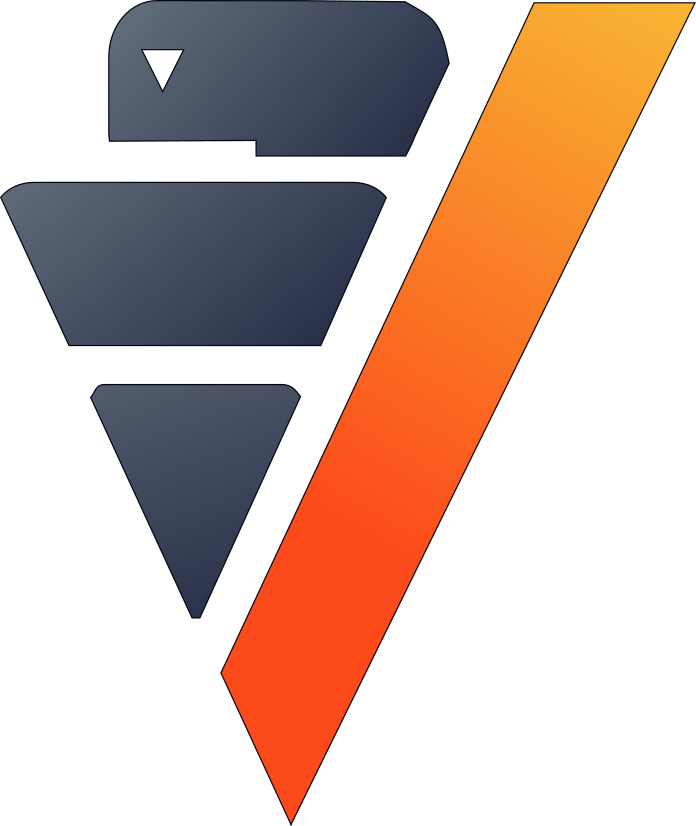

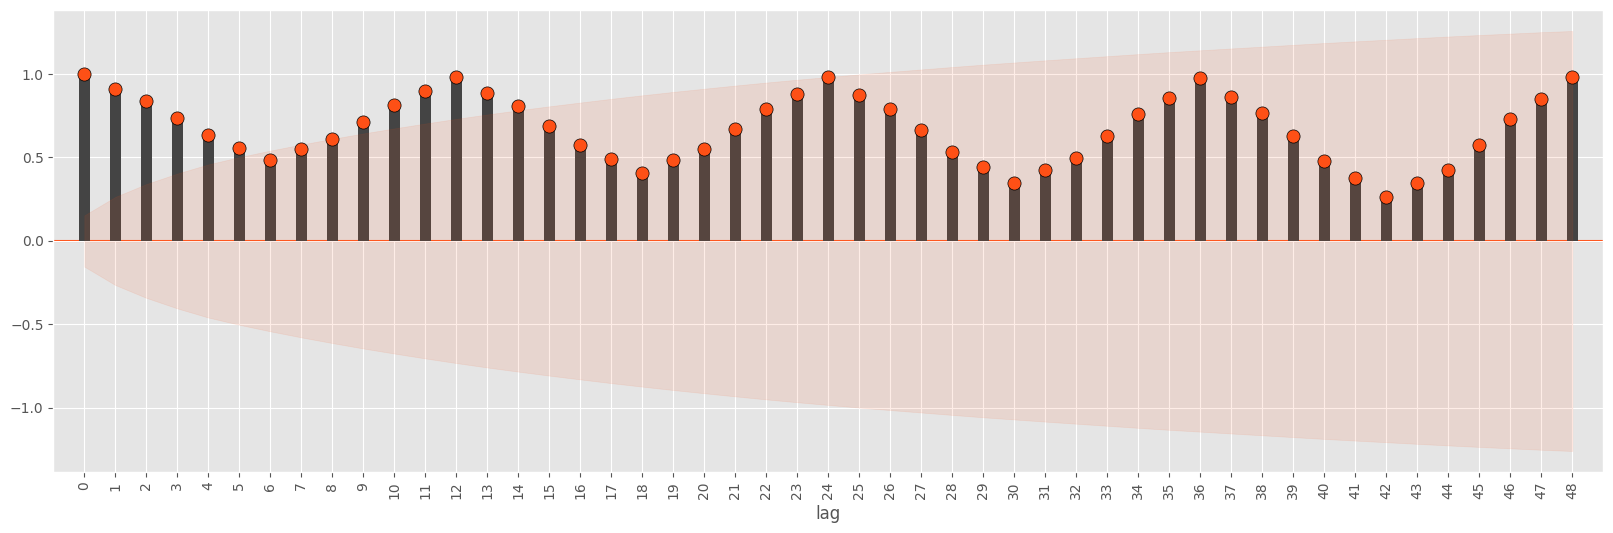

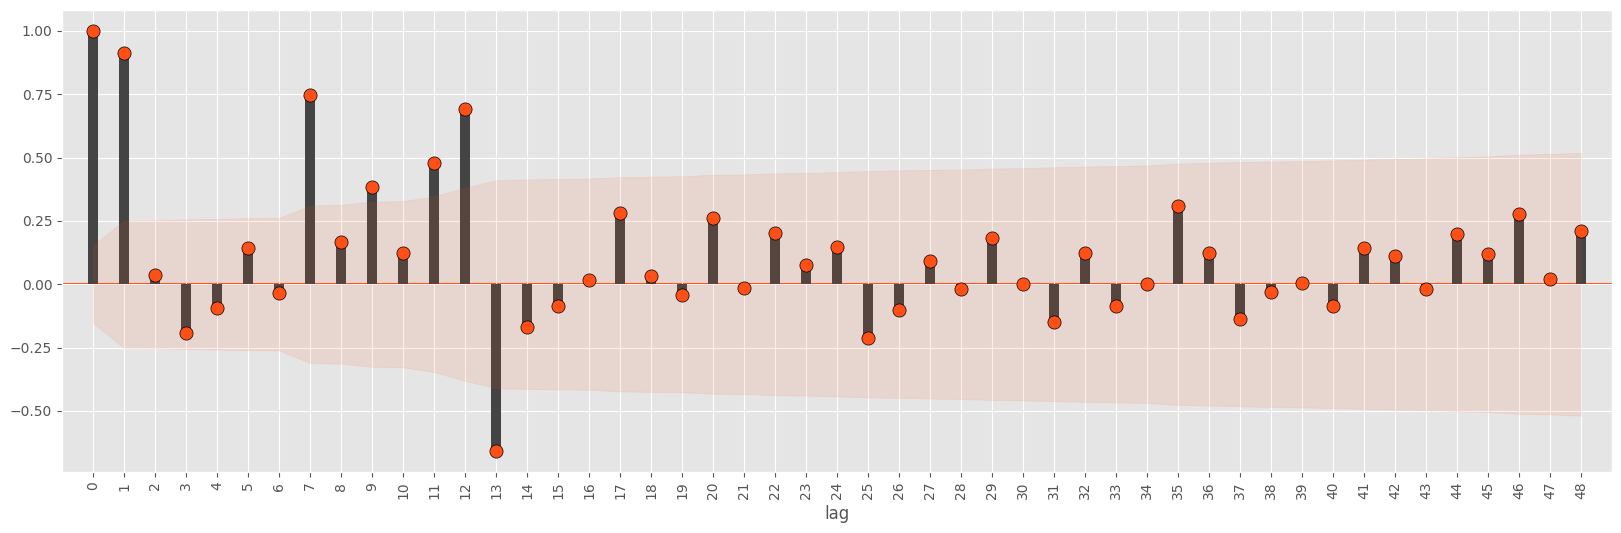

In [132]:
fig, ax = plt.subplots(figsize=(20, 6))
air_traffic_agg.acf(ts = "DtActivityPeriod", 
           column = "TotPassengerCount",
           p = 48, ax=ax)
fig, ax = plt.subplots(figsize=(20, 6))
air_traffic_agg.pacf(ts = "DtActivityPeriod", 
            column = "TotPassengerCount",
            p = 48, ax=ax)

value  
ADF Test Statistic             0.5386086163347139  
p_value                          0.59103743811115  
# Lags used                                    12  
# Observations Used                           163  
Critical Value (1%)                         -3.46  
Critical Value (2.5%)                       -3.14  
Critical Value (5%)                         -2.88  
Critical Value (10%)                        -2.57  
Stationarity (alpha = 1%)                   False  
Rows: 1-9 | Columns: 2
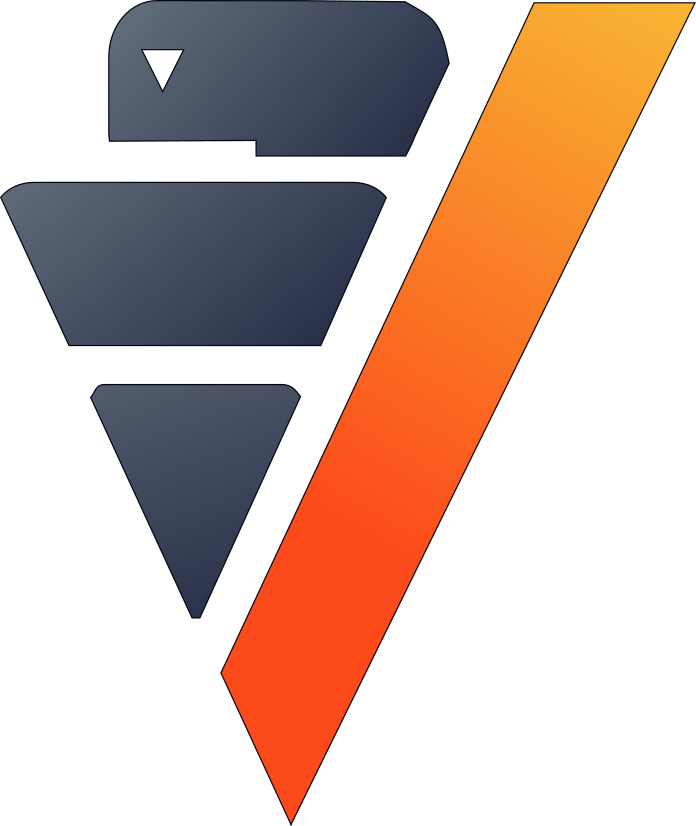

In [133]:
from verticapy.stats import adfuller
adfuller(air_traffic_agg,
         column = "TotPassengerCount",
         ts = "DtActivityPeriod",
         p = 12,
         with_trend = False)

In [134]:
from verticapy.stats import seasonal_decompose

decomposition = seasonal_decompose(air_traffic_agg, 
                                   "TotPassengerCount", 
                                   "DtActivityPeriod",
                                   polynomial_order = 2,
                                   mult = True,
                                  estimate_seasonality = False,
                                  period=12)

<AxesSubplot:xlabel='"DtActivityPeriod"', ylabel='"TotPassengerCount_epsilon"'>

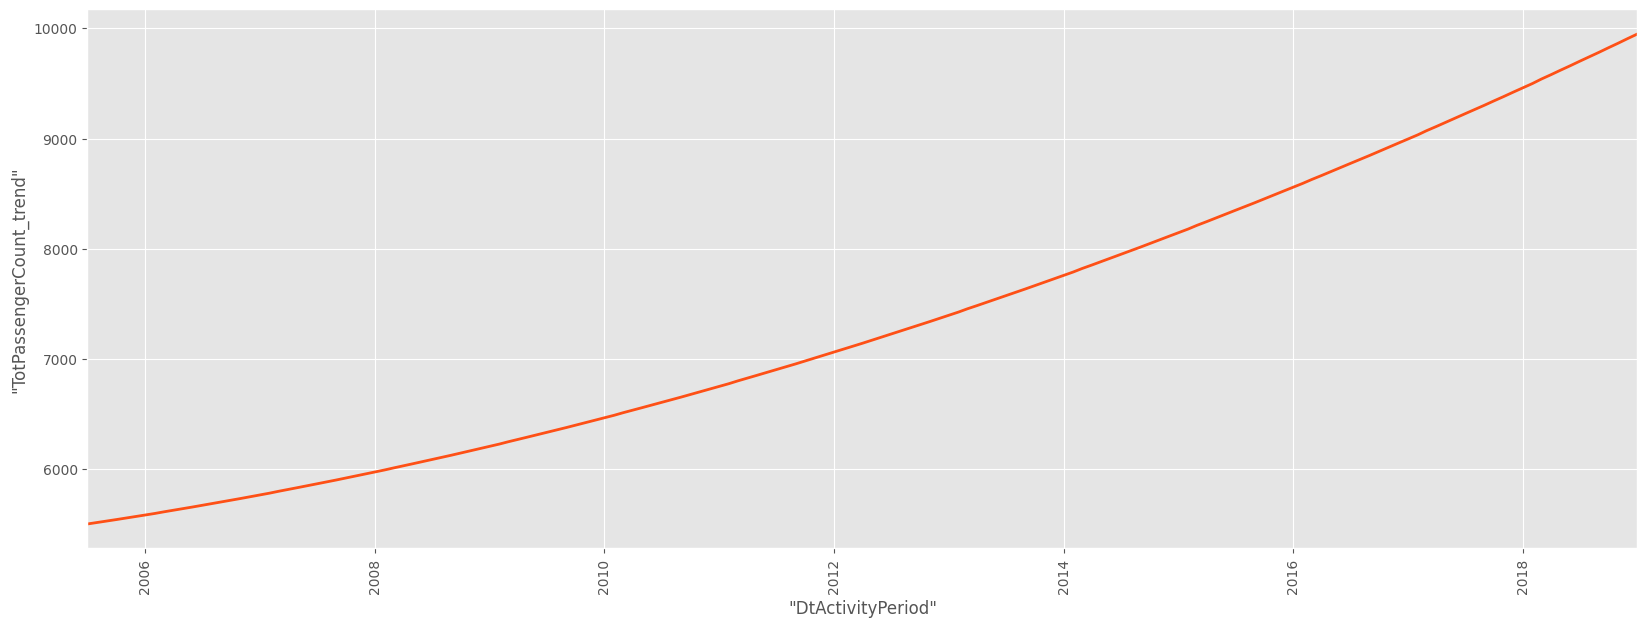

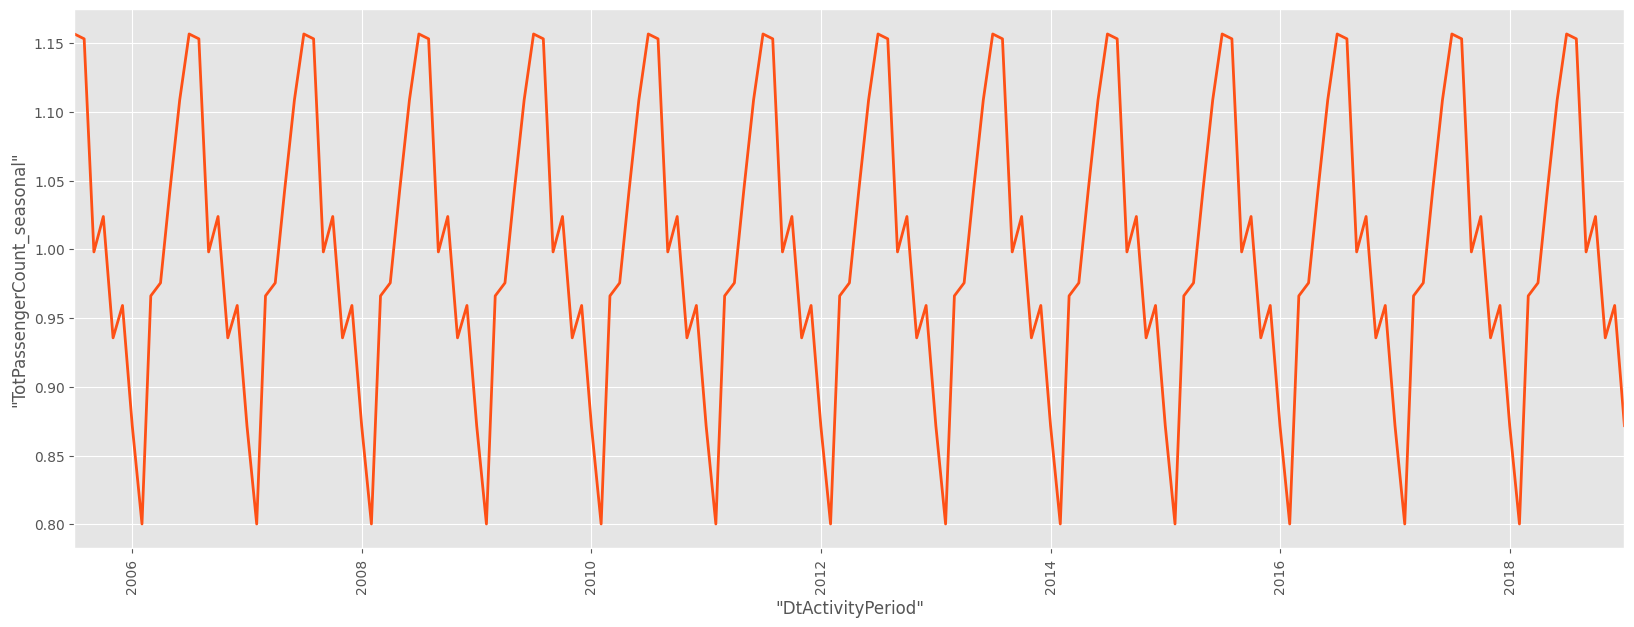

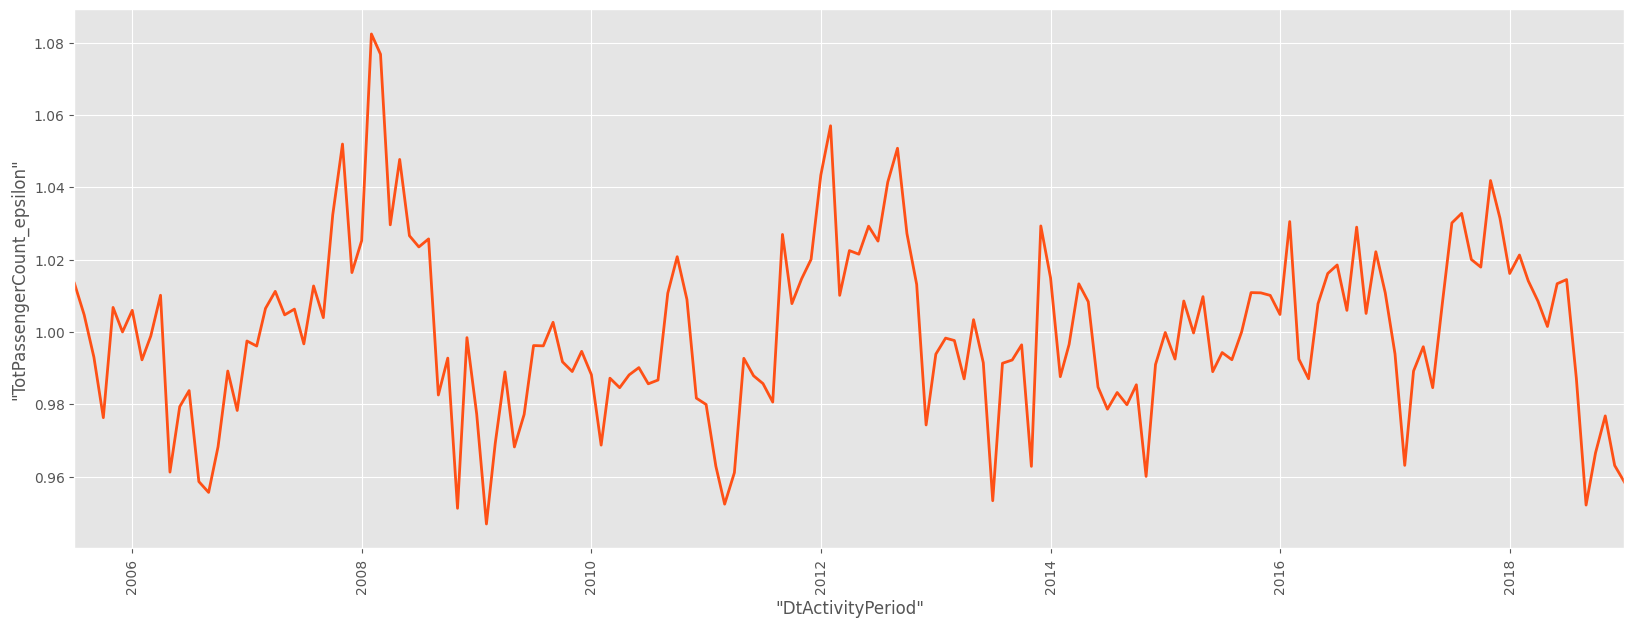

In [135]:
fig, ax = plt.subplots(figsize=(20, 7))
decomposition["TotPassengerCount_trend"].plot(ts = "DtActivityPeriod", ax=ax)
fig, ax = plt.subplots(figsize=(20, 7))
decomposition["TotPassengerCount_seasonal"].plot(ts = "DtActivityPeriod", ax=ax)
fig, ax = plt.subplots(figsize=(20, 7))
decomposition["TotPassengerCount_epsilon"].plot(ts = "DtActivityPeriod", ax=ax)

value  
ADF Test Statistic               -3.542214041816646  
p_value                        0.000544113444048906  
# Lags used                                      12  
# Observations Used                             163  
Critical Value (1%)                           -3.46  
Critical Value (2.5%)                         -3.14  
Critical Value (5%)                           -2.88  
Critical Value (10%)                          -2.57  
Stationarity (alpha = 1%)                      True  
Rows: 1-9 | Columns: 2
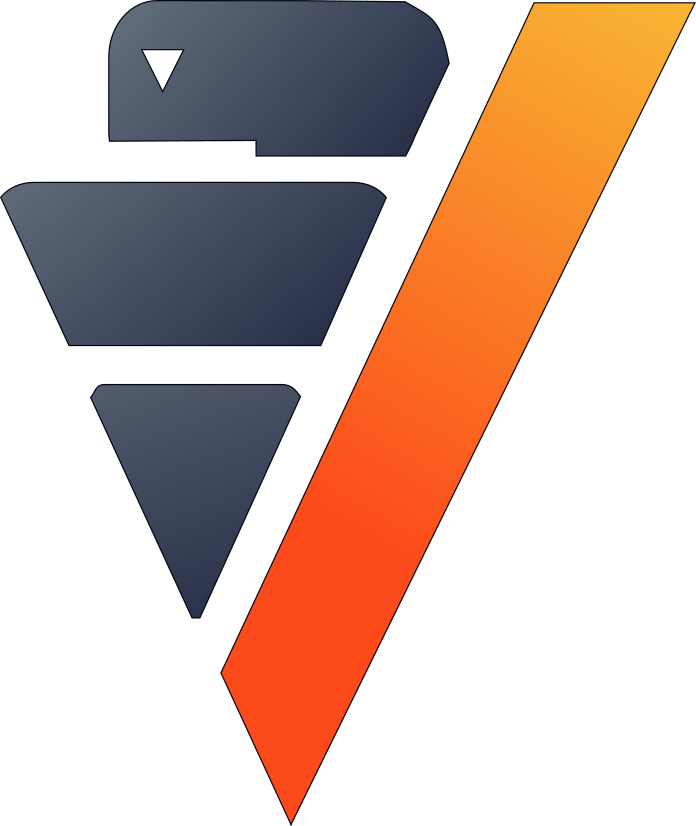

In [136]:
# Fuller test for the noise signal
adfuller(decomposition,
         column = "TotPassengerCount_epsilon",
         ts = "DtActivityPeriod",
         p = 12,
         with_trend = False)

The idea is to model each component with a different model. The trend and the seasonal component models are automatically created by the function seasonal_decompose, so we can focus on the noise part.

Using auto-correlation and partial auto-correlation plots we can try to understand which model to use.

  0%|          | 0/25 [00:00<?, ?it/s]

value             confidence  
0                          1.0    0.15351622724910327  
1            0.660497765672549     0.2107187540389634  
2            0.117004675184453    0.21291189645562167  
3            0.183271692097754    0.21731925478510125  
4           0.0242417711294721    0.21806669584548635  
5           -0.244136141140844    0.22528267877460548  
6           -0.162398587576384    0.22883650586842477  
7            0.128052071032653    0.23132096064156676  
8           -0.122104938469774    0.23365281243478583  
9           0.0408510578220702    0.23458771542453216  
10          -0.154794277644491    0.23789555942582533  
11         -0.0190958407402566     0.2387154363985117  
12         -0.0344891965786723    0.23963089610920332  
13          -0.013387964386947    0.24044743000679036  
14         -0.0479674432442486    0.24149871020201025  
15          -0.114815413503961    0.24372119507530352  
16          0.0449571971441623    0.24476465752401017  
17          -0.181993538405248    0.24912452622974932  
18         -0.0345062730574835     0.2501082556732703  
19           0.108741544792848    0.25222893333574675  
20         -0.0529662118789695     0.2534068899862184  
21          0.0229597823399544    0.25435367529042674  
22          0.0230059959295341    0.25531053079134897  
23          -0.131347928864071    0.25806168559295223  
24          -0.150568697411881    0.26139630058370344  
Rows: 1-25 | Columns: 3
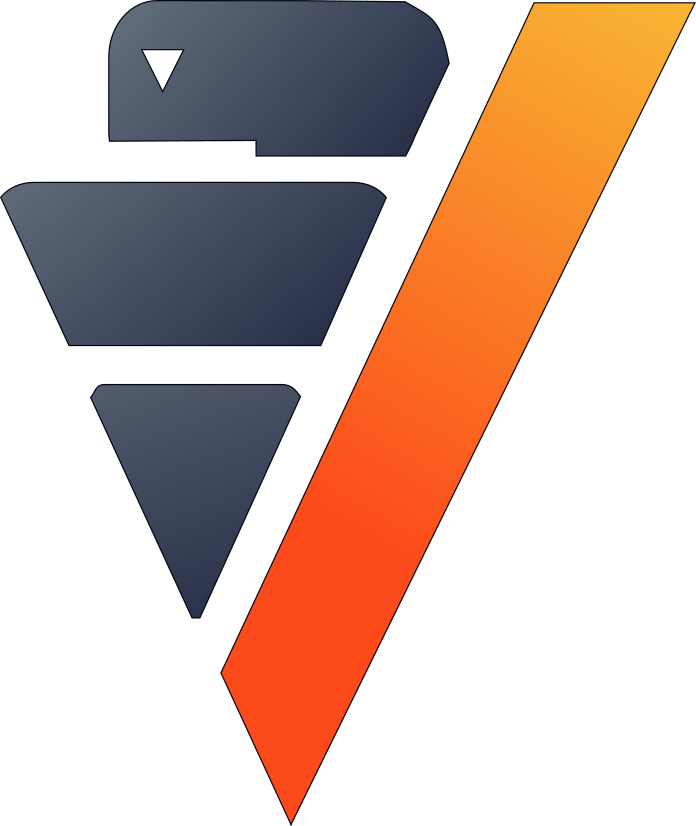

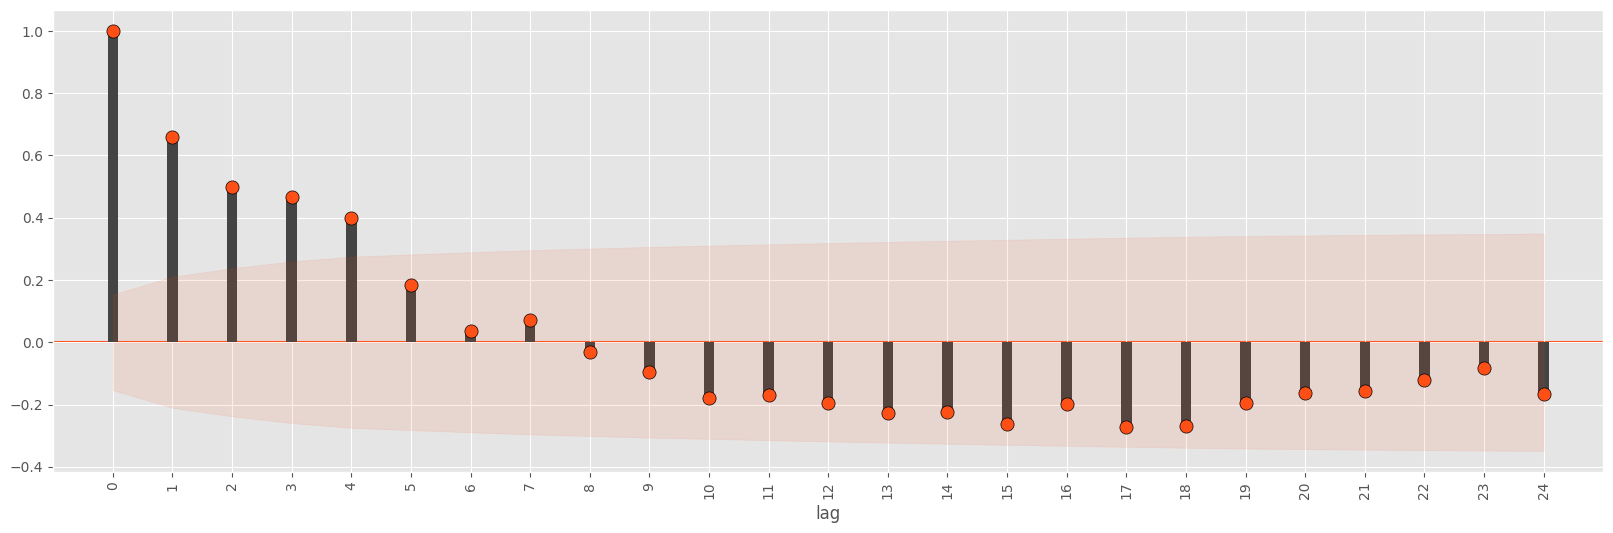

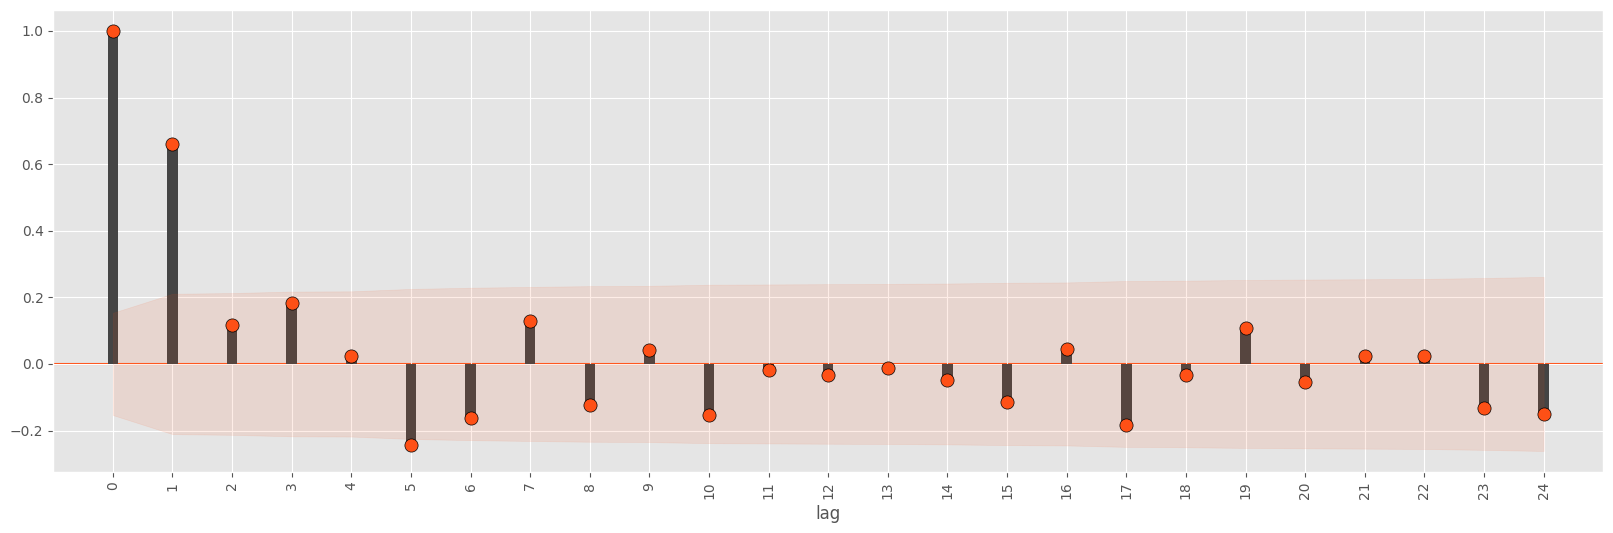

In [137]:
fig, ax = plt.subplots(figsize=(20, 6))
decomposition.acf(ts = "DtActivityPeriod", 
           column = "TotPassengerCount_epsilon",
           p = 24, ax=ax)
fig, ax = plt.subplots(figsize=(20, 6))
decomposition.pacf(ts = "DtActivityPeriod", 
            column = "TotPassengerCount_epsilon",
            p = 24, ax=ax)

Autocorrelation drops slowly while partial autocorrelation has only 1 significant value at lag 1. So we can try using an AR(1) model.

First we create a lagged version of the response variable.

In [138]:
decomposition["lag_TotPassengerCount_epsilon"] = st.lag(decomposition["TotPassengerCount_epsilon"], 1)._over(
                                                                    order_by = [decomposition["DtActivityPeriod"]])

Then we can use a linear regression to implement an AR(1)

In [139]:
model = LinearRegression(name = "LR_airpassenger_noise")

model.drop()
model.fit(decomposition, ["lag_TotPassengerCount_epsilon"], "TotPassengerCount_epsilon")



details
          predictor          |coefficient|std_err |t_value |p_value 
-----------------------------+-----------+--------+--------+--------
          Intercept          |  0.33369  | 0.05989| 5.57181| 0.00000
lag_totpassengercount_epsilon|  0.66605  | 0.05986|11.12732| 0.00000


regularization
type| lambda 
----+--------
none| 1.00000


call_string
linear_reg('public.LR_airpassenger_noise', '"public"."_verticapy_tmp_view_dbadmin_38231_4642680911_"', '"totpassengercount_epsilon"', '"lag_TotPassengerCount_epsilon"'
USING PARAMETERS optimizer='newton', epsilon=1e-06, max_iterations=100, regularization='none', lambda=1, alpha=0.5, fit_intercept=true)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  1  
rejected_row_count|  1  
accepted_row_count| 162 

value  
explained_variance              0.436257298458856  
max_error                      0.0658789192504967  
median_absolute_error          0.0104351769161943  
mean_absolute_error            0.0136792677170731  
mean_squared_error           0.000325015207547915  
root_mean_squared_error      0.018028178153876643  
r2                              0.436257298457734  
r2_adj                        0.43273390657309485  
aic                           -1297.0499789542985  
bic                           -1290.9502579819468  
Rows: 1-10 | Columns: 2
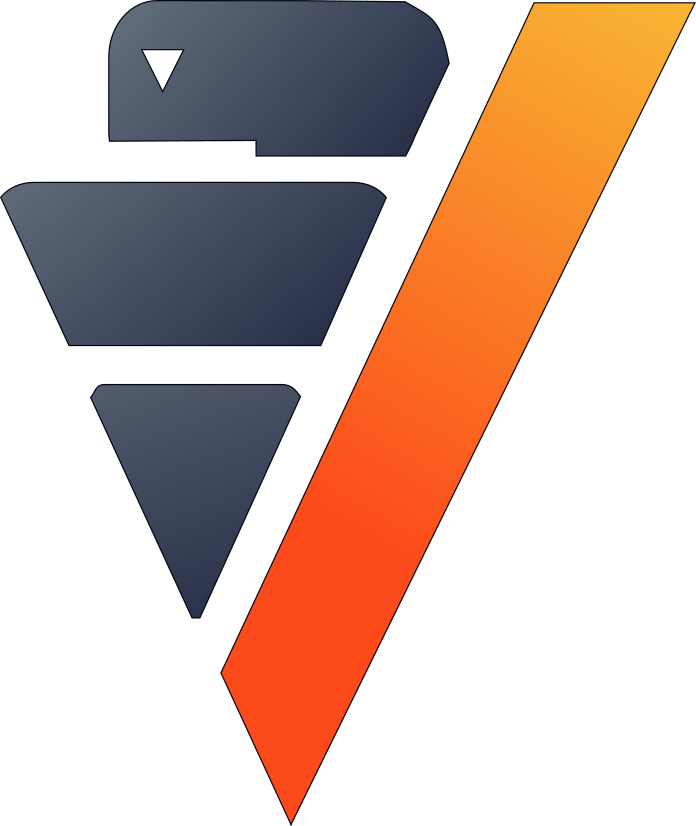

In [140]:
model.regression_report()

DtActivityPeriod    TotPassengerCount    TotPassengerCount_trend   \\
1            2005-07-01             6451.538           5503.35911280998   \\
2            2005-08-01             6391.732           5516.48962789851   \\
3            2005-09-01             5481.106           5529.79799258348   \\
4            2005-10-01              5541.43           5543.28420686489   \\
5            2005-11-01             5234.666           5556.94827074273   \\
6            2005-12-01             5343.594           5570.79018421699   \\
7            2006-01-01             4897.778            5584.8099472877   \\
8            2006-02-01             4446.048           5599.00755995483   \\
9            2006-03-01             5417.556            5613.3830222184   \\
10           2006-04-01             5546.586            5627.9363340784   \\
11           2006-05-01               5658.0           5642.66749553483   \\
12           2006-06-01             6142.792            5657.5765065877   \\
13           2006-07-01              6455.21             5672.663367237   \\
14           2006-08-01             6287.678           5687.92807748273   \\
15           2006-09-01               5440.2           5703.37063732489   \\
16           2006-10-01             5669.918           5718.99104676349   \\
17           2006-11-01             5307.774           5734.78930579852   \\
18           2006-12-01               5396.4           5750.76541442998   \\
19           2007-01-01              5014.86           5766.91937265788   \\
20           2007-02-01              4609.98           5783.25118048221   \\
21           2007-03-01              5640.17           5799.76083790297   \\
22           2007-04-01             5738.494           5816.44834492016   \\
23           2007-05-01             6113.868           5833.31370153379   \\
24           2007-06-01             6527.242           5850.35690774385   \\
25           2007-07-01             6764.764           5867.57796355034   \\
26           2007-08-01             6872.834           5884.97686895326   \\
27           2007-09-01              5915.06           5902.55362395262   \\
28           2007-10-01             6258.618           5920.30822854841   \\
29           2007-11-01               5845.0           5938.24068274063   \\
30           2007-12-01             5807.274           5956.35098652929   \\
31           2008-01-01             5340.106           5974.63913991438   \\
32           2008-02-01             5191.352            5993.1051428959   \\
33           2008-03-01             6254.774           6011.74899547385   \\
34           2008-04-01             6058.042           6030.57069764824   \\
35           2008-05-01             6611.908           6049.57024941906   \\
36           2008-06-01             6907.502           6068.74765078631   \\
37           2008-07-01             7207.892              6088.10290175   \\
38           2008-08-01             7224.594           6107.63600231012   \\
39           2008-09-01              6009.44           6127.34695246667   \\
40           2008-10-01             6248.902           6147.23575221965   \\
41           2008-11-01              5488.97           6167.30240156907   \\
42           2008-12-01             5925.874           6187.54690051492   \\
43           2009-01-01             5289.078            6207.9692490572   \\
44           2009-02-01               4719.6           6228.56944719591   \\
45           2009-03-01             5851.836           6249.34749493106   \\
46           2009-04-01             6049.946           6270.30339226264   \\
47           2009-05-01               6354.2           6291.43713919065   \\
48           2009-06-01              6839.19            6312.7487357151   \\
49           2009-07-01             7299.404           6334.23818183598   \\
50           2009-08-01             7301.336           6355.90547755329   \\
51           2009-09-01             6383.052           6377.75062286703   \\
52 
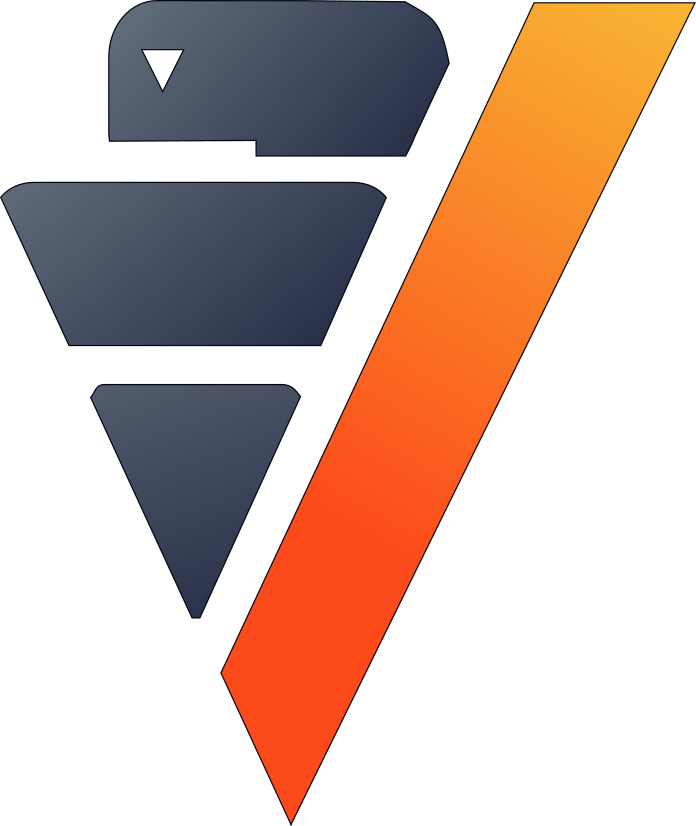

In [141]:
model.predict(decomposition, 
              X = ["lag_TotPassengerCount_epsilon"],
              name = "airpass_prediction_noise")

<AxesSubplot:xlabel='"DtActivityPeriod"'>

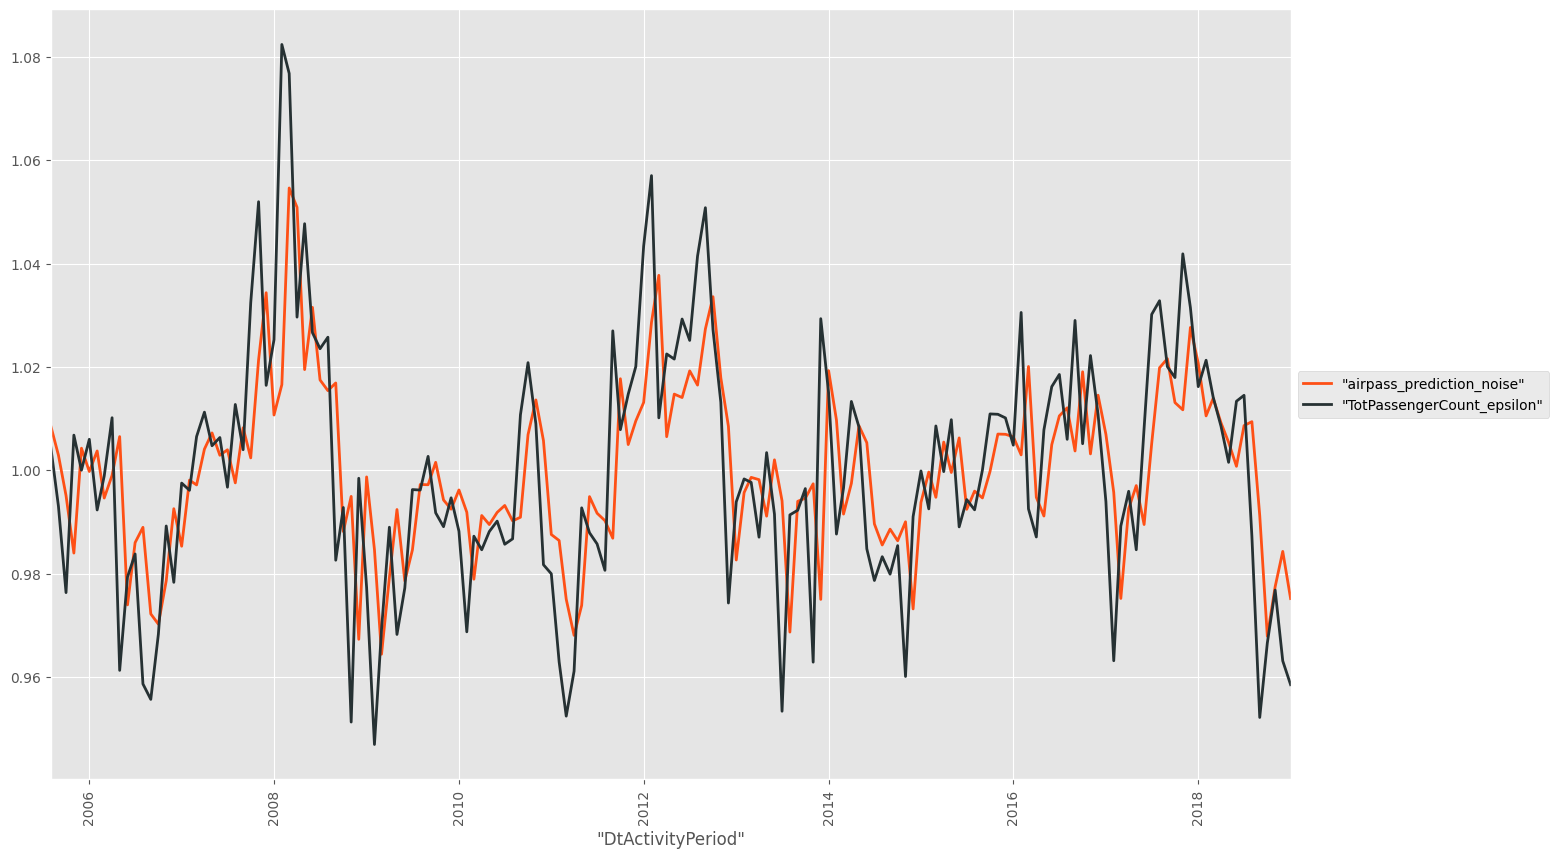

In [142]:
fig, ax = plt.subplots(figsize=(20, 10))
decomposition.plot(ts = "DtActivityPeriod",
                     columns= ["airpass_prediction_noise", "TotPassengerCount_epsilon"],
                     ax=ax)

<AxesSubplot:xlabel='"DtActivityPeriod"', ylabel='"res"'>

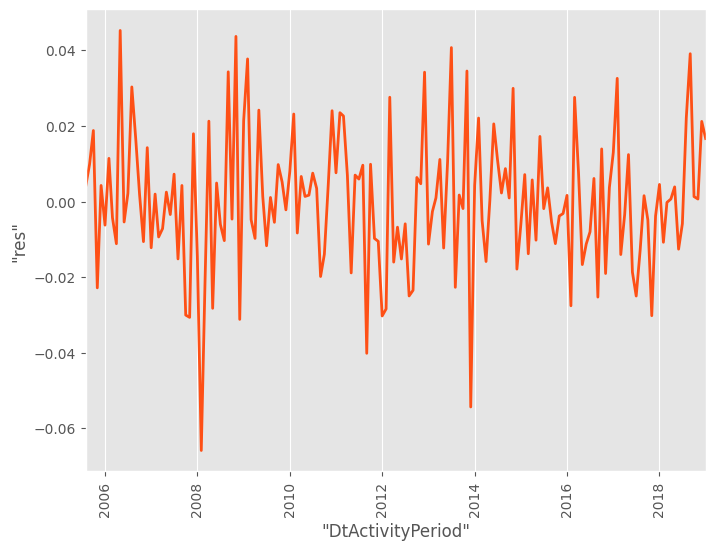

In [143]:
decomposition["res"] = decomposition["airpass_prediction_noise"] - decomposition["TotPassengerCount_epsilon"] 
decomposition.plot(ts = "DtActivityPeriod",
                     columns=["res"])

Durbin watson test to check autocorrelation in the residuals

In [144]:
from verticapy.stats import durbin_watson
durbin_watson(decomposition, 
              eps = "res", 
              ts = "DtActivityPeriod")

2.14765764732625

As Durbin Watson test is around 2 it means that there is no autocorrelation, the model is good.

The last step will be to combine the 3 components together.

In [145]:
decomposition["final_pred"] = decomposition["airpass_prediction_noise"] * decomposition["TotPassengerCount_seasonal"]\
                                * decomposition["TotPassengerCount_trend"]

<AxesSubplot:xlabel='"DtActivityPeriod"'>

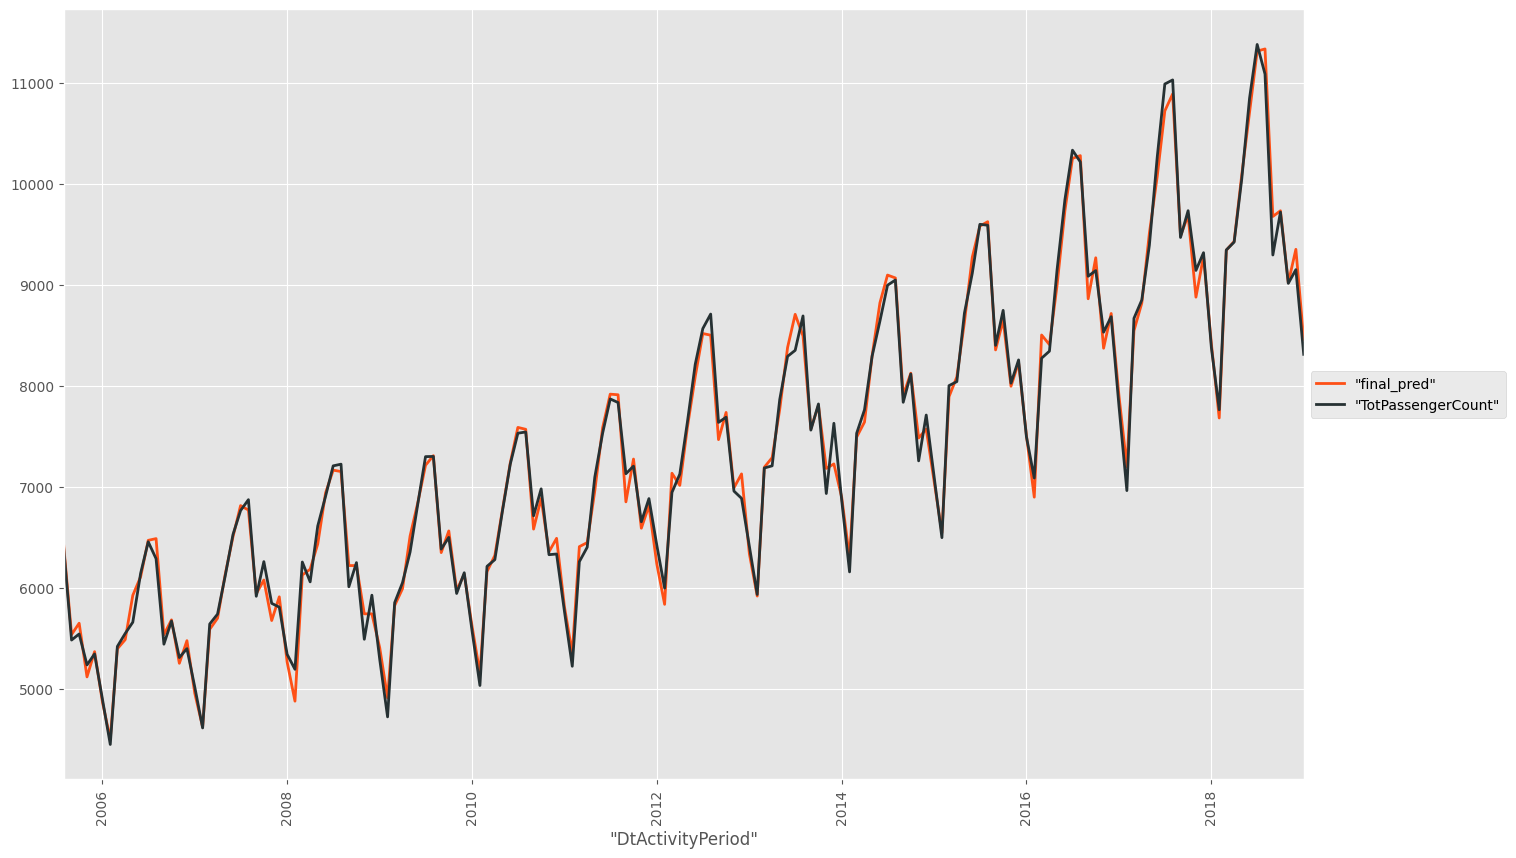

In [146]:
fig, ax = plt.subplots(figsize=(20, 10))
decomposition.plot(ts = "DtActivityPeriod",
                     columns=["final_pred", "TotPassengerCount"],
                     ax=ax)

## Model Selection

There are tools to help to choose the best model for the given task in terms of performance and fitting the data.

### AutoML
VerticaPy provides [`AutoML`](https://www.vertica.com/python/documentation_last/delphi/automl/) a powerful tool to have reasonable idea which model has more probability to be the good choice for your task.


<div class="alert alert-block alert-info">
    <b>Important:</b> <b>AutoML</b> conduct basic data preparation on the variables as encoding and it choose the type of machine learning suitable for the case, In addition it perform search grid on the hyper-parameters of the model to the choose the best combination</div>
    
Let's try this tool on titanic dataset.

Starting AutoML



  0%|          | 0/2 [00:00<?, ?it/s]


Testing Model - LogisticRegression



  0%|          | 0/4 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.9913930042297819; Train_score: 0.9948044220285215; Time: 12.660582065582275;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.5; Train_score: 0.5; Time: 0.5540156364440918;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.9919008608914481; Train_score: 0.9925254472212641; Time: 10.440986633300781;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'enet', 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 0.5; Train_score: 0.5; Time: 0.5111304918924967;
Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 0.9919008608914481; Train_score: 0.9925254472212641; Time: 10.44098663

  0%|          | 0/3 [00:00<?, ?it/s]

Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.983015327946242; Train_score: 0.9827642814529622; Time: 0.3913021882375081;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.9780138221905706; Train_score: 0.9806891958581222; Time: 0.4921535650889079;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.9701021841333879; Train_score: 0.9751854322373466; Time: 0.3311614990234375;
Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 0.01, 'nbtype': 'auto'}; Test_score: 0.983015327946242; Train_score: 0.9827642814529622; Time: 0.3913021882375081;
Final Model

LogisticRegression; Best_Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Best_Test_score: 0.9919008608914481; Train_score: 0.9925254472212641; Time: 10.440986633300781;


Starting Stepwise


  0%|          | 0/16 [00:00<?, ?it/s]

[Model 0] aic: -4757.4306248569255; Variables: ['"age"', '"boat_8"', '"boat_5"', '"boat_3"', '"boat_14"', '"boat_10"', '"boat_C"', '"boat_4"', '"boat_15"', '"boat_13"', '"fare"', '"pclass"', '"boat_Others"', '"sex_male"', '"sex_female"', '"boat_NULL"']
[Model 1] aic: -4758.794692714417; (-) Variable: "age"
[Model 2] aic: -4760.930190828803; (-) Variable: "boat_8"
[Model 3] aic: -4762.283341702114; (-) Variable: "boat_5"
[Model 4] aic: -4764.118918304077; (-) Variable: "boat_3"
[Model 5] aic: -4765.80453613352; (-) Variable: "boat_14"
[Model 6] aic: -4766.307399945768; (-) Variable: "boat_10"
[Model 7] aic: -4767.084826453643; (-) Variable: "boat_C"
[Model 8] aic: -4769.13338694494; (-) Variable: "boat_4"
[Model 9] aic: -4767.916545392255; (-) Variable: "boat_13"
[Model 10] aic: -4767.537280344475; (-) Variable: "boat_Others"
[Model 11] aic: -4767.081112559485; (-) Variable: "sex_male"
Selected Model

[Model 11] aic: -4767.081112559485; Variables: ['"boat_15"', '"fare"', '"pclass"', '"s

model_type                                parameters   \\
1    LogisticRegression  {'solver': 'bfgs', 'penalty': 'l2', '...   \\
2    LogisticRegression  {'solver': 'bfgs', 'penalty': 'none',...   \\
3            NaiveBayes         {'alpha': 0.01, 'nbtype': 'auto'}   \\
4            NaiveBayes          {'alpha': 1.0, 'nbtype': 'auto'}   \\
5            NaiveBayes         {'alpha': 10.0, 'nbtype': 'auto'}   \\
6    LogisticRegression  {'solver': 'cgd', 'penalty': 'l1', 'm...   \\
7    LogisticRegression  {'solver': 'cgd', 'penalty': 'enet', ...   \\
              avg_score       avg_train_score              avg_time   \\
1    0.9919008608914481    0.9925254472212641    10.440986633300781   \\
2    0.9913930042297819    0.9948044220285215    12.660582065582275   \\
3     0.983015327946242    0.9827642814529622    0.3913021882375081   \\
4    0.9780138221905706    0.9806891958581222    0.4921535650889079   \\
5    0.9701021841333879    0.9751854322373466    0.3311614990234375   \\
6                   0.5                   0.5    0.5540156364440918   \\
7                   0.5                   0.5    0.5111304918924967   \\
                score_std          score_train_std                               model_class  
1    0.006273345171315679    0.0026410913086460735  <class 'verticapy.learn.linear_model....  
2    0.005740930105713312    0.0023530935629737454  <class 'verticapy.learn.linear_model....  
3    0.010139814570510263    0.0023431051931992386  <class 'verticapy.learn.naive_bayes.N...  
4    0.005092279718019784    0.0029141136555851863  <class 'verticapy.learn.naive_bayes.N...  
5     0.01122052204105313     0.004108179892985616  <class 'verticapy.learn.naive_bayes.N...  
6                     0.0                      0.0  <class 'verticapy.learn.linear_model....  
7                     0.0                      0.0  <class 'verticapy.learn.linear_model....  
Rows: 1-7 | Columns: 8
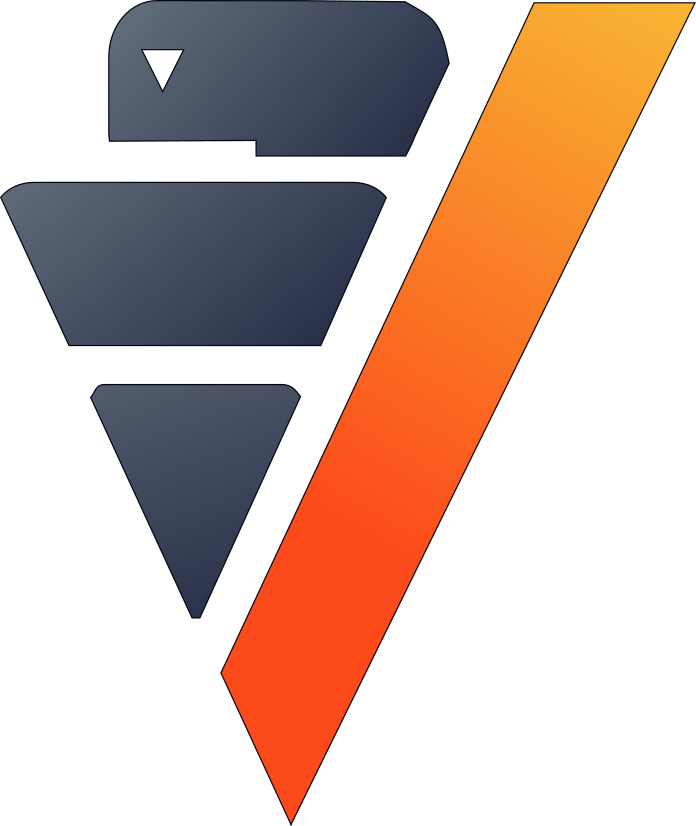

In [77]:
from verticapy.learn.delphi import AutoML

model = AutoML("titanic_autoML", metric='auc')
model.drop()
model.fit("public.titanic",
          X=["boat", "age", "fare", "pclass", "sex"],
          y="survived")

<AxesSubplot:xlabel='n_features', ylabel='aic'>

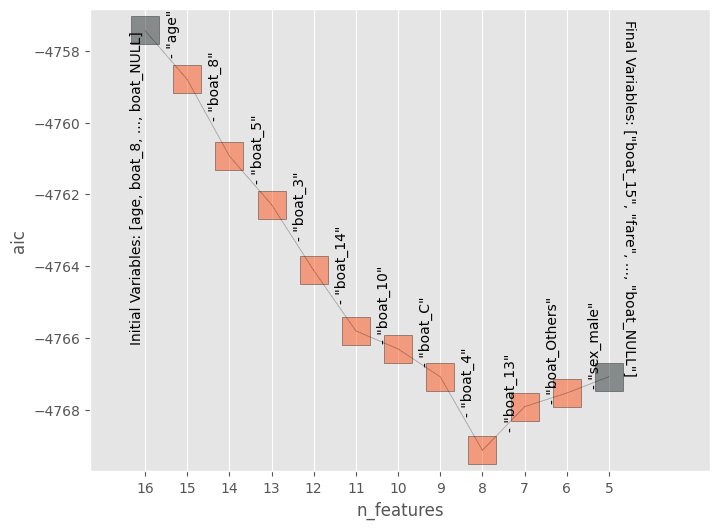

In [78]:
model.plot("stepwise")

<AxesSubplot:xlabel='time', ylabel='score'>

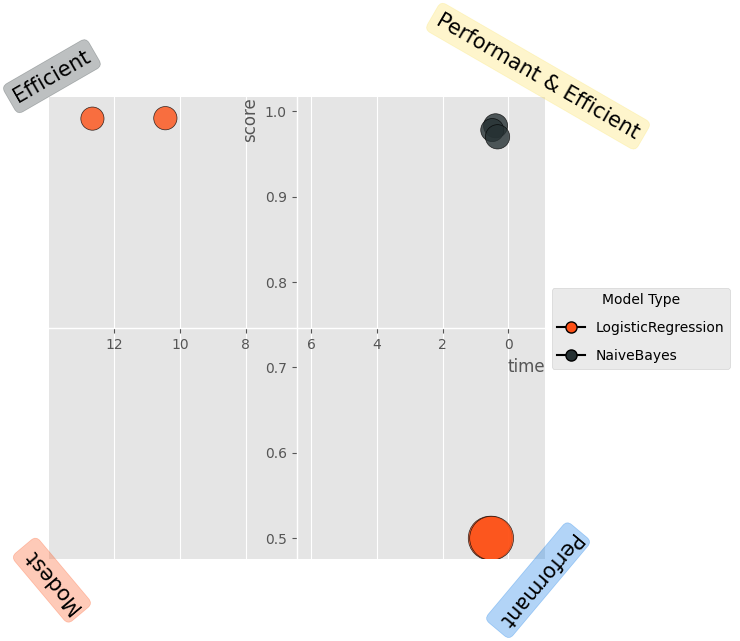

In [79]:
model.plot()

### Grid Search

In [80]:
from verticapy.learn.model_selection import grid_search_cv


grid_res = grid_search_cv(lr_model,
               {"tol": [1e-2, 1e-4, 1e-6],
                "max_iter": [3, 10, 100],
                "solver": ["Newton", "BFGS"]},
               input_relation=churn,
               X=churn.get_columns(exclude_columns=["churn"]),
               y='churn',
               cv=3,
               metric="auc",
               print_info=True)

  0%|          | 0/18 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'Newton'}; Test_score: 0.8475081250485724; Train_score: 0.8458136673046361; Time: 0.7182140350341797;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'BFGS'}; Test_score: 0.6484660542073454; Train_score: 0.6532725888124313; Time: 1.4732066790262859;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'Newton'}; Test_score: 0.839593364941814; Train_score: 0.8513869556515163; Time: 0.709943691889445;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'BFGS'}; Test_score: 0.717912719733597; Train_score: 0.7268188457745552; Time: 3.024981419245402;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'Newton'}; Test_score: 0.8396253902990768; Train_score: 0.8504918347944155; Time: 0.7562465667724609;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'BFGS'}; Test_score: 0.6

parameters             avg_score   \\
1   {'solver': 'Newton', 'penalty': 'l2',...    0.8510286482035103   \\
2   {'solver': 'Newton', 'penalty': 'l2',...    0.8495898409854823   \\
3   {'solver': 'BFGS', 'penalty': 'l2', '...    0.8495734081378377   \\
4   {'solver': 'Newton', 'penalty': 'l2',...    0.8475081250485724   \\
5   {'solver': 'BFGS', 'penalty': 'l2', '...    0.8446582219735935   \\
6   {'solver': 'Newton', 'penalty': 'l2',...     0.843221730136972   \\
7   {'solver': 'Newton', 'penalty': 'l2',...    0.8424288621145402   \\
8   {'solver': 'Newton', 'penalty': 'l2',...    0.8415653547539932   \\
9   {'solver': 'Newton', 'penalty': 'l2',...    0.8397543724899246   \\
10  {'solver': 'Newton', 'penalty': 'l2',...    0.8396253902990768   \\
11  {'solver': 'Newton', 'penalty': 'l2',...     0.839593364941814   \\
12  {'solver': 'BFGS', 'penalty': 'l2', '...    0.7484296943027664   \\
13  {'solver': 'BFGS', 'penalty': 'l2', '...    0.7429738778625753   \\
14  {'solver': 'BFGS', 'penalty': 'l2', '...     0.717912719733597   \\
15  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6511983766378903   \\
16  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6495642685987718   \\
17  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6484660542073454   \\
18  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6461820088770308   \\
         avg_train_score              avg_time                score_std   \\
1     0.8450345418276622    0.8708925247192383      0.00538991117699691   \\
2      0.845629610988776    0.8327041467030843    0.0025988010382775287   \\
3     0.8464180848700913    13.685909032821655     0.009416101912111625   \\
4     0.8458136673046361    0.7182140350341797      0.00479690182709165   \\
5       0.84846346239523    15.264184554417929     0.005215559824226995   \\
6     0.8480211689033779    0.6923501491546631     0.011715092040366897   \\
7     0.8494173590763363    0.8894836902618408     0.003560049674763616   \\
8     0.8488916195895984    0.6888782183329264     0.002384979136254478   \\
9     0.8512246113104085    0.8391661643981934     0.007621358211126925   \\
10    0.8504918347944155    0.7562465667724609     0.005408230071318383   \\
11    0.8513869556515163     0.709943691889445     0.009848430165517834   \\
12    0.7540375815709939     3.531642516454061     0.007644345283868152   \\
13    0.7492863610683134    3.6549531618754068     0.019419695297456616   \\
14    0.7268188457745552     3.024981419245402      0.05061022645321535   \\
15    0.6530614266137713    1.4892808596293132     0.003674193164097064   \\
16    0.6525111176254202    1.5279594262440999    0.0017795445416942993   \\
17    0.6532725888124313    1.4732066790262859     0.006647593563336809   \\
18    0.6512817997900097    1.5154352188110352    0.0029712264466495893   \\
            score_train_std  
1      0.002504307344248916  
2      0.001414332200940868  
3       0.00510245679282917  
4     0.0025006488991928455  
5      0.002732092780002368  
6      0.005414073452527682  
7     0.0017399211270011736  
8      0.001004077014212198  
9      0.003252463007108608  
10    0.0030302233140415795  
11    0.0050478072055084346  
12     0.010774334605253297  
13     0.007392943635269399  
14      0.04702026274225433  
15     0.003952557784489745  
16     0.003248415381352485  
17     0.005586446841362744  
18     0.004013021573848783  
Rows: 1-18 | Columns: 6
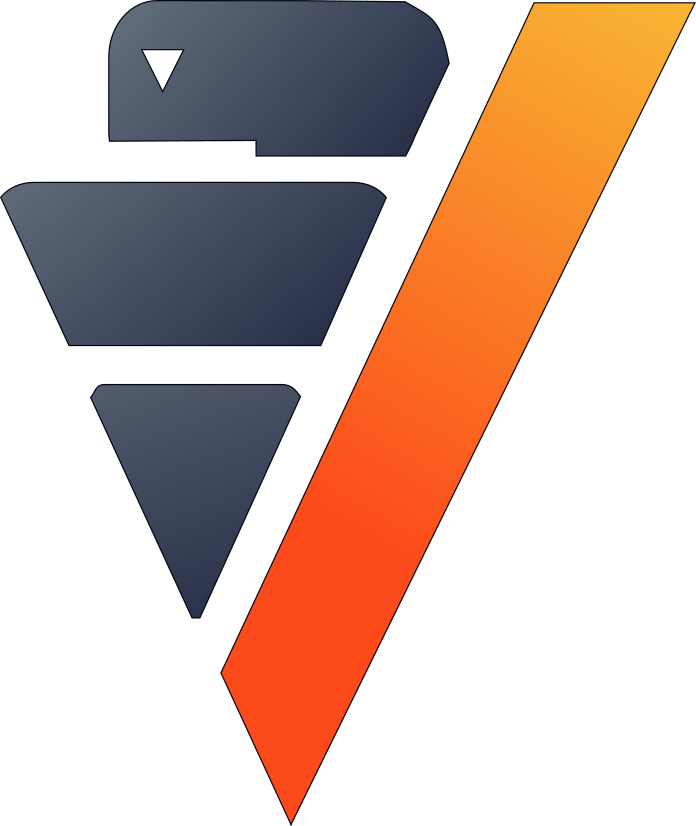

In [81]:
grid_res

In [82]:
best_param = grid_res.values['parameters'][0]
best_param

{'solver': 'Newton', 'penalty': 'l2', 'max_iter': 100, 'C': 1, 'tol': 1e-06}

### Cross-Validation

Let's try [`cross_validate`](https://www.vertica.com/python/documentation_last/learn/cross_validate/index.php). 

More techniques for model selection are provided [here](https://www.vertica.com/python/documentation_last/learn/model-selection.php).

In [74]:
from verticapy.learn.model_selection import cross_validate
res_test, res_train = cross_validate(
    lr_model,
    input_relation=churn,
    X=churn.get_columns(exclude_columns=["churn"]),
    y='churn',
    cv=3,
    metric="auc",
    training_score=True)

  0%|          | 0/3 [00:00<?, ?it/s]

auc                  time  
1-fold         0.844601122561648    11.046781539916992  
2-fold        0.8520610171028657    10.172389268875122  
3-fold        0.8468476511158759    11.476728439331055  
avg           0.8478365969267966    10.898633082707724  
std         0.003827011497791162    0.6646699496190065  
Rows: 1-5 | Columns: 3
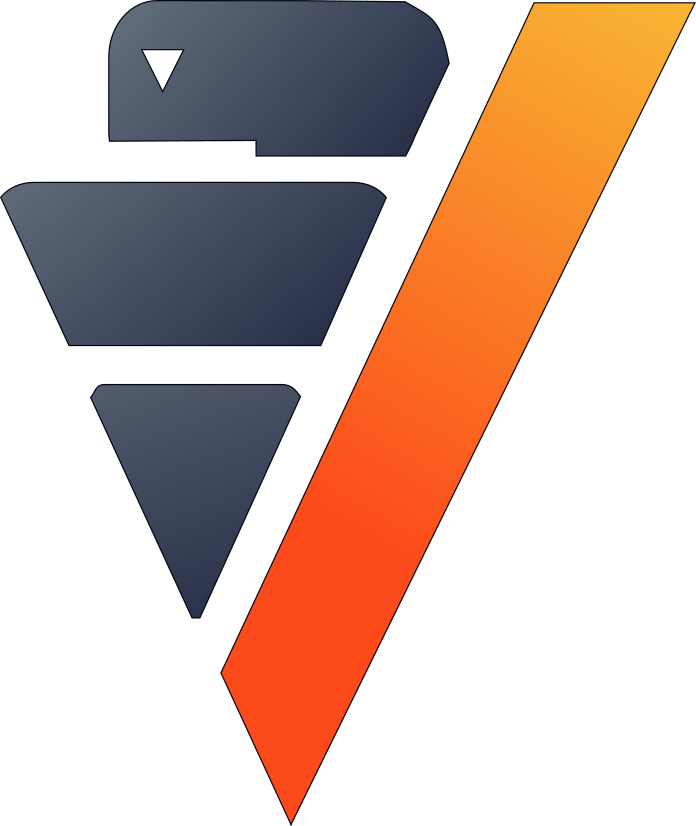

In [75]:
# Training results
res_train

auc                  time  
1-fold         0.8518895850693086    11.046781539916992  
2-fold         0.8387276288033101    10.172389268875122  
3-fold          0.847662996044642    11.476728439331055  
avg            0.8460934033057536    10.898633082707724  
std         0.0067198950297971665    0.6646699496190065  
Rows: 1-5 | Columns: 3
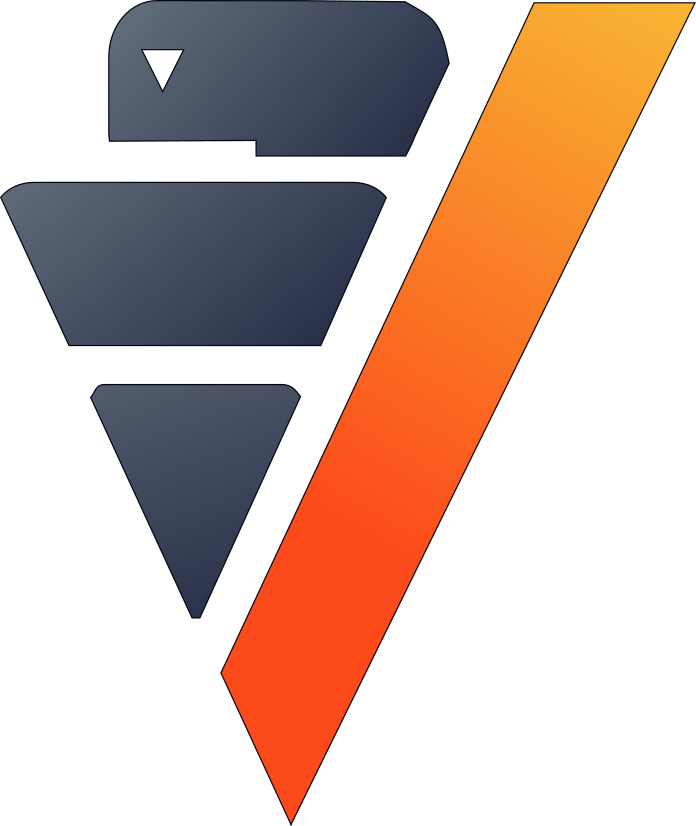

In [76]:
# Test results
res_test